<h3>
<font color=Green>Problem Statement and Business Goal</font>
</h3>

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not. The company wants to know the following things about the prospective properties:

 1)Which variables are significant in predicting the price of a house, and
 
 2)How well those variables describe the price of a house.
 
The company management needs a model to evaluate the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

<h3>
<font color=Green>Modelling Approach</font>
</h3>

1) Importing relevant libraries and loading the data.

2) Data handling: inspection and cleaning.

3) EDA.

4) Model initialization and optimization.

5) Model evaluation and final interpretation.

<h3>
<font color=Green>Import Libraries</font>
</h3>

In [1]:
# importing require libraries libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)

# importing Model Building libraries
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

<h3>
<font color=Green>Data Loading</font>
</h3>

In [2]:
Housing = pd.read_csv("C:/Users/anjand/Desktop/train.csv",index_col=0)

In [3]:
Housing.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                     
1          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
2          Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
3          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
4          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
5          Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                       
1        Norm     1Fam     2Story            7            5       2003   
2        Norm     1Fam     1Story            6            8       1976   
3        Norm     1Fam     2Story            7            5       2001   
4        Norm     1Fam     2Story            7            5       1915   
5        Norm     1Fam     2Story            8            5       2000   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
Id                                                                       
1           2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
2           1976     Gable  CompShg     MetalSd     MetalSd       None   
3           2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4           1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
5           2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

    MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
Id                                                                             
1        196.0        Gd        TA      PConc       Gd       TA           No   
2          0.0        TA        TA     CBlock       Gd       TA           Gd   
3        162.0        Gd        TA      PConc       Gd       TA           Mn   
4          0.0        TA        TA     BrkTil       TA       Gd           No   
5        350.0        Gd        TA      PConc       Gd       TA           Av   

   BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
Id                                                                             
1           GLQ         706          Unf           0        150          856   
2           ALQ         978          Unf           0        284         1262   
3           GLQ         486          Unf           0        434          920   
4           ALQ         216          Unf           0        540          756   
5           GLQ         655          Unf           0        490         1145   

   Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
Id                                                                             
1     GasA        Ex          Y      SBrkr       856       854             0   
2     GasA        Ex          Y      SBrkr      1262         0             0   
3     GasA        Ex          Y      SBrkr       920       866             0   
4     GasA        Gd          Y      SBrkr       961       756             0   
5     GasA        Ex          Y      SBrkr      1145      1053             0   

    GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
Id                                                                            
1        1710             1             0         2         1             3   
2        1262             0             1  

<h3>
<font color=Green>Data Inspection</font>
</h3>

In [4]:
Housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [5]:
Housing.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315   
std      30.202904     20.645407   181.066207   456.098091   161.319273   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean    567.240411  1057.429452  1162.626712   346.992466      5.844521   
std     441.866955   438.705324   386.587738   436.528436     48.623081   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     223.000000   795.750000   882.000000     0.000000      0.000000   
50%     477.500000   991.500000  1087.000000     0.000000      0.000000   
75%     808.000000  1298.250000  1391.250000   728.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean   1515.463699      0.425342      0.057534     1.565068     0.382877   
std     525.480383      0.518911      0.238753     0.550916     0.502885   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1129.500000      0.000000      0.000000     1.000000     0.000000   
50%    1464.000000      0.000000      0.000000     2.000000     0.000000   
75%    1776.750000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count   1460.000000   1460.000000   1460.000000  1460.000000  1379.000000   
mean       2.866438      1.046575      6.517808     0.613014  1978.506164   
std        0.815778      0.220338      1.625393     0.644666    24.689725   
min        0.000000      0.000000      2.000000     0.000000  1900.000000   
25%        2.000000      1.000000      5.000000     0.000000  1961.000000   
50%        3.000000      1.000000      6.000000     1.000000  1980.000000   
75%        3.000000      1.000000      7.000000     1.000000  2002.000000   
max        8.000000      3.000000     14.000000     3.000000  2010.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean      1.767123   472.980137    94.244521    46.660274      21.954110   
std       0.747315   213.804841   125.338794    66.256028      61.119149   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   334.500000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    25.000000       0.000000   
75%       2.000000   576.000000   168.000000    68.000000   

In [6]:
Housing.shape

(1460, 80)

The data have 1460 rows and 80 columns. That means, there are 1460 id's and 80 attributes to be analyzed for the model. Datatypes are: 34 numerical and 43 categorical attributes.

<h3>
<font color=Green>Data Handling and Preparation</font>
</h3>

In [7]:
## Handling missing data
Missing = ((Housing.isnull().sum()/1460)*100).sort_values(ascending=False)
Missing[Missing > 0]

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageCond       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageYrBlt      5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [8]:
## Dropping the features with greater than 80% null values
Housing.drop(['PoolQC', 'MiscFeature','Alley','Fence'],axis=1,inplace=True)

In [9]:
Missing = ((Housing.isnull().sum()/1460)*100).sort_values(ascending=False)
Missing[Missing > 0]

FireplaceQu     47.260274
LotFrontage     17.739726
GarageCond       5.547945
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrType       0.547945
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64

In [10]:
## Handling null values for other features.
## Lets see which is the most unique expression of the null values.
Housing.FireplaceQu.unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

We can replace the "nan" with "None" to handle this null value better, as we cannot drop them (to avoid information loss)

In [11]:
col = 'FireplaceQu','GarageCond','GarageType','GarageFinish','GarageQual','BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual','MasVnrType','Electrical'

for attribute in col:
    Housing[attribute].replace(np.nan,'None',inplace=True)

In [12]:
## Checking again the null values
Missing = ((Housing.isnull().sum()/1460)*100).sort_values(ascending=False)
Missing[Missing > 0]

LotFrontage    17.739726
GarageYrBlt     5.547945
MasVnrArea      0.547945
dtype: float64

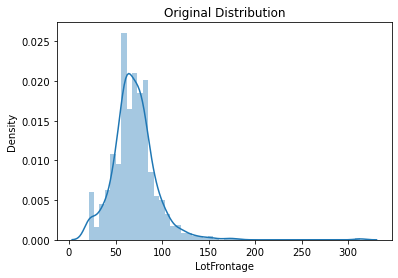

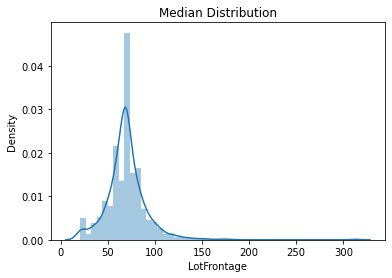

In [13]:
## Checking the distribution of LotFrontage column and replacement with median

sns.distplot(Housing.LotFrontage).set_title("Original Distribution")
plt.show()

med =  Housing.LotFrontage.median()
sns.distplot(Housing.LotFrontage.replace(np.nan,med)).set_title("Median Distribution")
plt.show()

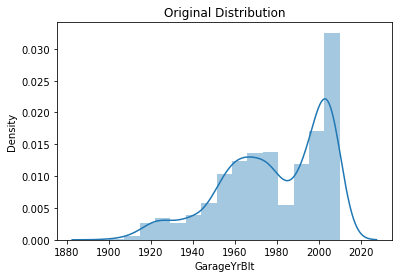

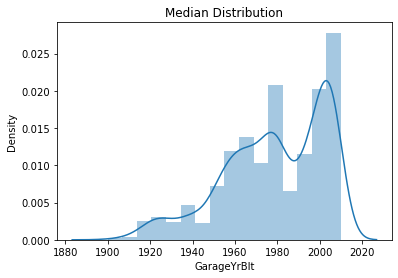

In [14]:
## Checking the distribution of GarageYrBlt column and replacement with median

sns.distplot(Housing.GarageYrBlt).set_title("Original Distribution")
plt.show()

med =  Housing.GarageYrBlt.median()
sns.distplot(Housing.GarageYrBlt.replace(np.nan,med)).set_title("Median Distribution")
plt.show()

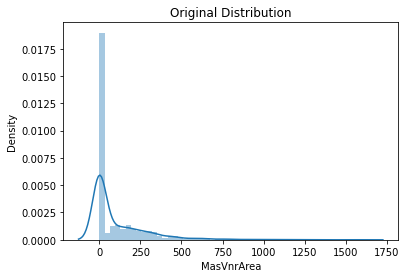

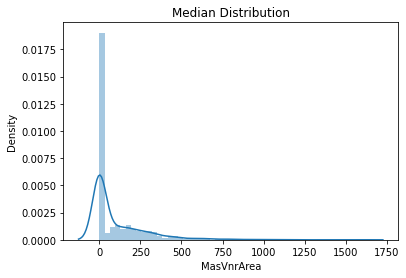

In [15]:
## Checking the distribution of MasVnrArea column and replacement with median

sns.distplot(Housing.MasVnrArea).set_title("Original Distribution")
plt.show()

med =  Housing.MasVnrArea.median()
sns.distplot(Housing.MasVnrArea.replace(np.nan,med)).set_title("Median Distribution")
plt.show()

It has been seen that replacing with median values, the distribution is not impacted severely. Hence imputation with median values can be used to handle the missing values in columns LotFrontage, GarageYrBlt and MasVnrArea.

In [16]:
Median1 =  Housing.LotFrontage.median()
Housing.LotFrontage.replace(np.nan,med,inplace=True)

Median2 =  Housing.GarageYrBlt.median()
Housing.MasVnrArea.replace(np.nan,med,inplace=True)

Median3 =  Housing.MasVnrArea.median()
Housing.GarageYrBlt.replace(np.nan,med,inplace=True)

In [17]:
## Final check with the null values
Missing = ((Housing.isnull().sum()/1460)*100).sort_values(ascending=False)
Missing[Missing > 0]

Series([], dtype: float64)

Missing Data have been handled.

<h4>
<font color=Green>Evaluating the attributes with year </font>
</h4>

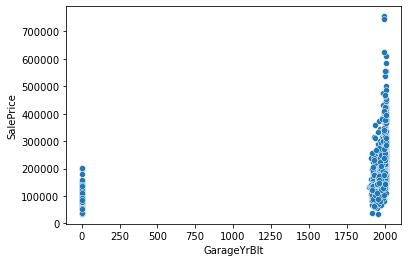

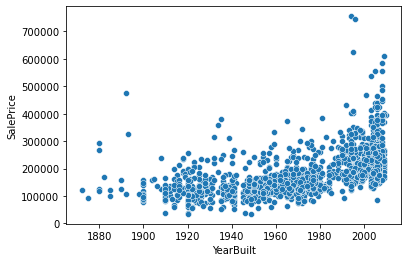

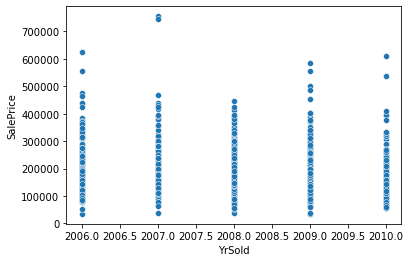

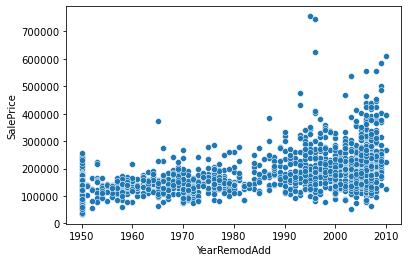

In [18]:
## Inspection of GarageYrBlt column
sns.scatterplot(Housing.GarageYrBlt,Housing.SalePrice)
plt.show()

## Inspection of YrBuilt column
sns.scatterplot(Housing.YearBuilt,Housing.SalePrice)
plt.show()

## Inspection of YrSold column
sns.scatterplot(Housing.YrSold,Housing.SalePrice)
plt.show()

## Inspection of YearRemodAdd column
sns.scatterplot(Housing.YearRemodAdd,Housing.SalePrice)
plt.show()

In [19]:
## Need to place the 0 year values with median values as these are either null/error values
Housing.GarageYrBlt.replace(0,np.median(Housing.GarageYrBlt),inplace=True)

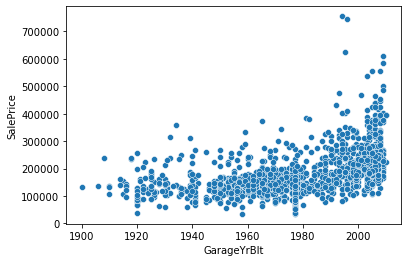

In [20]:
## Rechecking the data distribution of GarageYrBlt
sns.scatterplot(Housing.GarageYrBlt,Housing.SalePrice)
plt.show()

Let us convert the year attributes to age for better interpretation of the salesprice pattern w.r.t. to these attributes. Age calculation will be considered from the current year 2021

In [21]:
Housing['AgeBuilt'] = 2021-Housing['YearBuilt']
Housing['AgeRemodAdd'] = 2021-Housing['YearRemodAdd']
Housing['GarageAgeBlt'] = 2021-Housing['GarageYrBlt']
Housing['AgeSold'] = 2021-Housing['YrSold']

In [22]:
Housing[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','AgeBuilt','AgeRemodAdd',
             'GarageAgeBlt','AgeSold']].head()

YearBuilt  YearRemodAdd  GarageYrBlt  YrSold  AgeBuilt  AgeRemodAdd  \
Id                                                                        
1        2003          2003       2003.0    2008        18           18   
2        1976          1976       1976.0    2007        45           45   
3        2001          2002       2001.0    2008        20           19   
4        1915          1970       1998.0    2006       106           51   
5        2000          2000       2000.0    2008        21           21   

    GarageAgeBlt  AgeSold  
Id                         
1           18.0       13  
2           45.0       14  
3           20.0       13  
4           23.0       15  
5           21.0       13

In [23]:
## Dropping the irrelevant columns (Year attributes and MoSold)
Housing.drop(columns = ['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','MoSold'], axis=1, inplace=True)

In [24]:

Col_Num = (Housing.describe()).columns.to_list()
Col_Cat = (Housing.describe(include='O')).columns.to_list()

print("No of Numerical Columns is {0}".format(len(Col_Num)))
print("No of Categorical Columns is {0}".format(len(Col_Cat)))

No of Numerical Columns is 36
No of Categorical Columns is 39


Hence, the total number of numerical variables and categorical variables available post data handling are 36 and 39 respectively.

<h3>
<font color=Green>EDA (Exploratory Data Analysis)</font>
</h3>

### Univariate Analysis- Numerical Variables

In [25]:
Housing[Col_Num].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   MasVnrArea     1460 non-null   float64
 6   BsmtFinSF1     1460 non-null   int64  
 7   BsmtFinSF2     1460 non-null   int64  
 8   BsmtUnfSF      1460 non-null   int64  
 9   TotalBsmtSF    1460 non-null   int64  
 10  1stFlrSF       1460 non-null   int64  
 11  2ndFlrSF       1460 non-null   int64  
 12  LowQualFinSF   1460 non-null   int64  
 13  GrLivArea      1460 non-null   int64  
 14  BsmtFullBath   1460 non-null   int64  
 15  BsmtHalfBath   1460 non-null   int64  
 16  FullBath       1460 non-null   int64  
 17  HalfBath       1460 non-null   int64  
 18  BedroomA

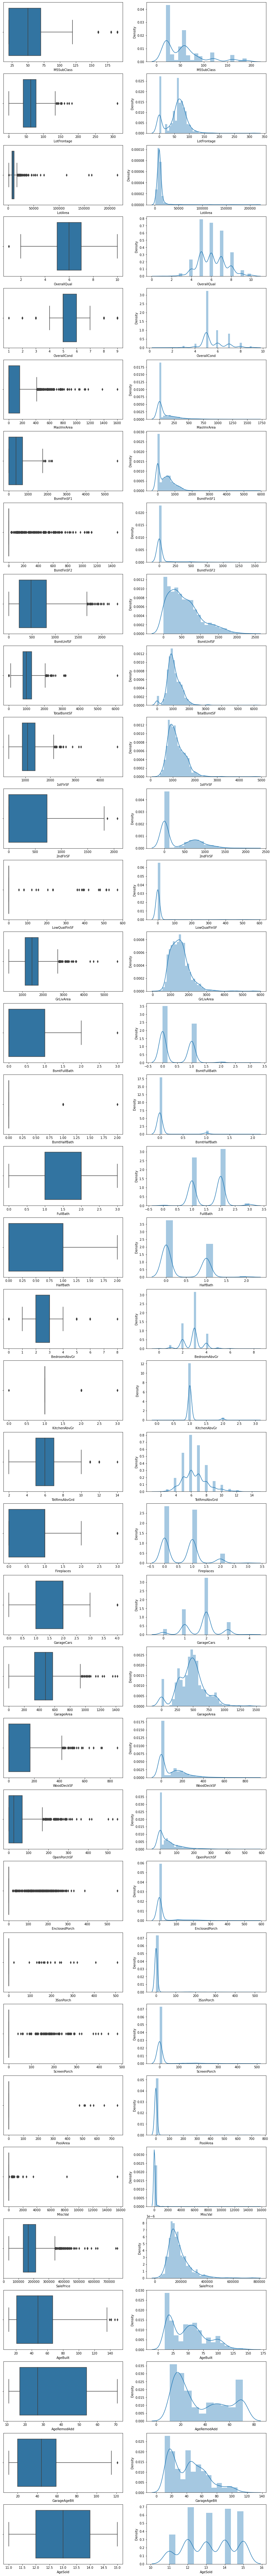

In [26]:
## Boxplots and Dist Plots of numerical variables
plt.figure(figsize=(15, 150))
for col in enumerate(Col_Num):
    plt.subplot(len(Col_Num), 2, 2*col[0]+1)
    sns.boxplot(Housing[col[1]])
    plt.subplot(len(Col_Num), 2, 2*col[0]+2)
    sns.distplot(Housing[col[1]],)
plt.show()

#### Inference
Many of the features appear not to be normally distributed. Features like 'PoolArea' , 'MiscVal' , 'ScreenPorch' , '3SsnPorch' , 'EnclosedPorch' , 'BsmtHalfBath' , 'LowQualFinSF' , 'KitchenAbvGr'and 'BsmtFinSF2'  are skewed and outliers are visible. SalePrice is the target/response variable. Hence, its skewness will not be treated but some sort of data transformation would be required during the modelling stage. But the predictors that are skewed and having outliers will be checked whether they can be dropped or treated. 

In [27]:
## Checking the variance in the numerical features
for features in ['PoolArea' , 'MiscVal' , 'ScreenPorch' , '3SsnPorch' , 'EnclosedPorch' , 'BsmtHalfBath' , 'LowQualFinSF' ,
                 'KitchenAbvGr','BsmtFinSF2']:
    print("Distribution of Data for"+" "+ str(features))
    print(Housing[features].value_counts(normalize=True)*100)
    print('--'*50)

Distribution of Data for PoolArea
0      99.520548
738     0.068493
648     0.068493
576     0.068493
555     0.068493
519     0.068493
512     0.068493
480     0.068493
Name: PoolArea, dtype: float64
----------------------------------------------------------------------------------------------------
Distribution of Data for MiscVal
0        96.438356
400       0.753425
500       0.547945
700       0.342466
450       0.273973
2000      0.273973
600       0.273973
1200      0.136986
480       0.136986
1150      0.068493
800       0.068493
15500     0.068493
620       0.068493
3500      0.068493
560       0.068493
2500      0.068493
1300      0.068493
1400      0.068493
350       0.068493
8300      0.068493
54        0.068493
Name: MiscVal, dtype: float64
----------------------------------------------------------------------------------------------------
Distribution of Data for ScreenPorch
0      92.054795
192     0.410959
224     0.342466
120     0.342466
189     0.273973
180     0.273

Looks like one value in all these numerical features is dominating significantly causing severe skewness and no variance. These features need to be dropped.

In [28]:
Housing.drop(['PoolArea' , 'MiscVal' , 'ScreenPorch' , '3SsnPorch' , 'EnclosedPorch',
              'BsmtHalfBath' ,'LowQualFinSF' , 'KitchenAbvGr','BsmtFinSF2'],axis=1,inplace=True)

In [29]:
Col_Num = (Housing.describe()).columns.to_list()
print("No of Numerical Columns is {0}".format(len(Col_Num)))

No of Numerical Columns is 27


27 numerical columns are left now, for which outlier treatment needs to be done.

### Univariate Analysis- Categorical Variables

<Figure size 1296x2160 with 0 Axes>

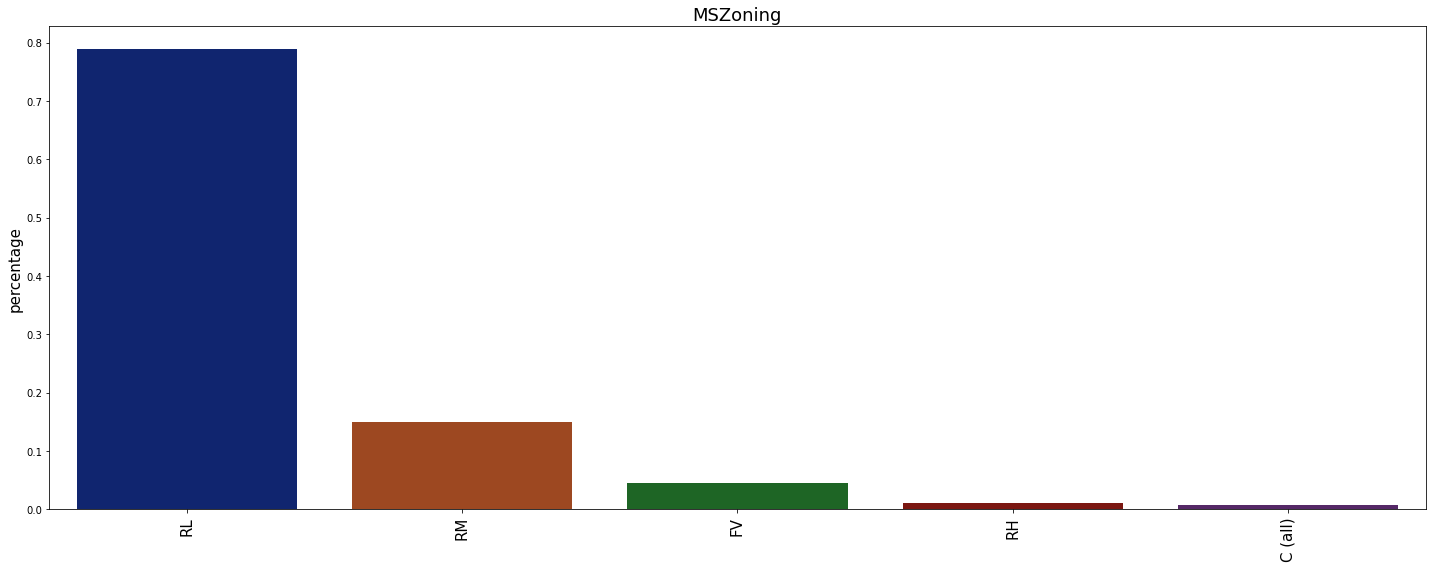

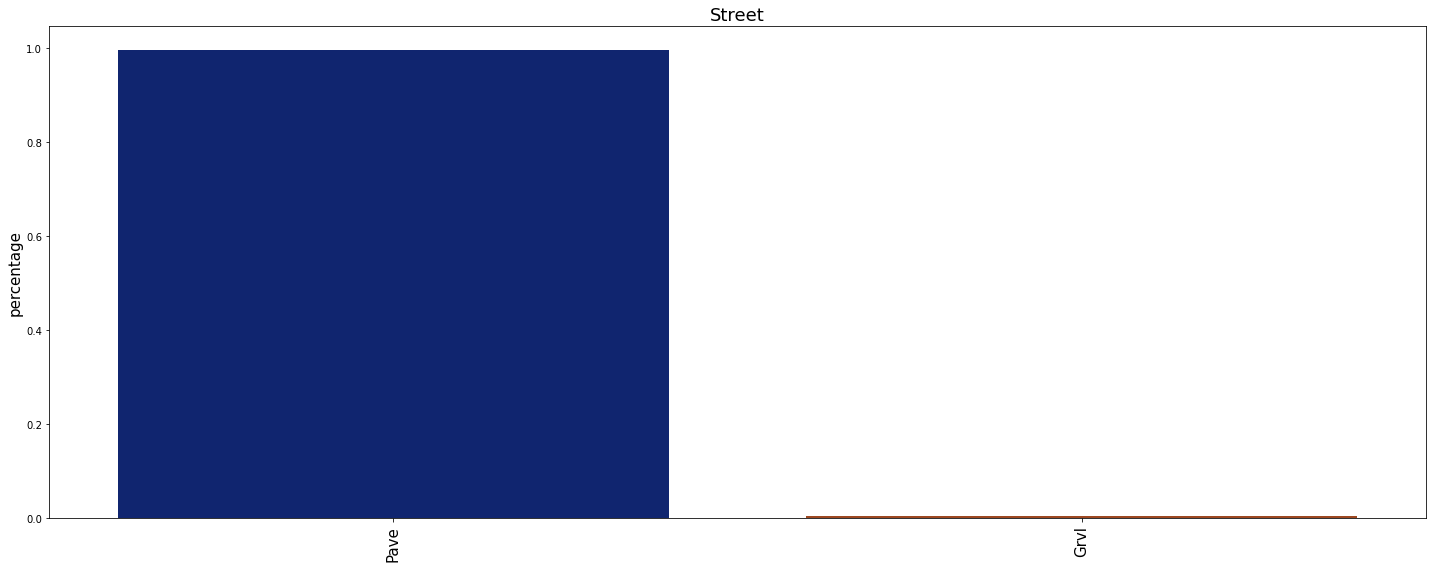

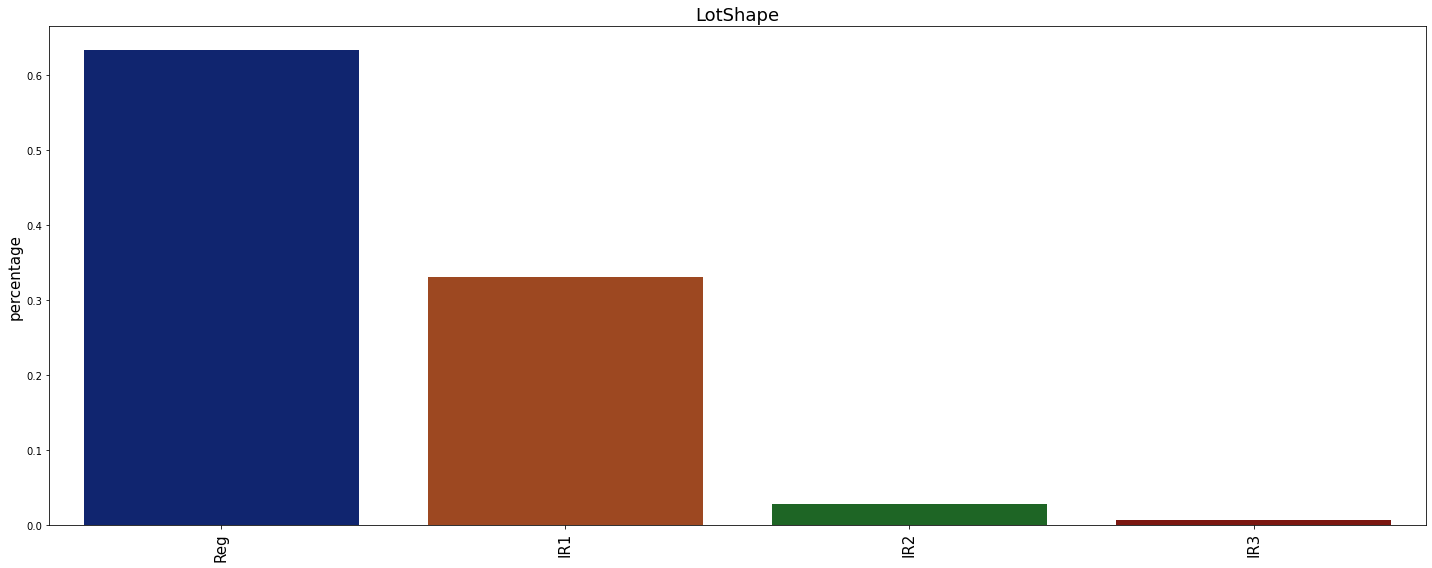

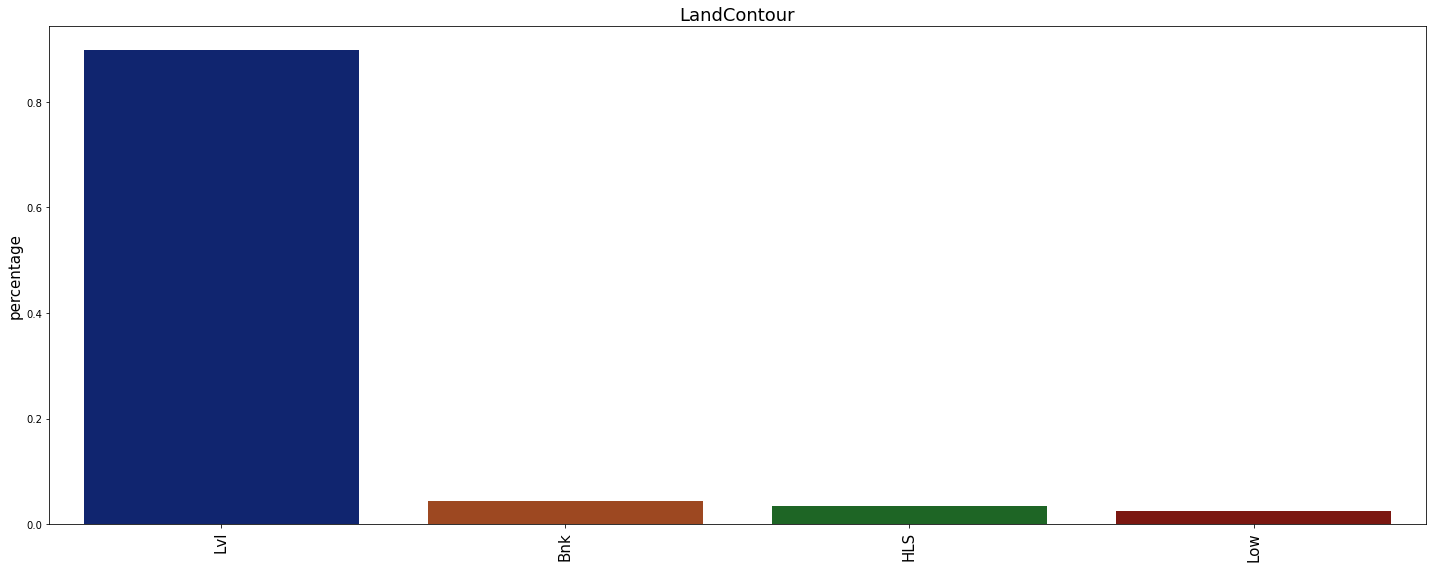

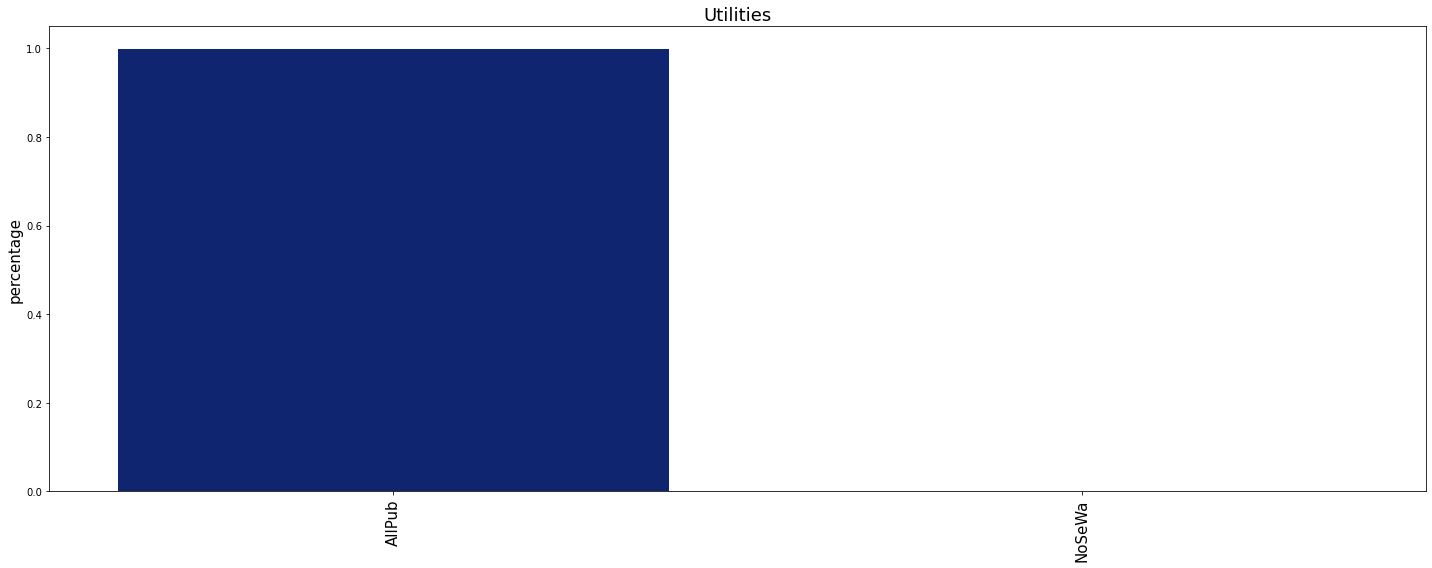

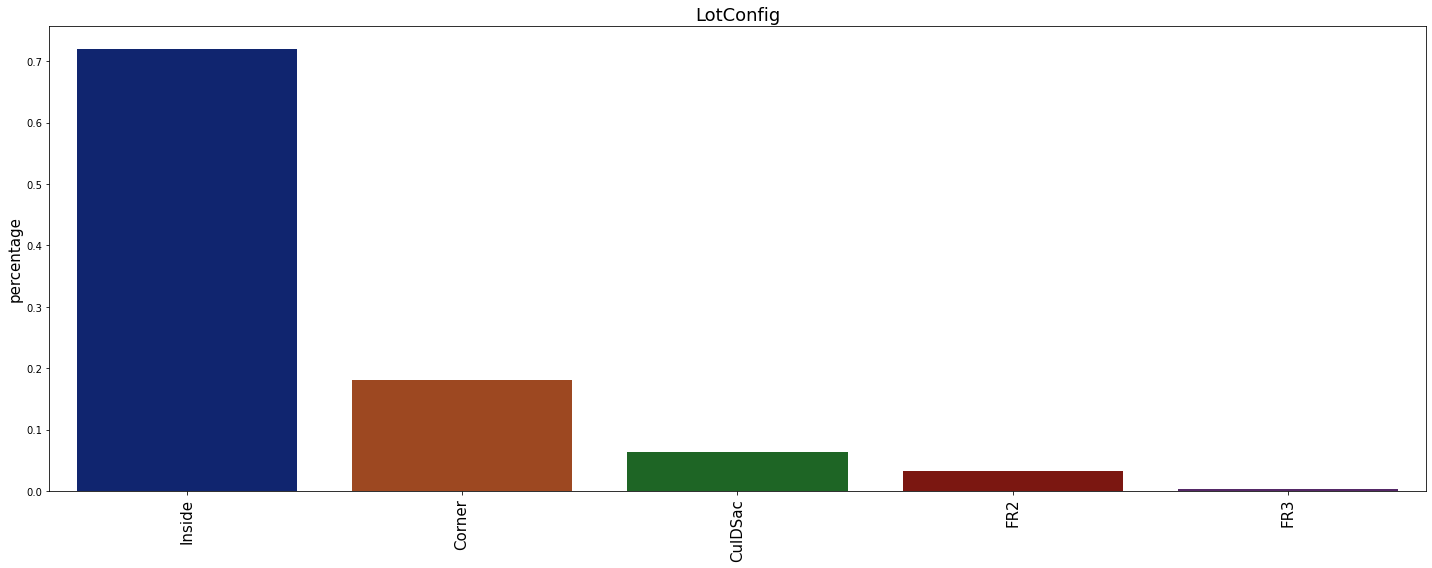

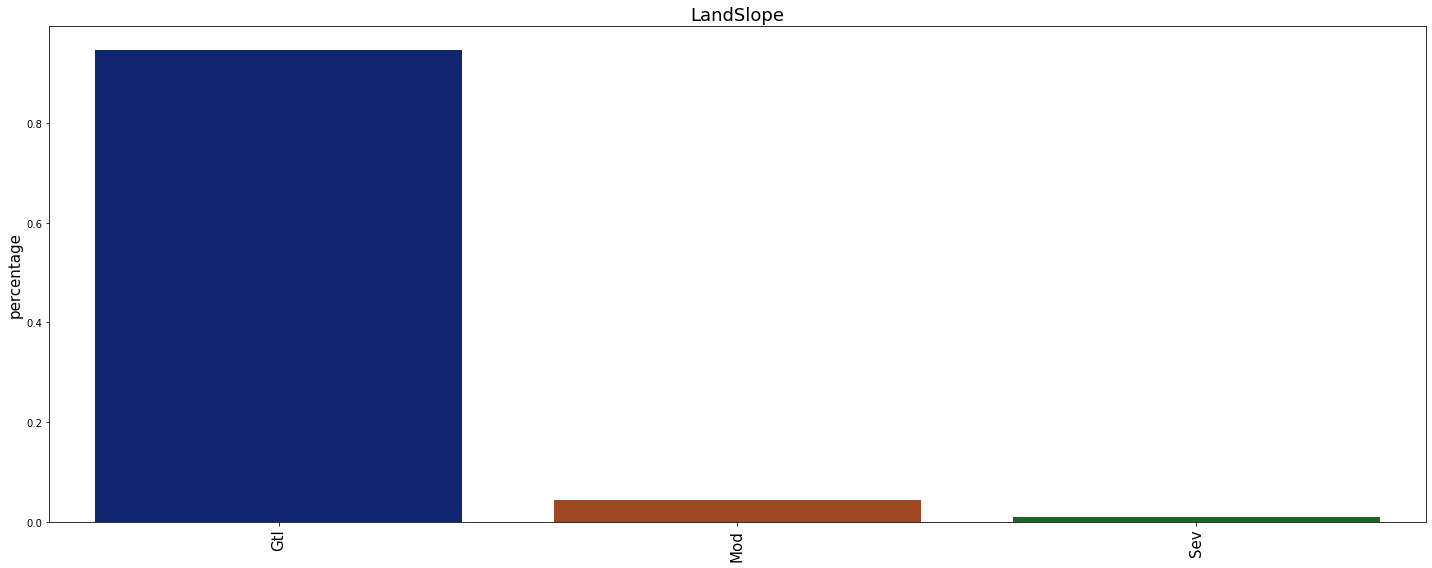

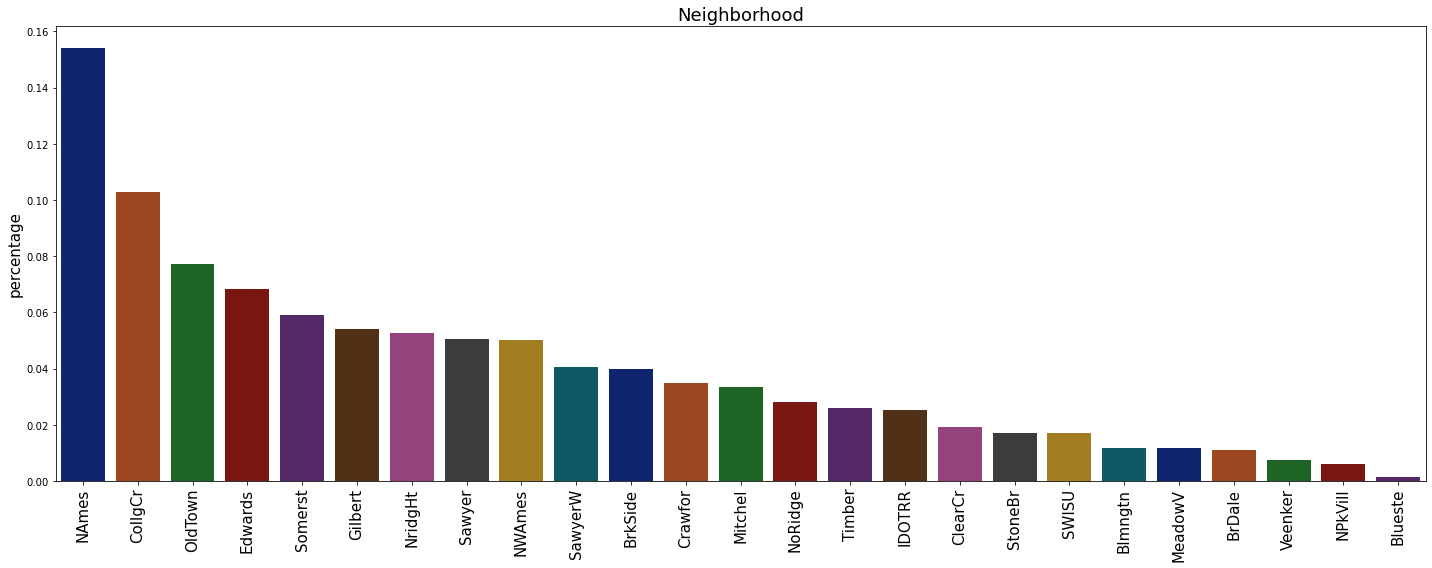

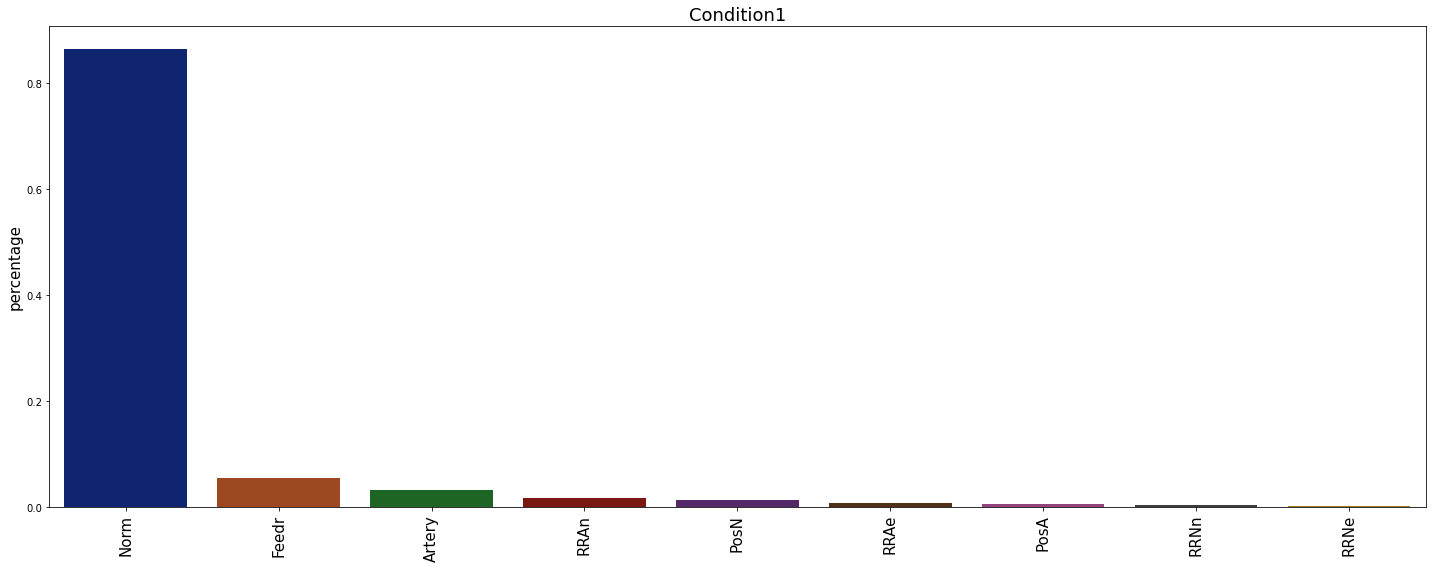

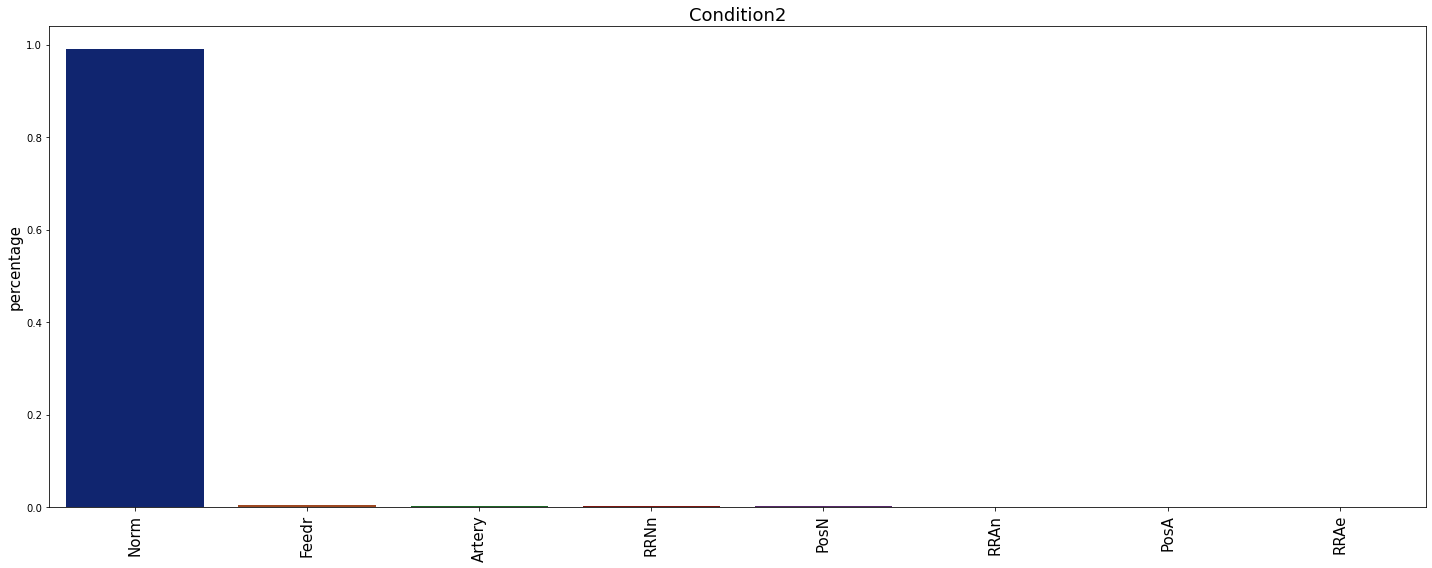

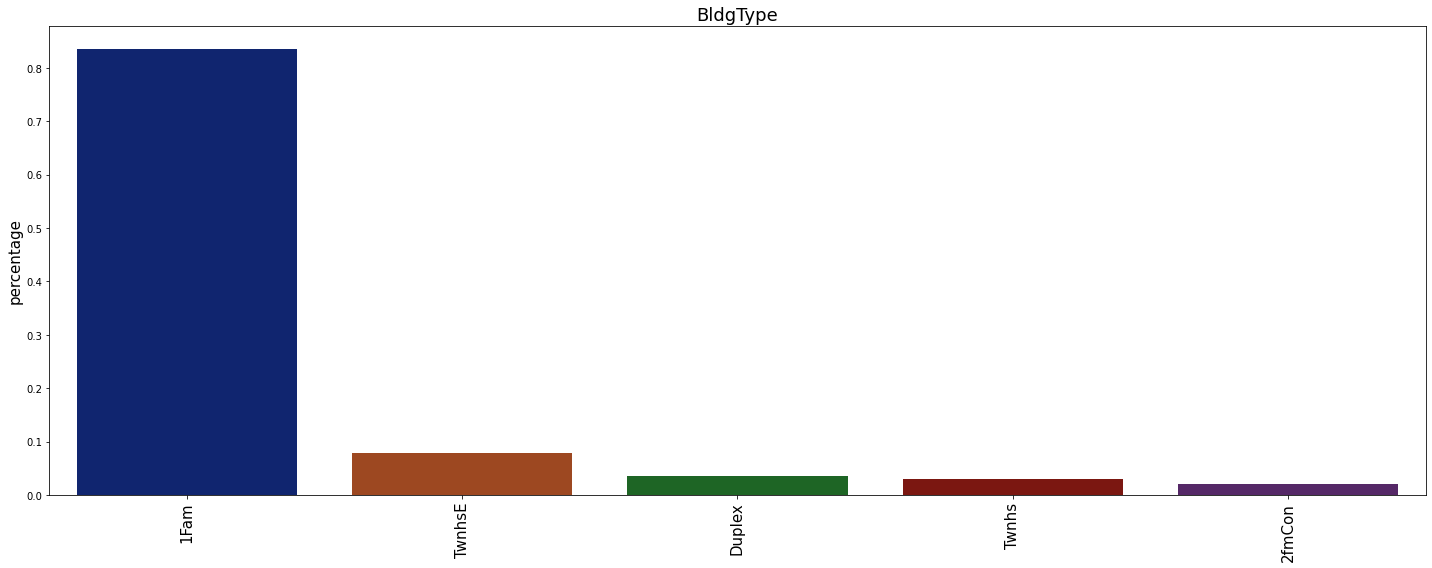

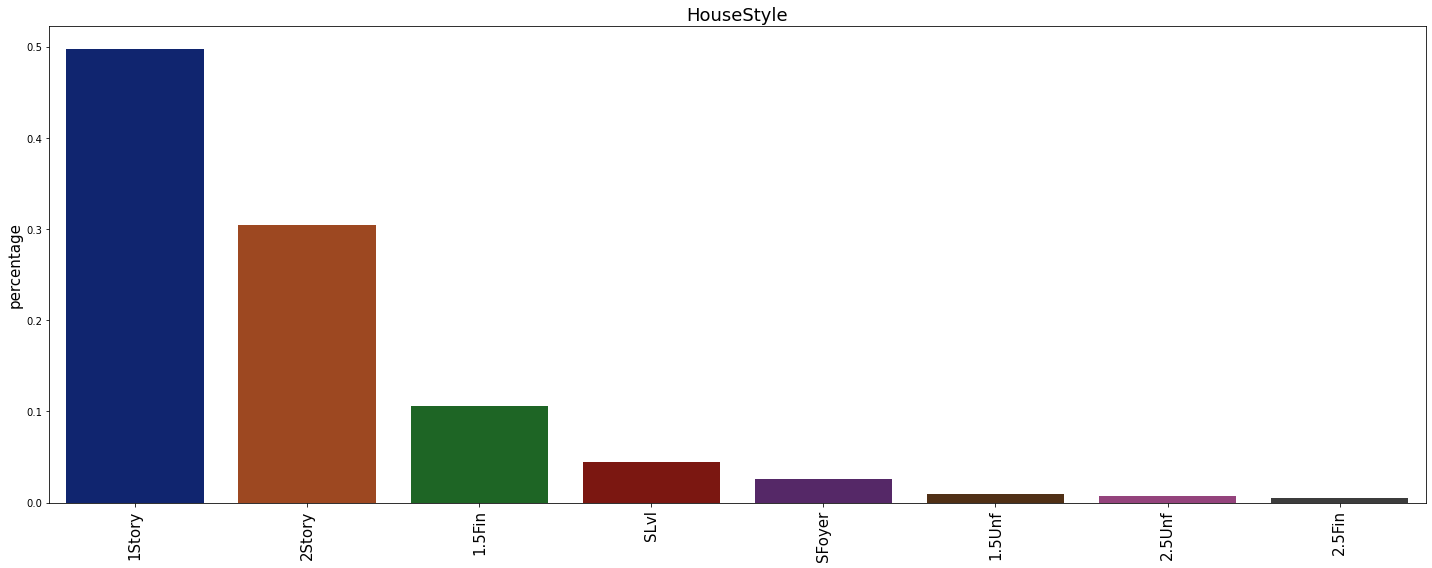

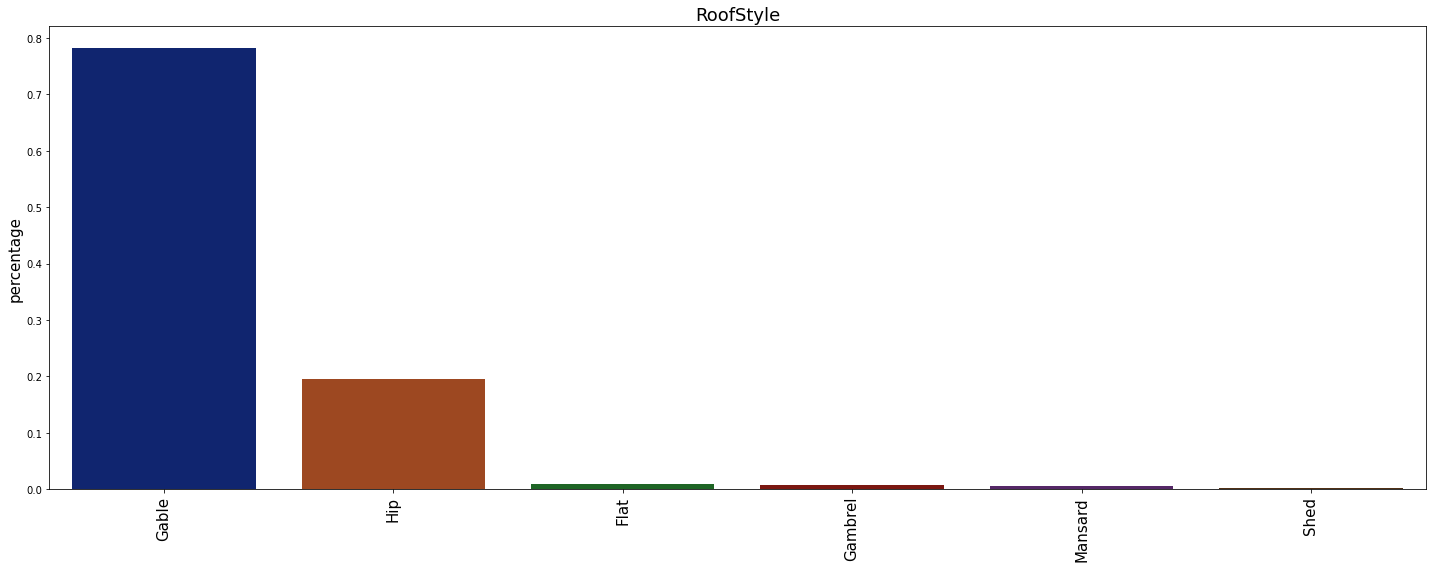

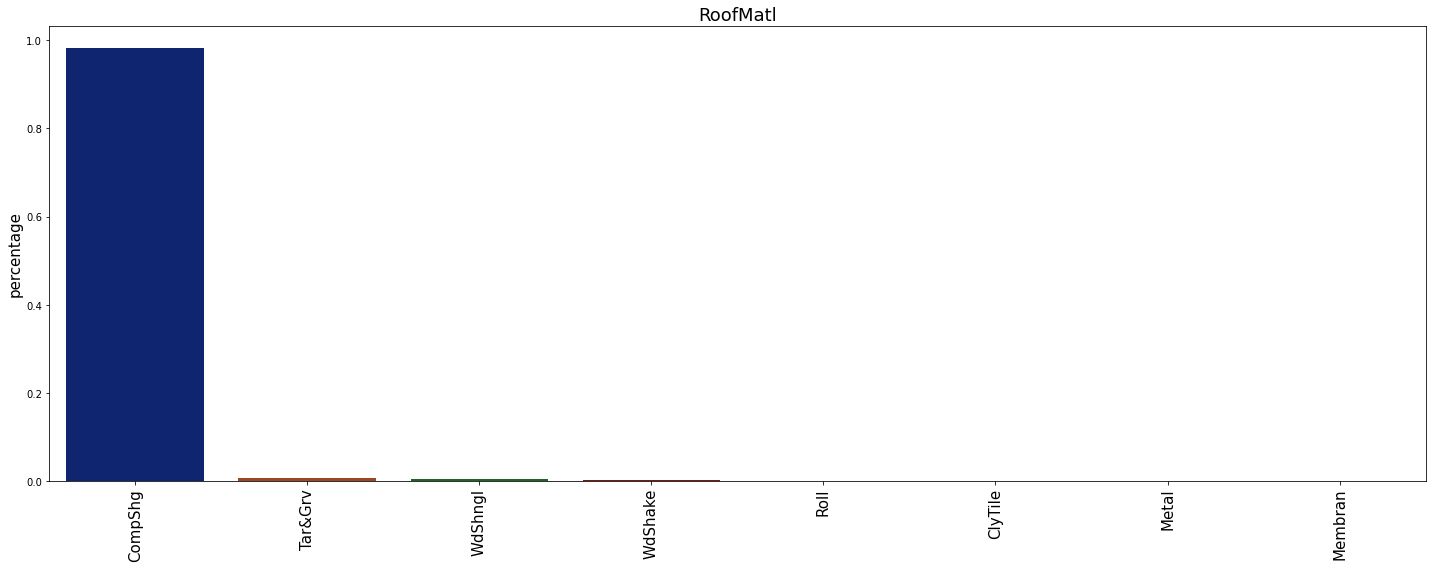

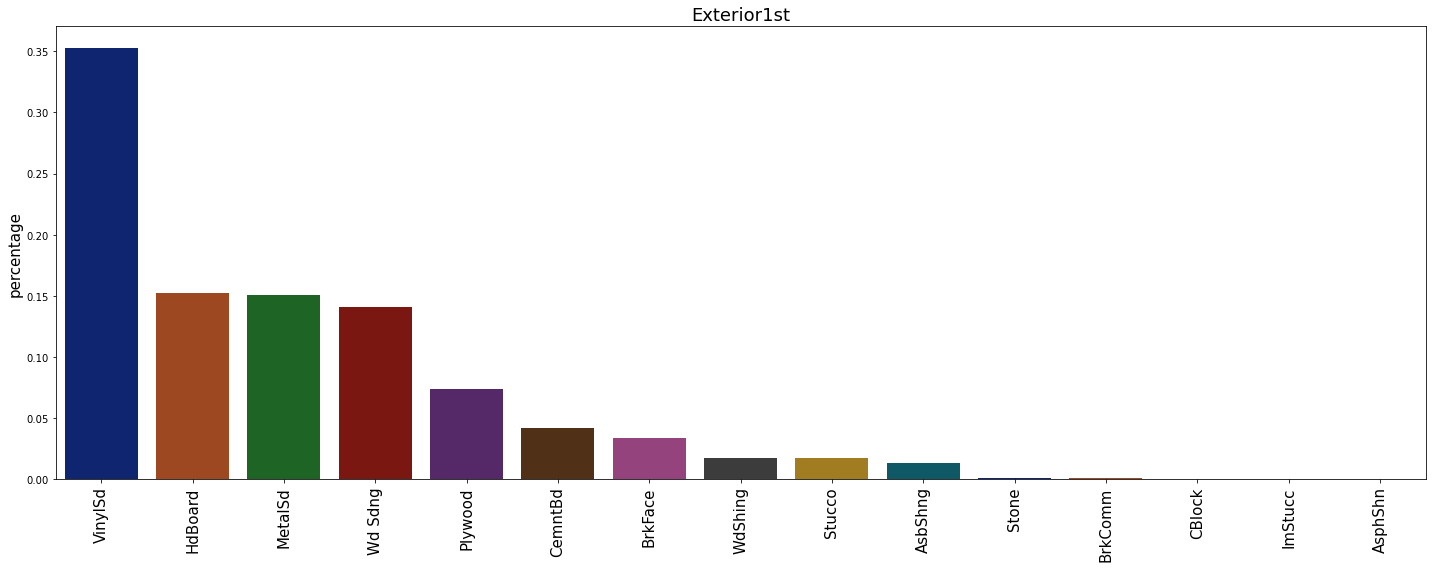

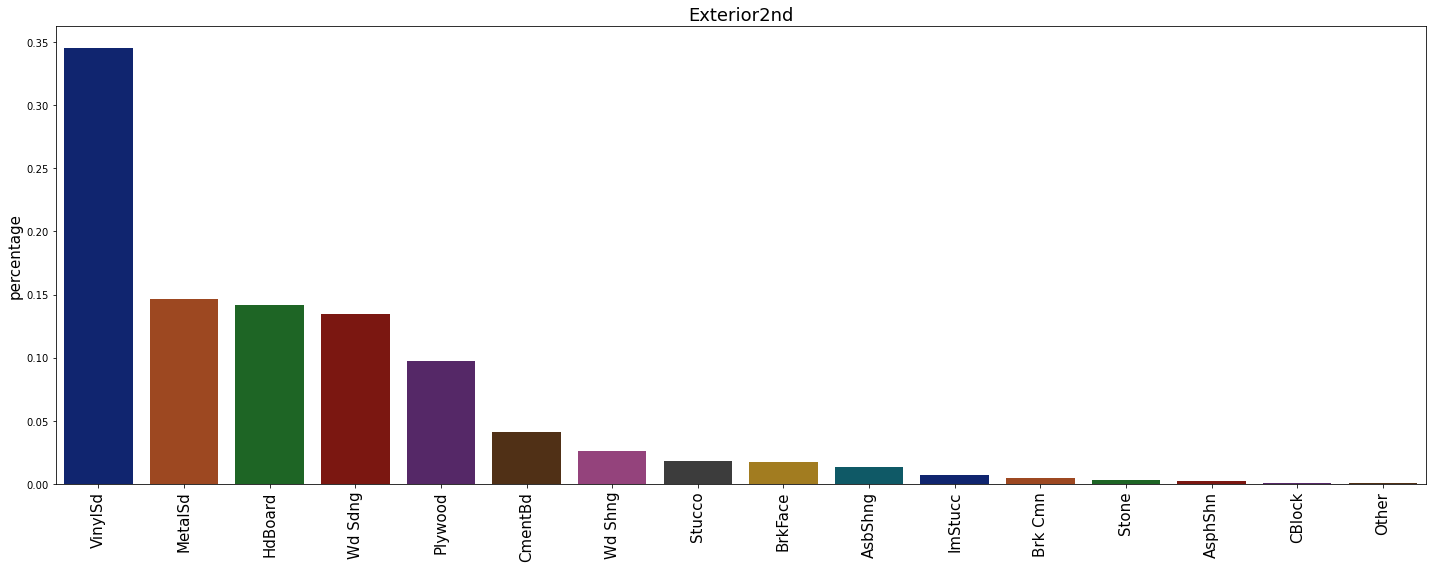

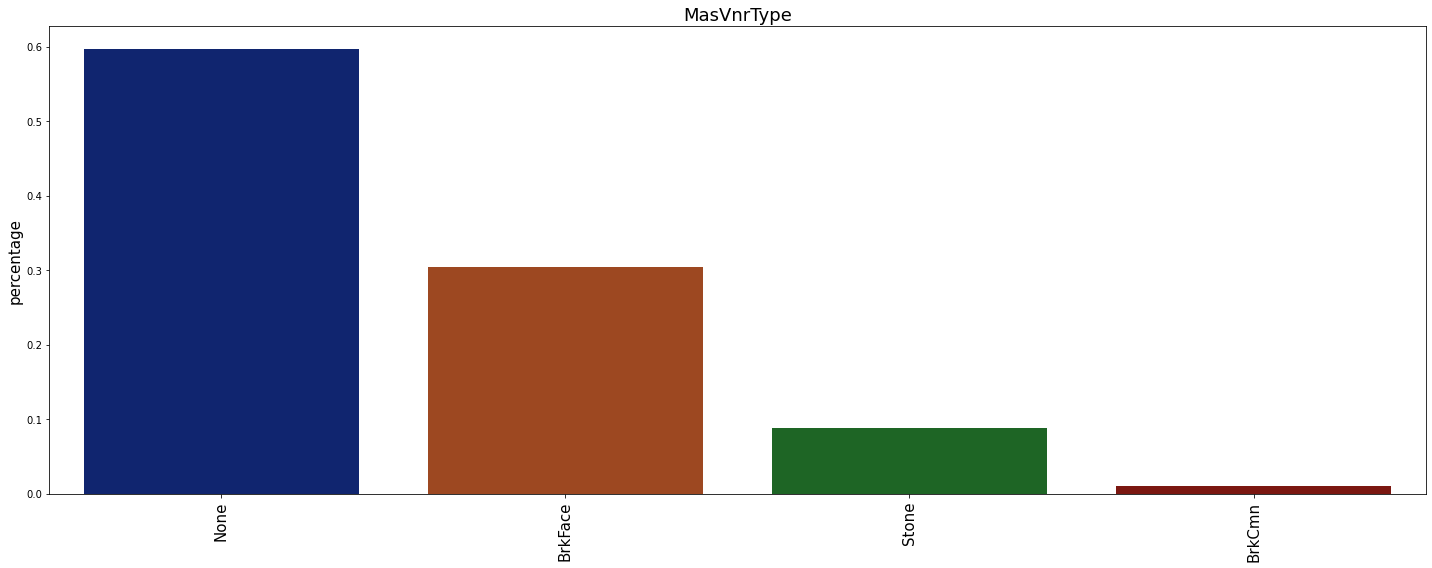

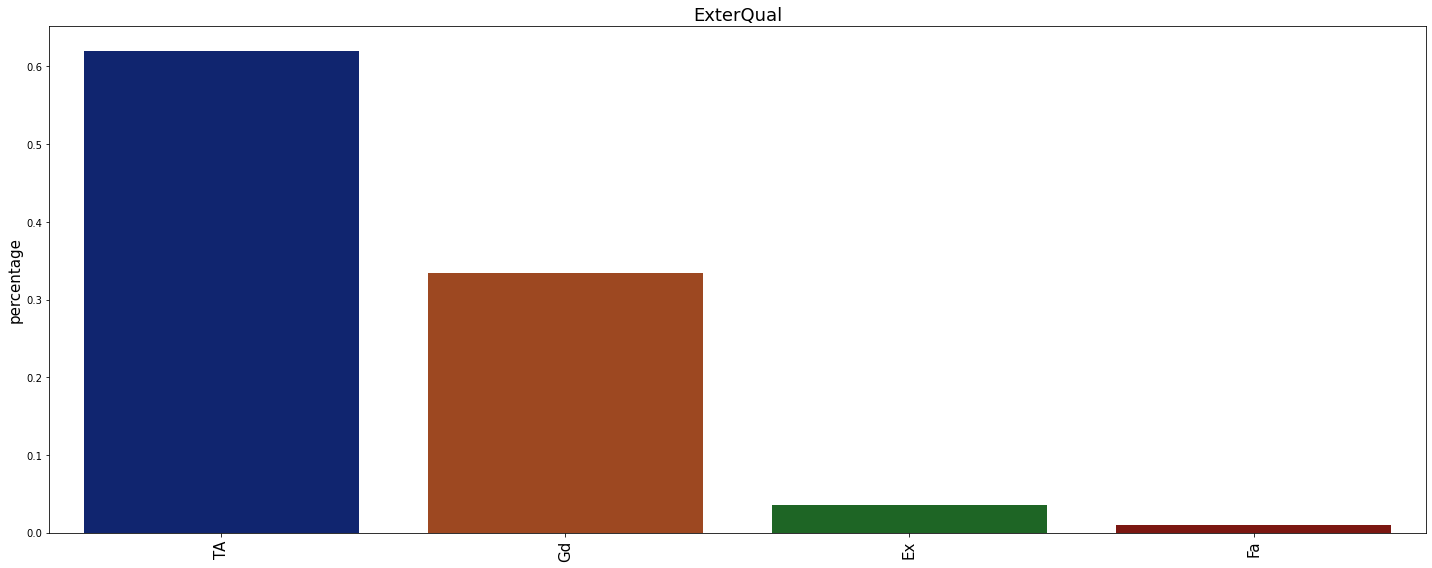

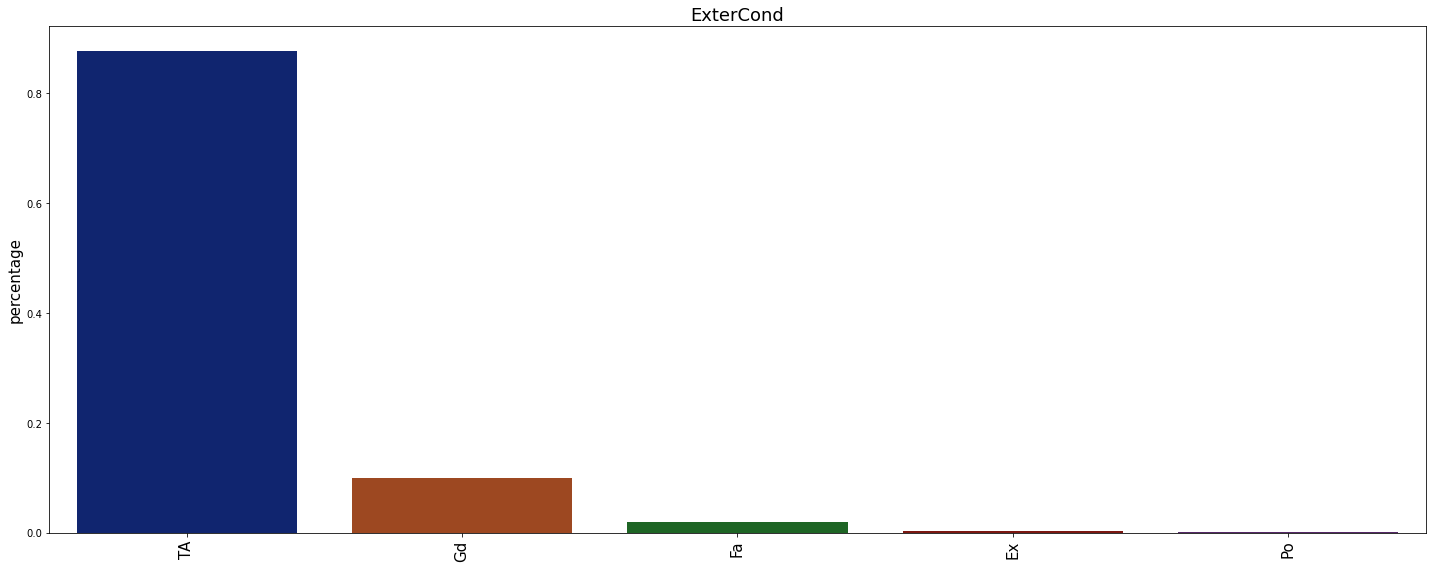

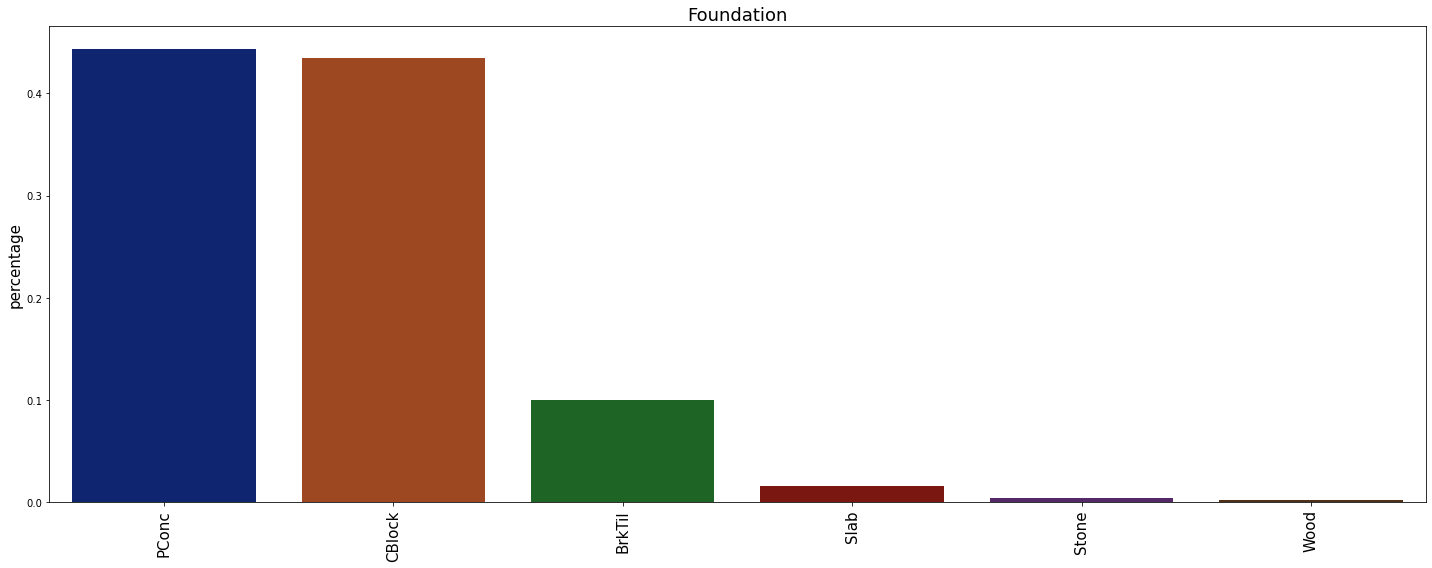

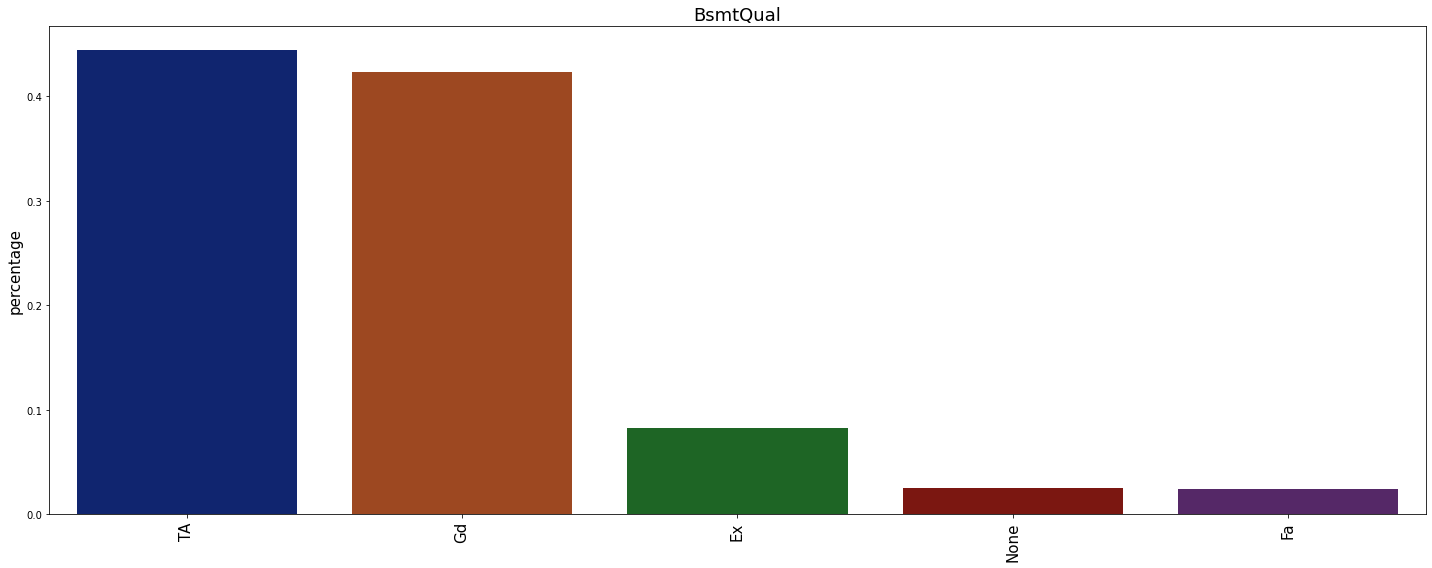

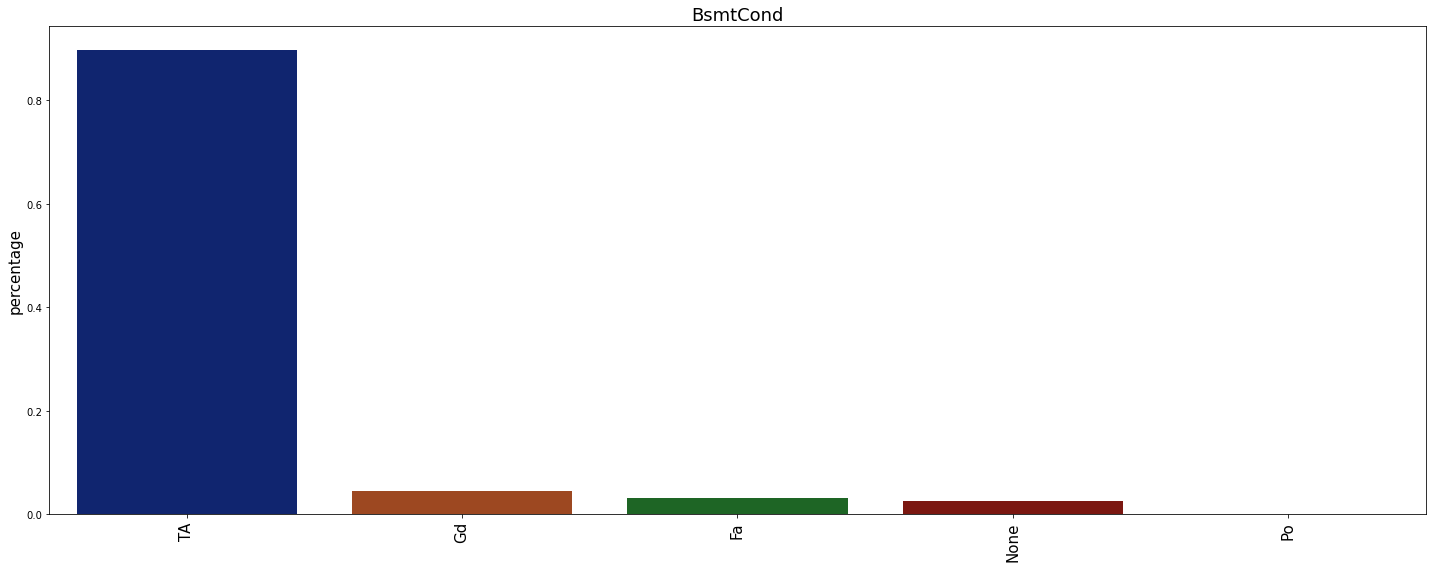

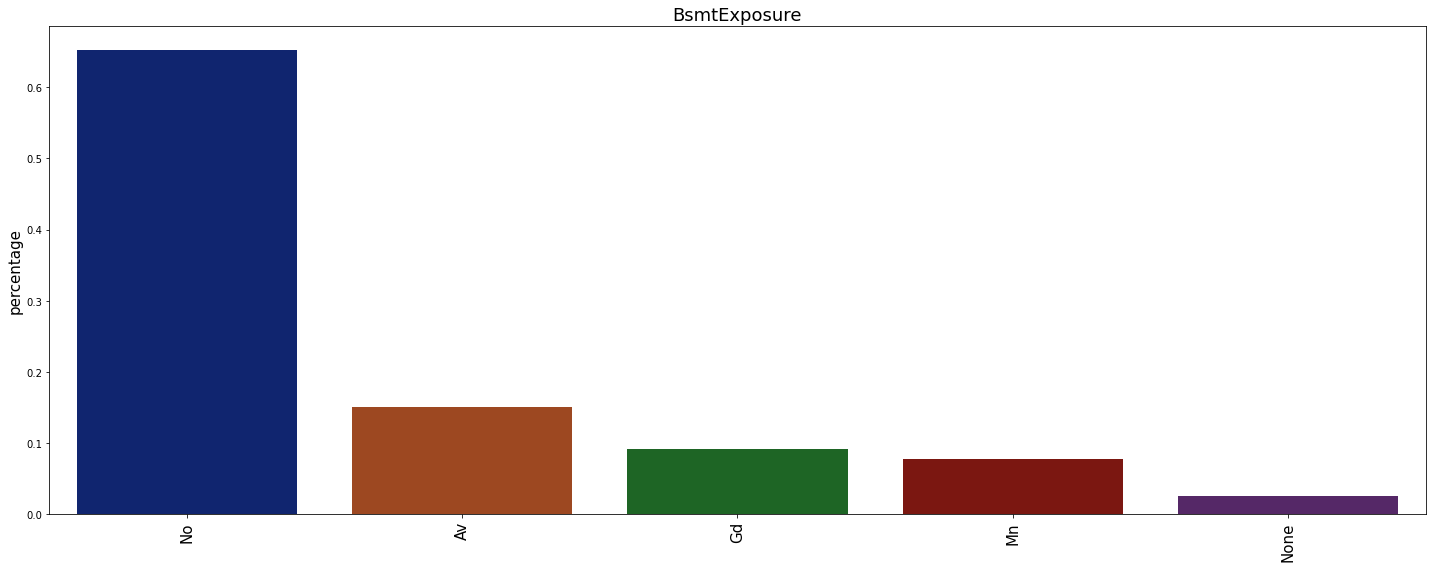

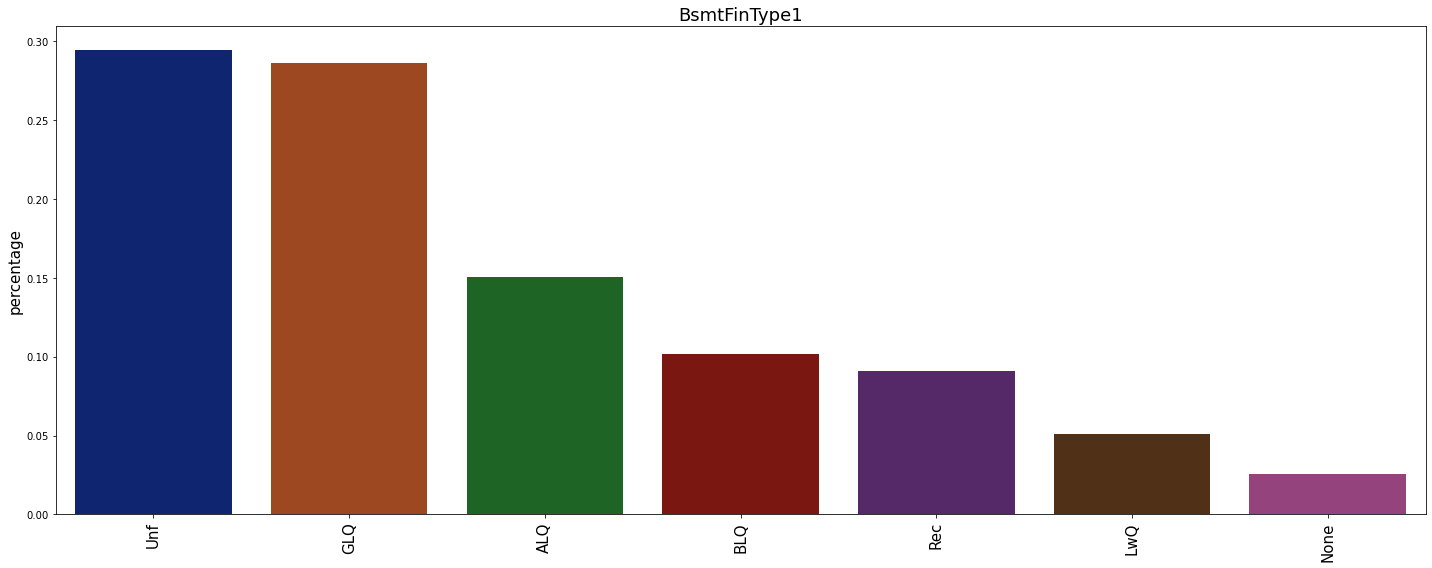

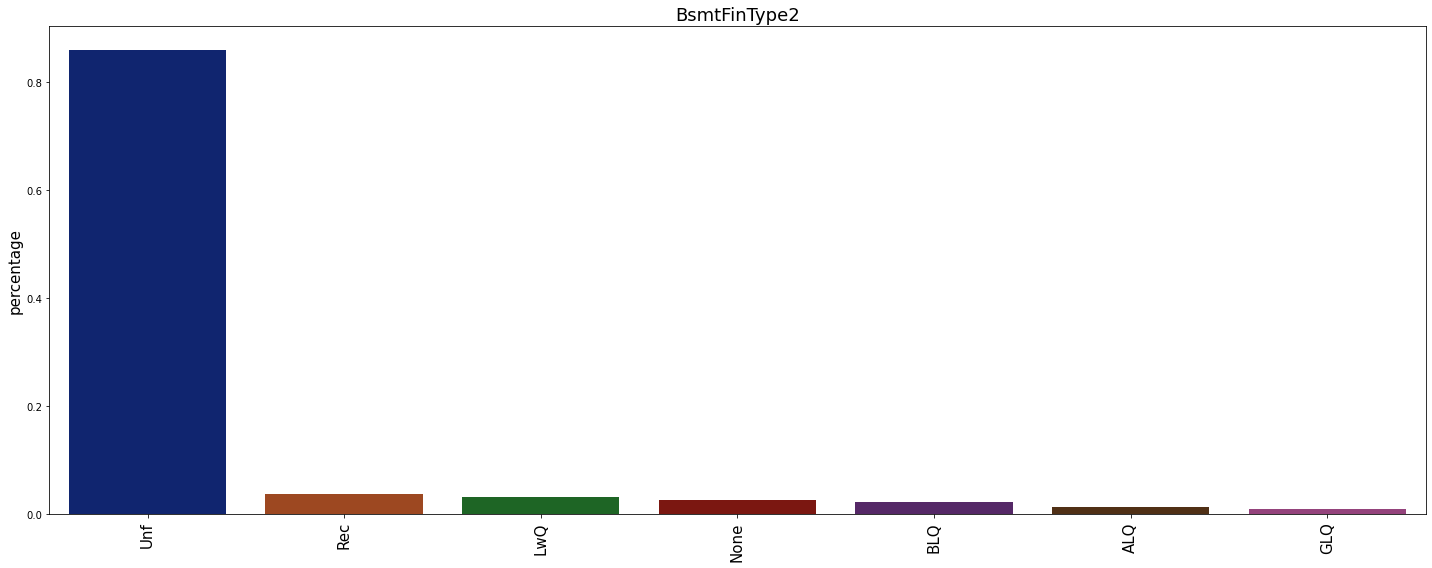

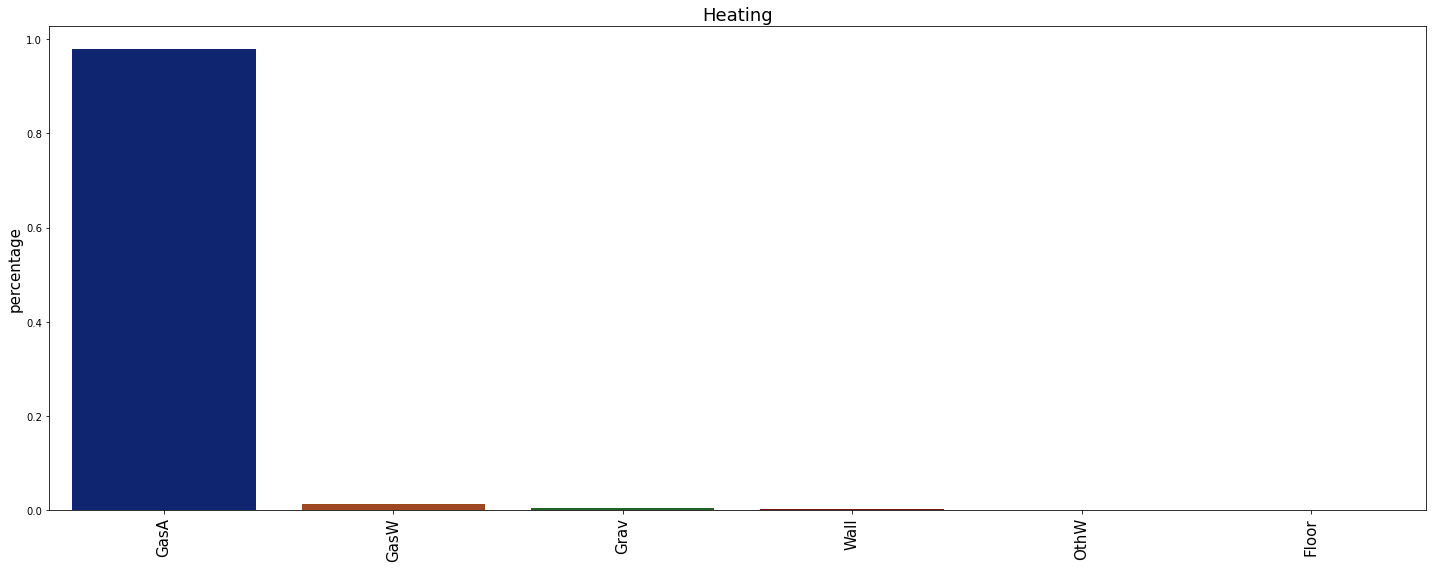

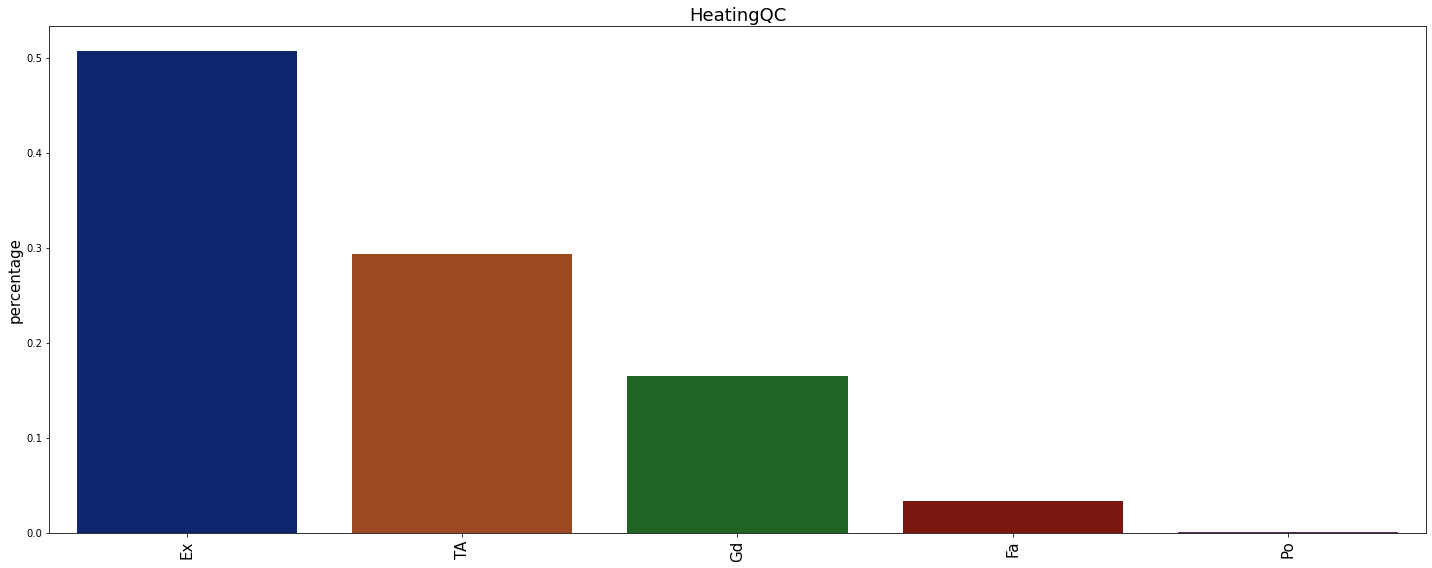

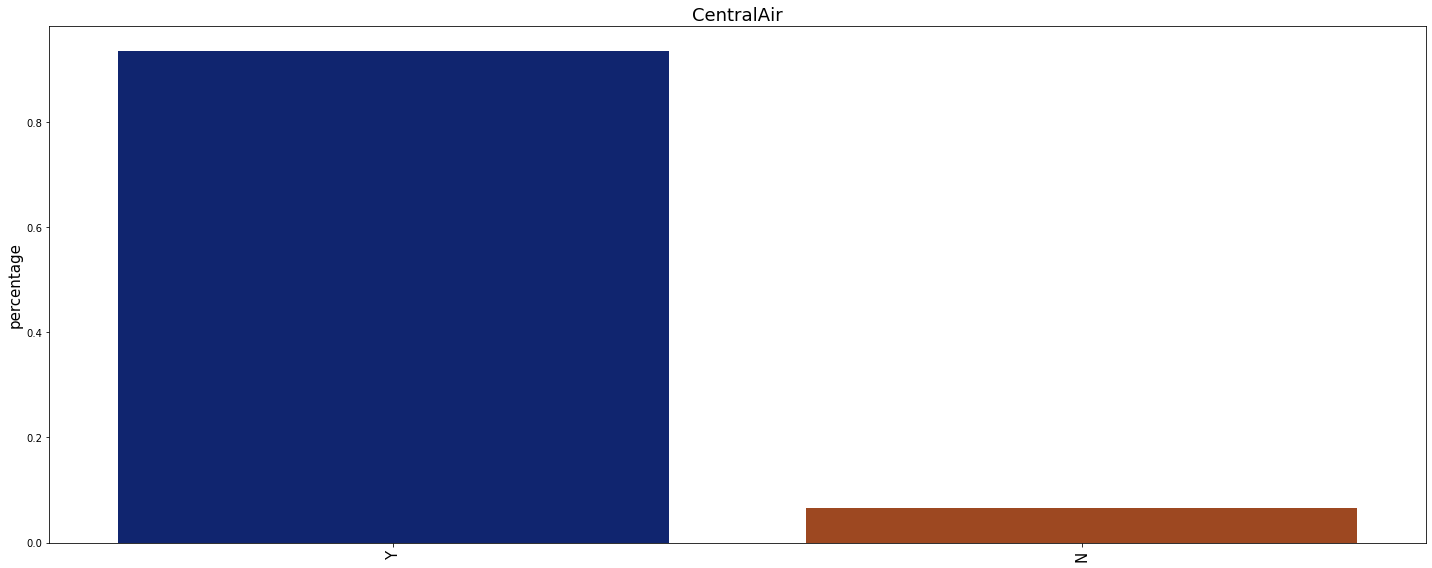

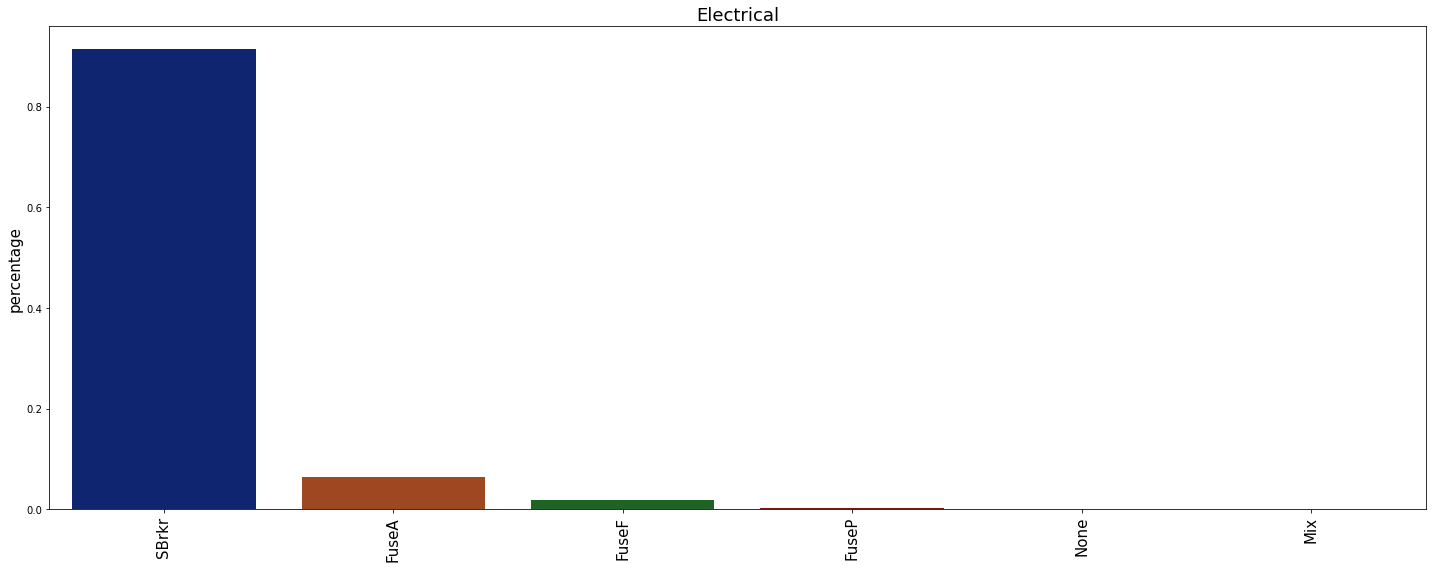

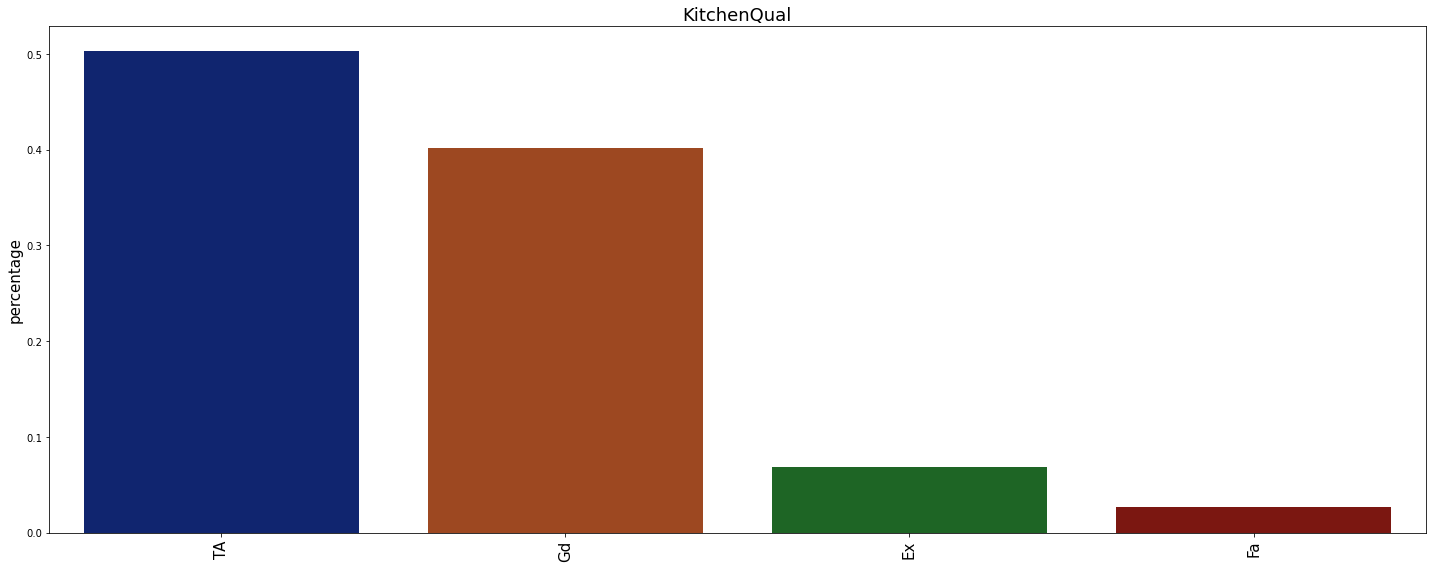

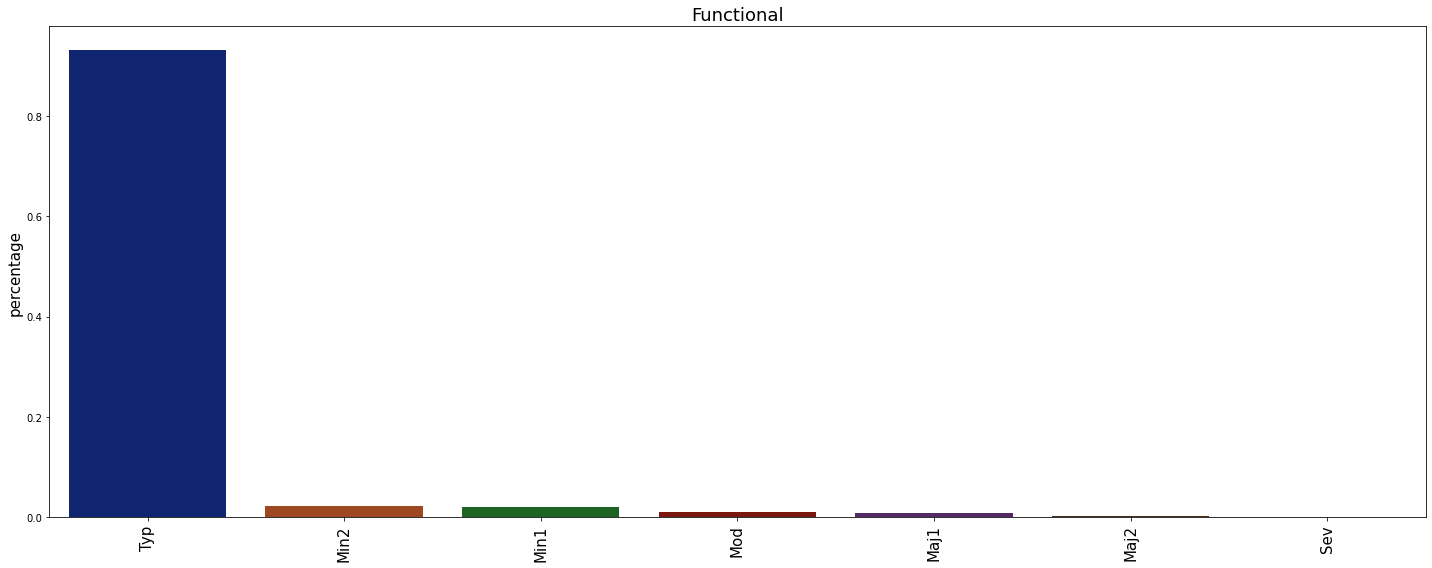

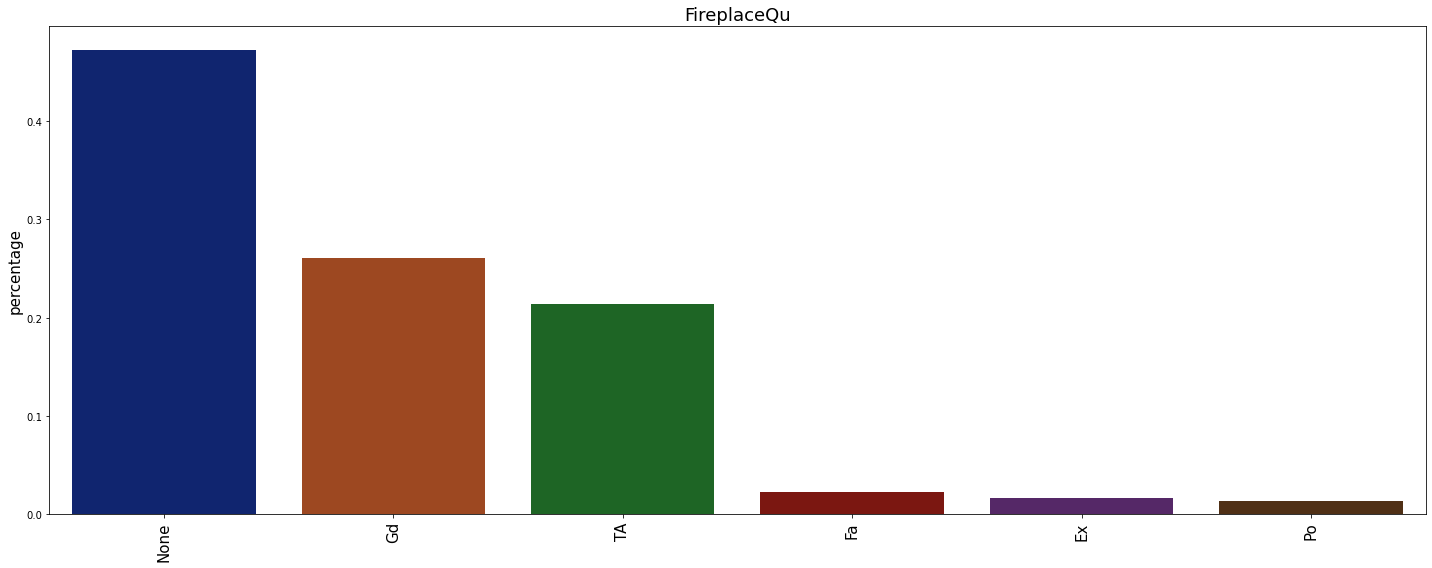

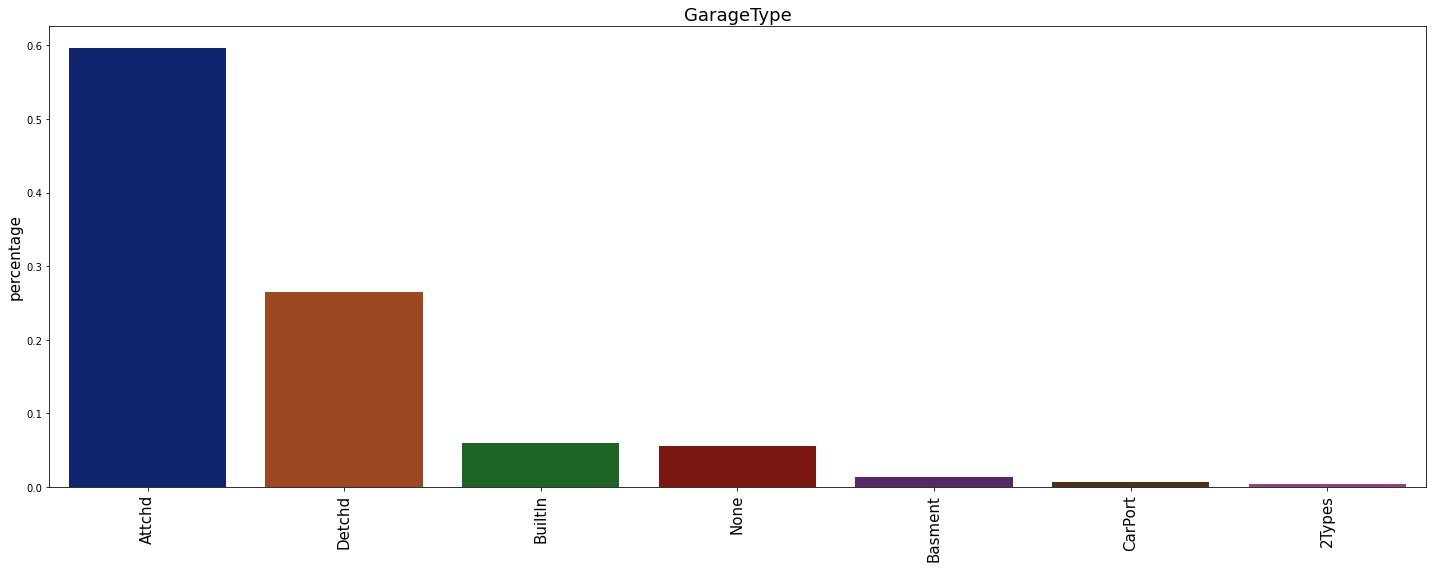

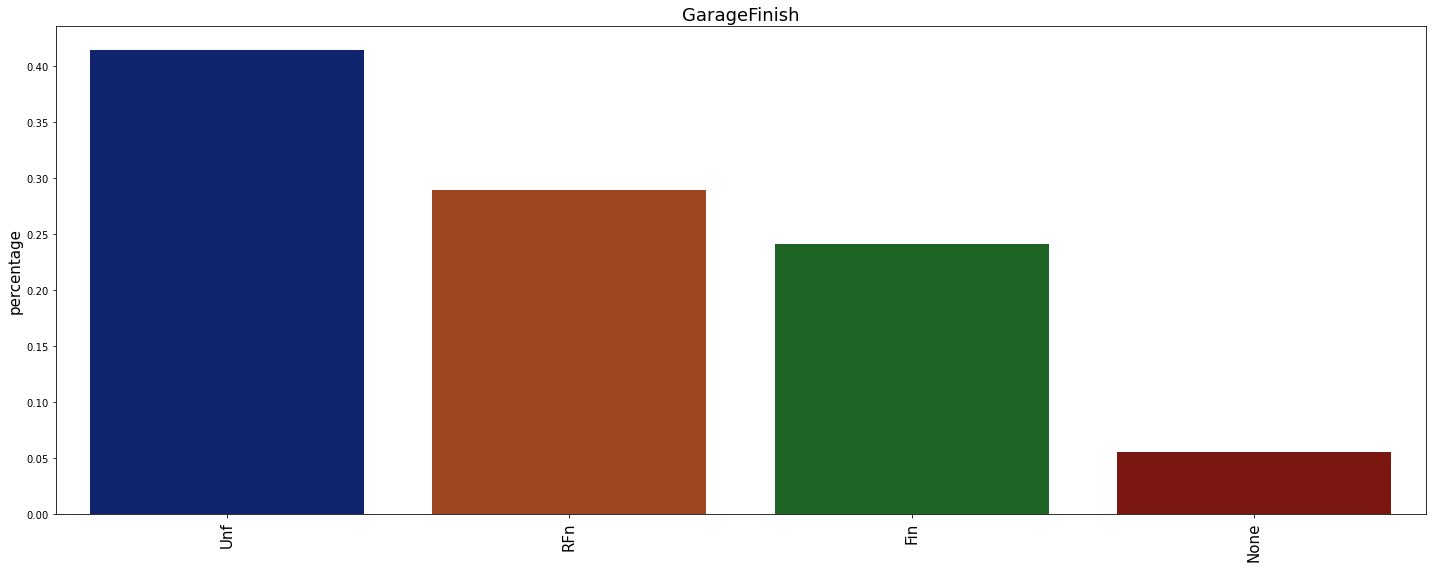

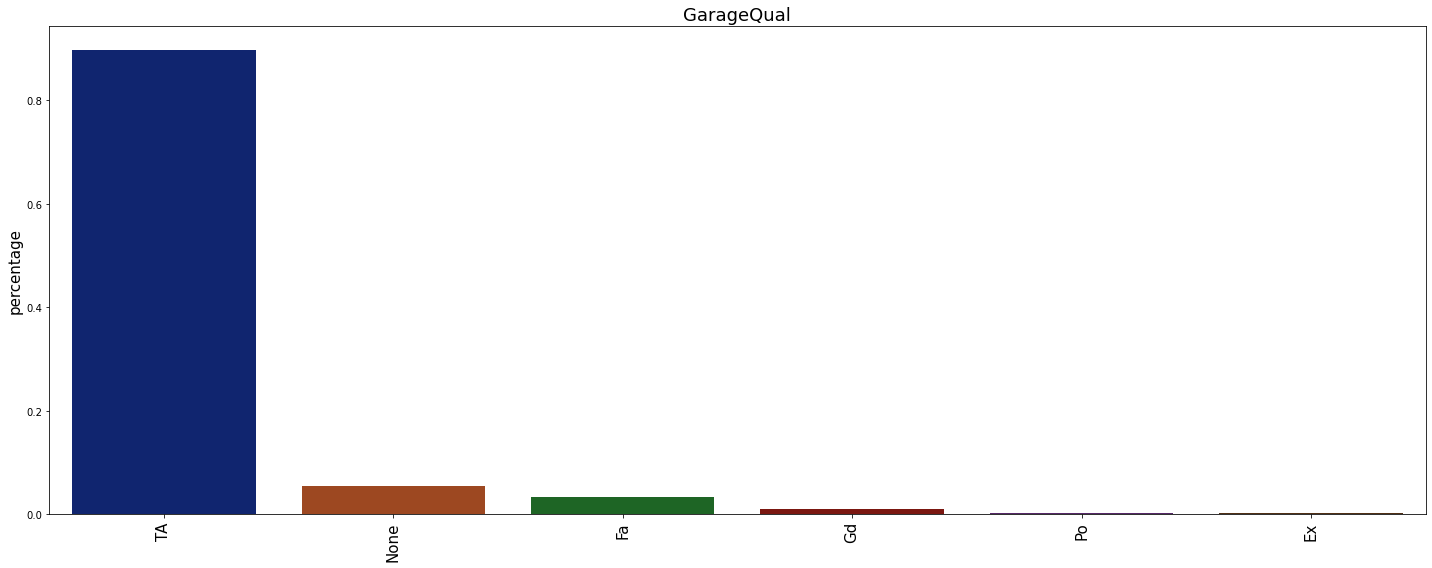

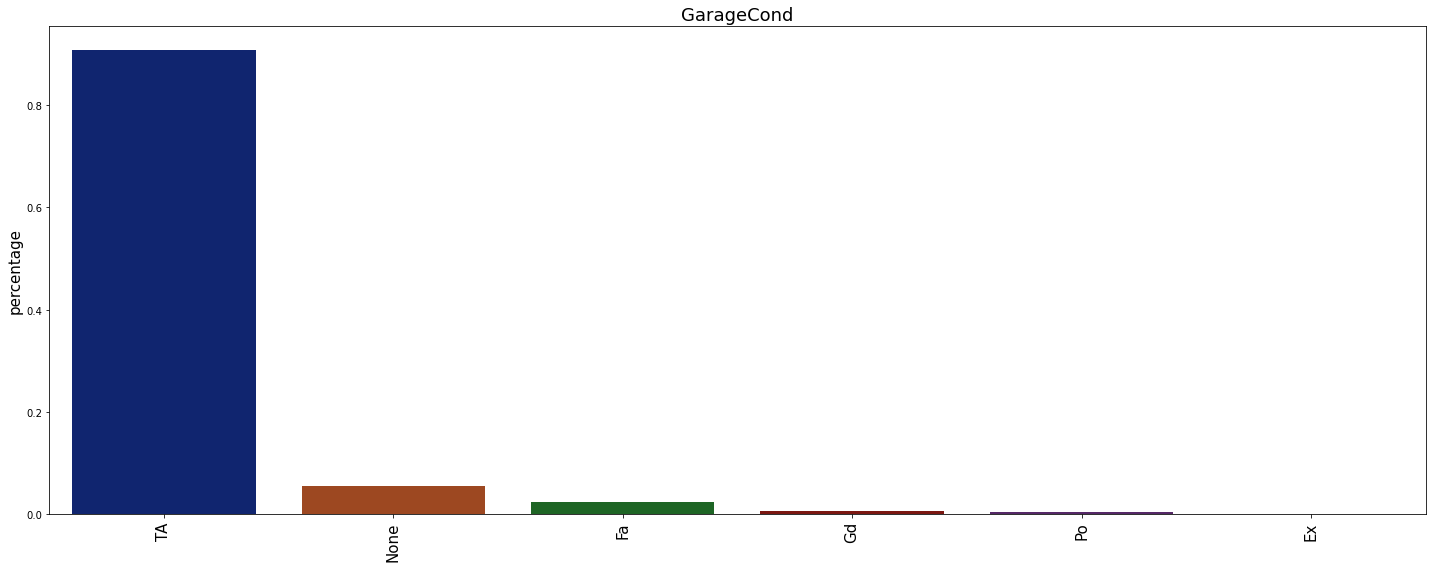

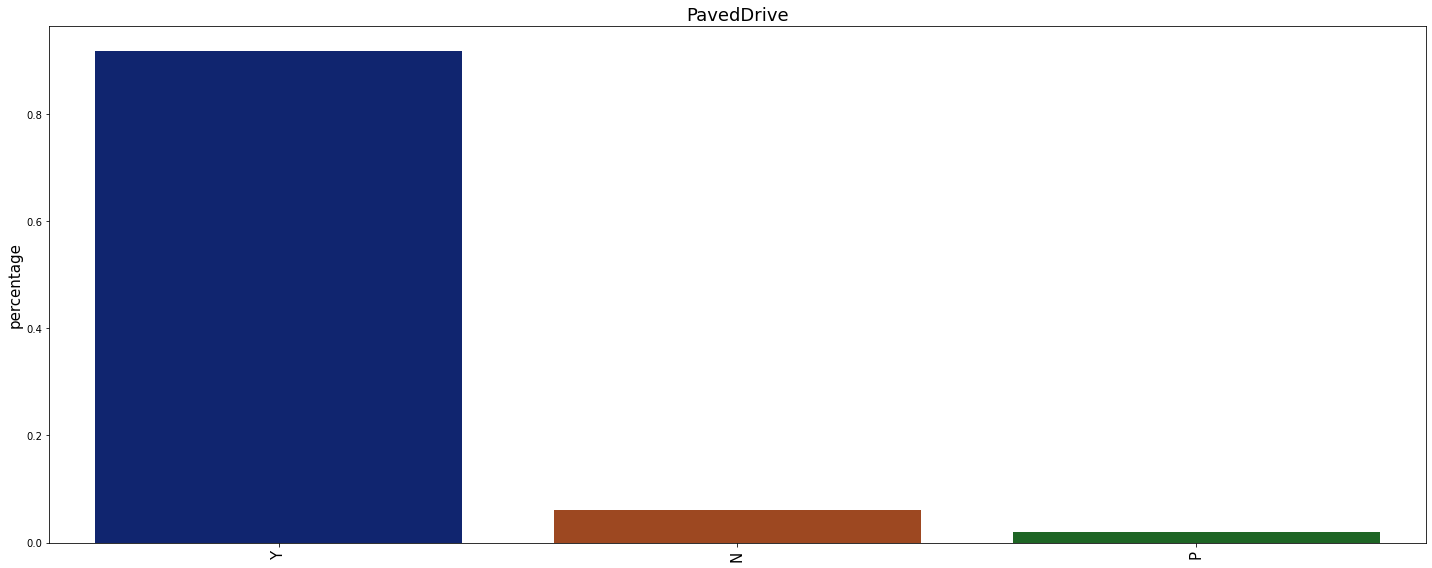

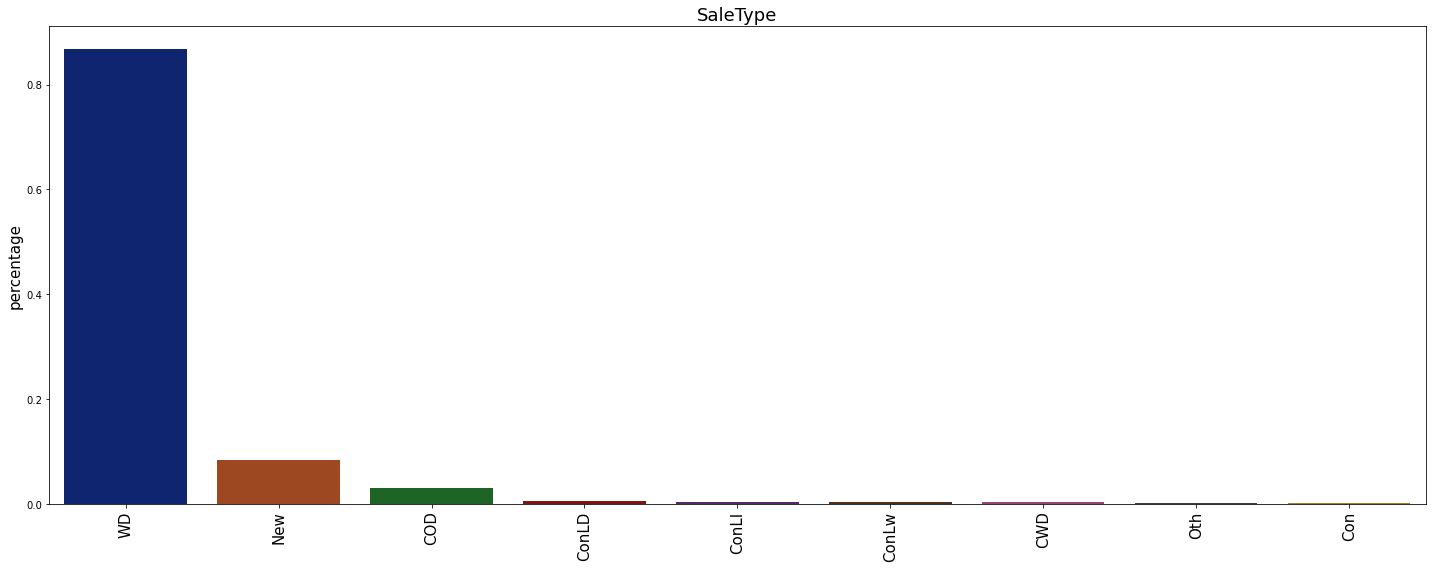

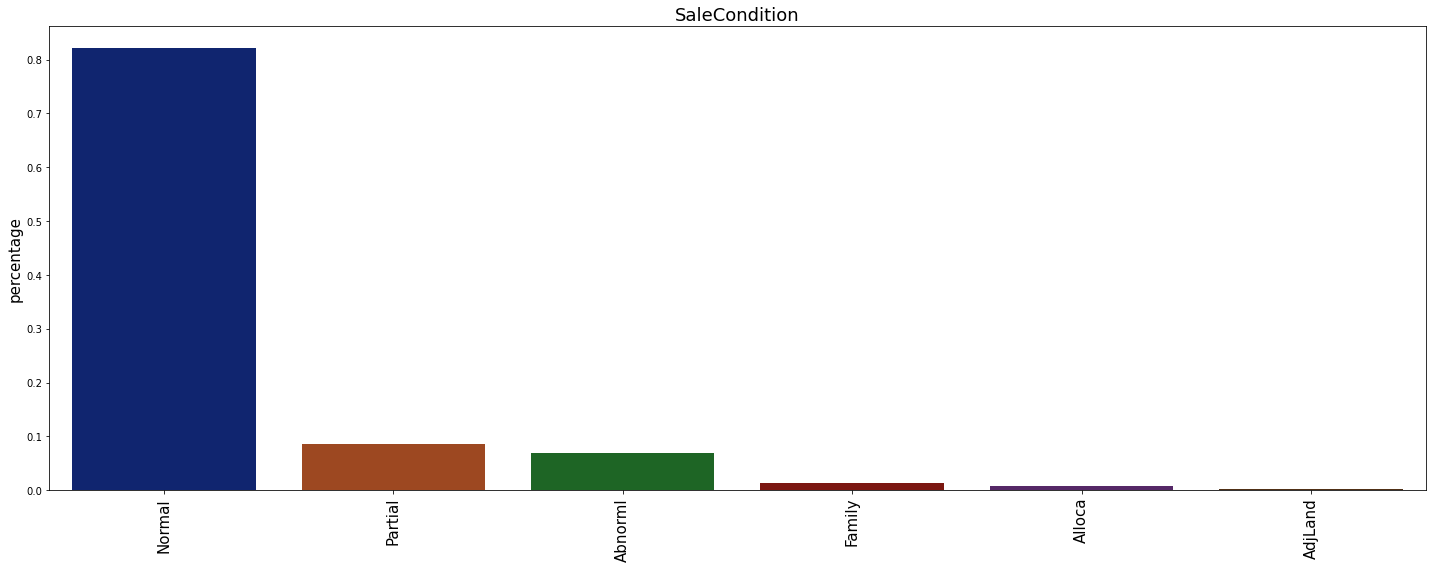

In [30]:
plt.figure(figsize = (18,30))
for i in Col_Cat:
    plt.figure(figsize=(20,8))
    sns.barplot(x = Housing[i].value_counts(normalize=True).index, y = Housing[i].value_counts(normalize=True),
                estimator=np.sum,palette="dark")
    plt.title(str(i),fontsize = 18 )
    plt.ylabel('percentage', fontsize = 15)
    plt.xticks(rotation = 90, fontsize = 15)
    plt.tight_layout()
    plt.show()

In [31]:
for features in Col_Cat:
    print("Distribution of Data for"+" "+ str(features))
    print(Housing[features].value_counts(normalize=True)*100)
    print('--'*50)

Distribution of Data for MSZoning
RL         78.835616
RM         14.931507
FV          4.452055
RH          1.095890
C (all)     0.684932
Name: MSZoning, dtype: float64
----------------------------------------------------------------------------------------------------
Distribution of Data for Street
Pave    99.589041
Grvl     0.410959
Name: Street, dtype: float64
----------------------------------------------------------------------------------------------------
Distribution of Data for LotShape
Reg    63.356164
IR1    33.150685
IR2     2.808219
IR3     0.684932
Name: LotShape, dtype: float64
----------------------------------------------------------------------------------------------------
Distribution of Data for LandContour
Lvl    89.794521
Bnk     4.315068
HLS     3.424658
Low     2.465753
Name: LandContour, dtype: float64
----------------------------------------------------------------------------------------------------
Distribution of Data for Utilities
AllPub    99.931507
No

In [32]:
## Dropping the columns with one value have >85% dominance i.e. these variables exhibit low variance.

Housing.drop(['Street', 'LandContour', 'LandSlope','Utilities', 'Condition1','Condition2', 'ExterCond', 'BsmtCond', 'RoofMatl', 
'Heating', 'BsmtFinType2', 'Functional' , 'Electrical', 'GarageCond', 'PavedDrive', 'CentralAir', 
              'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType'],axis=1,inplace=True)

In [33]:
Col_Cat = (Housing.describe(include='O')).columns.to_list()
print("No of Categorical Columns is {0}".format(len(Col_Cat)))

No of Categorical Columns is 21


In [34]:
Housing.describe(include='O')

MSZoning LotShape LotConfig Neighborhood BldgType HouseStyle RoofStyle  \
count      1460     1460      1460         1460     1460       1460      1460   
unique        5        4         5           25        5          8         6   
top          RL      Reg    Inside        NAmes     1Fam     1Story     Gable   
freq       1151      925      1052          225     1220        726      1141   

       Exterior1st Exterior2nd MasVnrType ExterQual Foundation BsmtQual  \
count         1460        1460       1460      1460       1460     1460   
unique          15          16          4         4          6        5   
top        VinylSd     VinylSd       None        TA      PConc       TA   
freq           515         504        872       906        647      649   

       BsmtExposure BsmtFinType1 HeatingQC KitchenQual FireplaceQu GarageType  \
count          1460         1460      1460        1460        1460       1460   
unique            5            7         5           4           6          7   
top              No          Unf        Ex          TA        None     Attchd   
freq            953          430       741         735         690        870   

       GarageFinish SaleCondition  
count          1460          1460  
unique            4             6  
top             Unf        Normal  
freq            605          1198

Maximum frequency of the variables currently is 1220, which is <85% of total count (1241 of 1460).

In [35]:
Housing.shape

(1460, 48)

### Bivariate Analysis

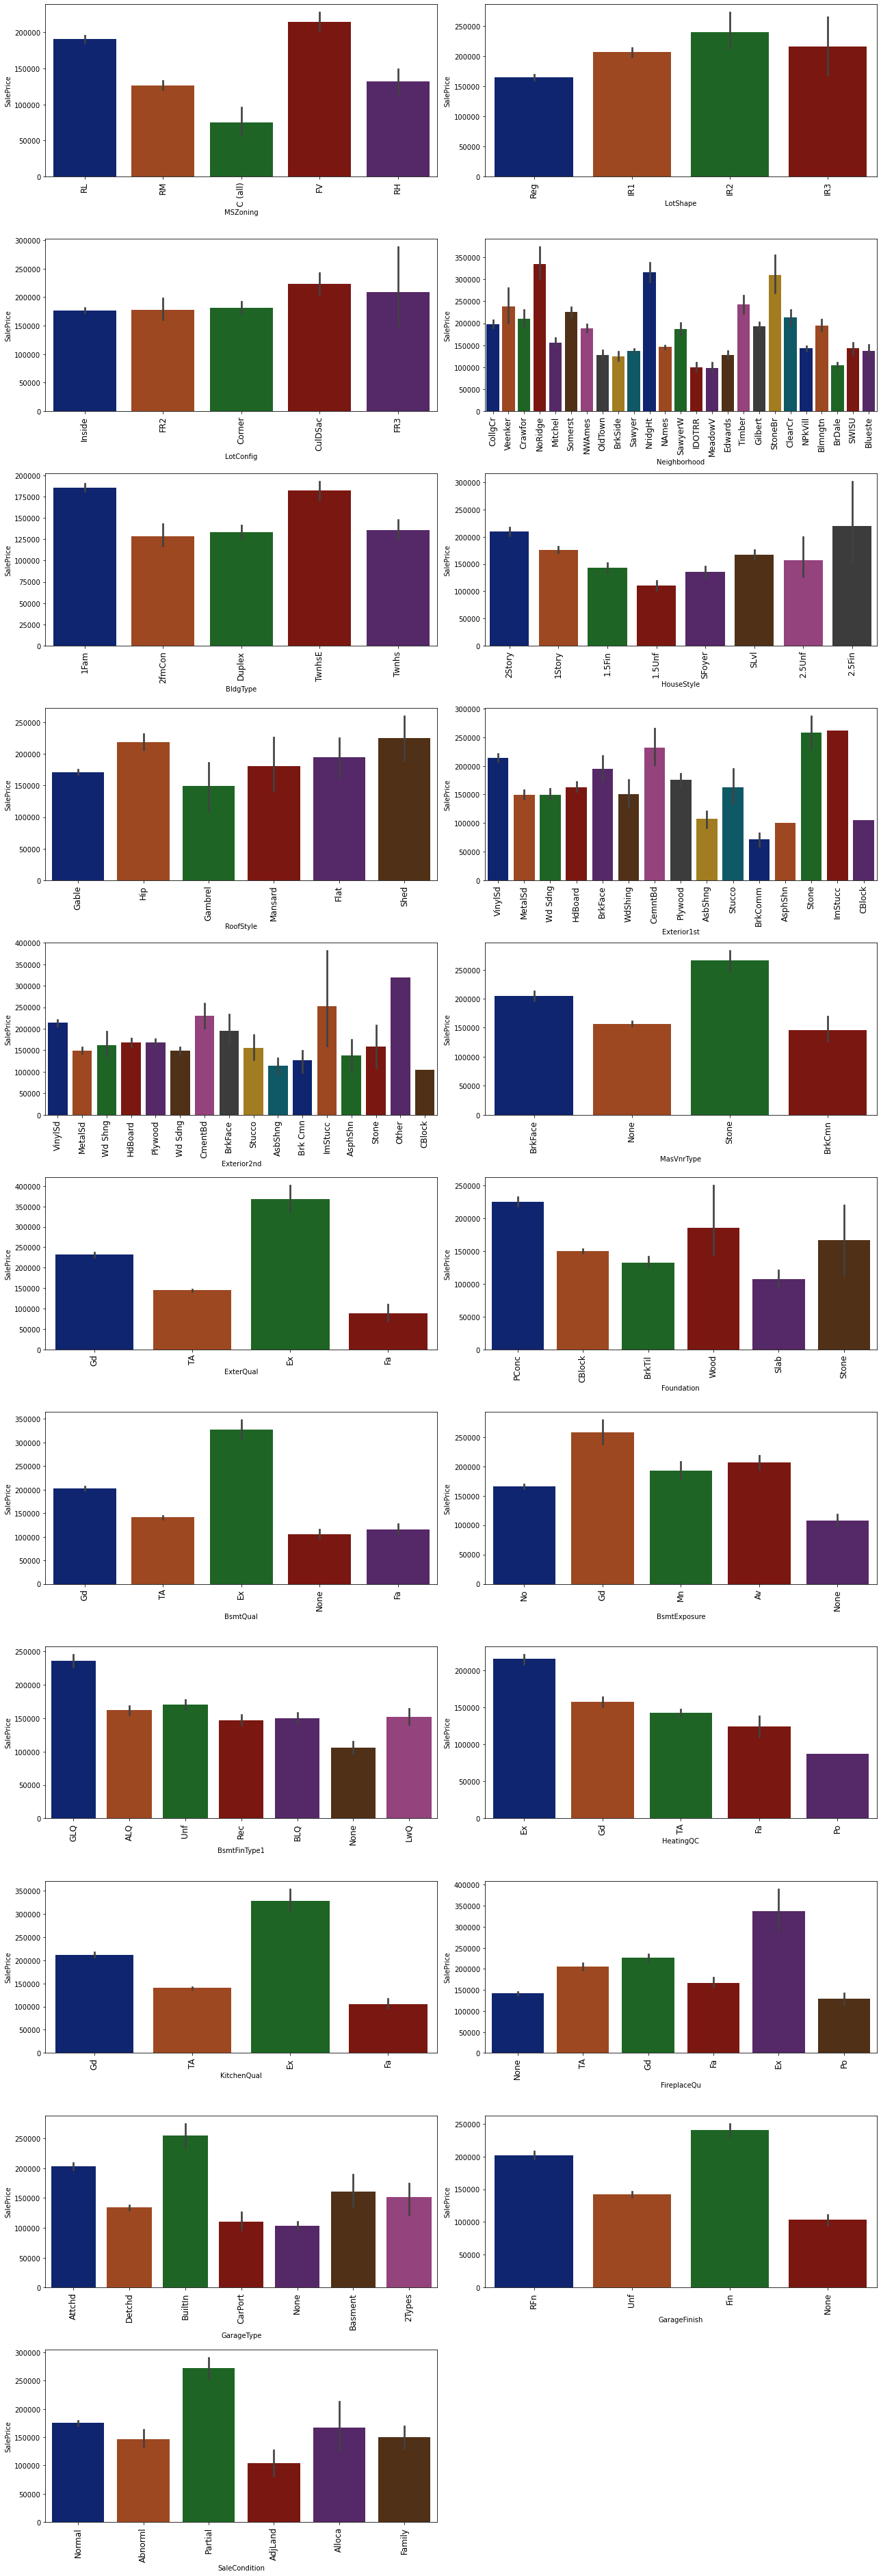

In [36]:
plt.figure(figsize = (18,80))
for i in enumerate(Col_Cat):
    plt.subplot(17,2,i[0]+1)
    sns.barplot(x = Housing[i[1]], y = Housing['SalePrice'],estimator = np.mean, palette="dark")
    plt.xticks(rotation = 90, fontsize = 12)
    plt.tight_layout()
plt.show()

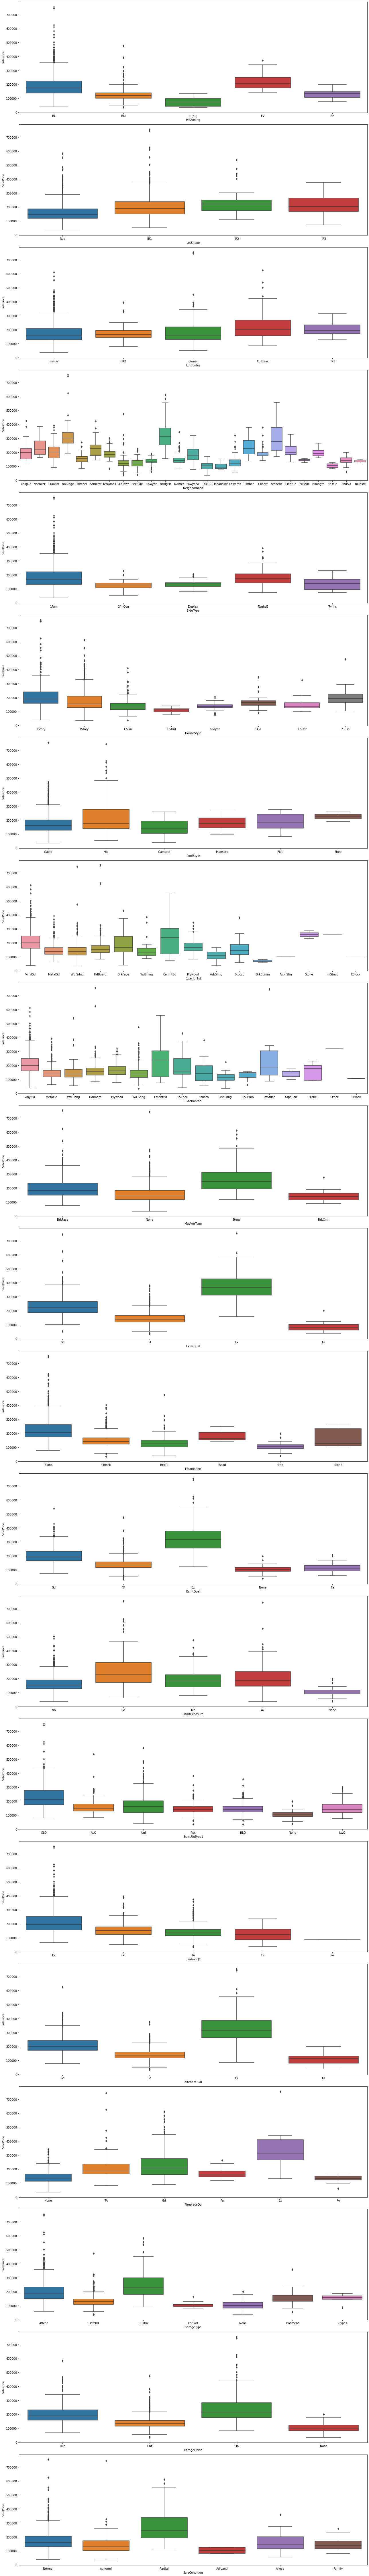

In [37]:
plt.figure(figsize=(18,125))
for j in enumerate(Col_Cat):
    plt.subplot(len(Col_Cat), 1, j[0]+1)
    sns.boxplot(x=j[1], y='SalePrice', data=Housing)
    plt.tight_layout()
plt.show()

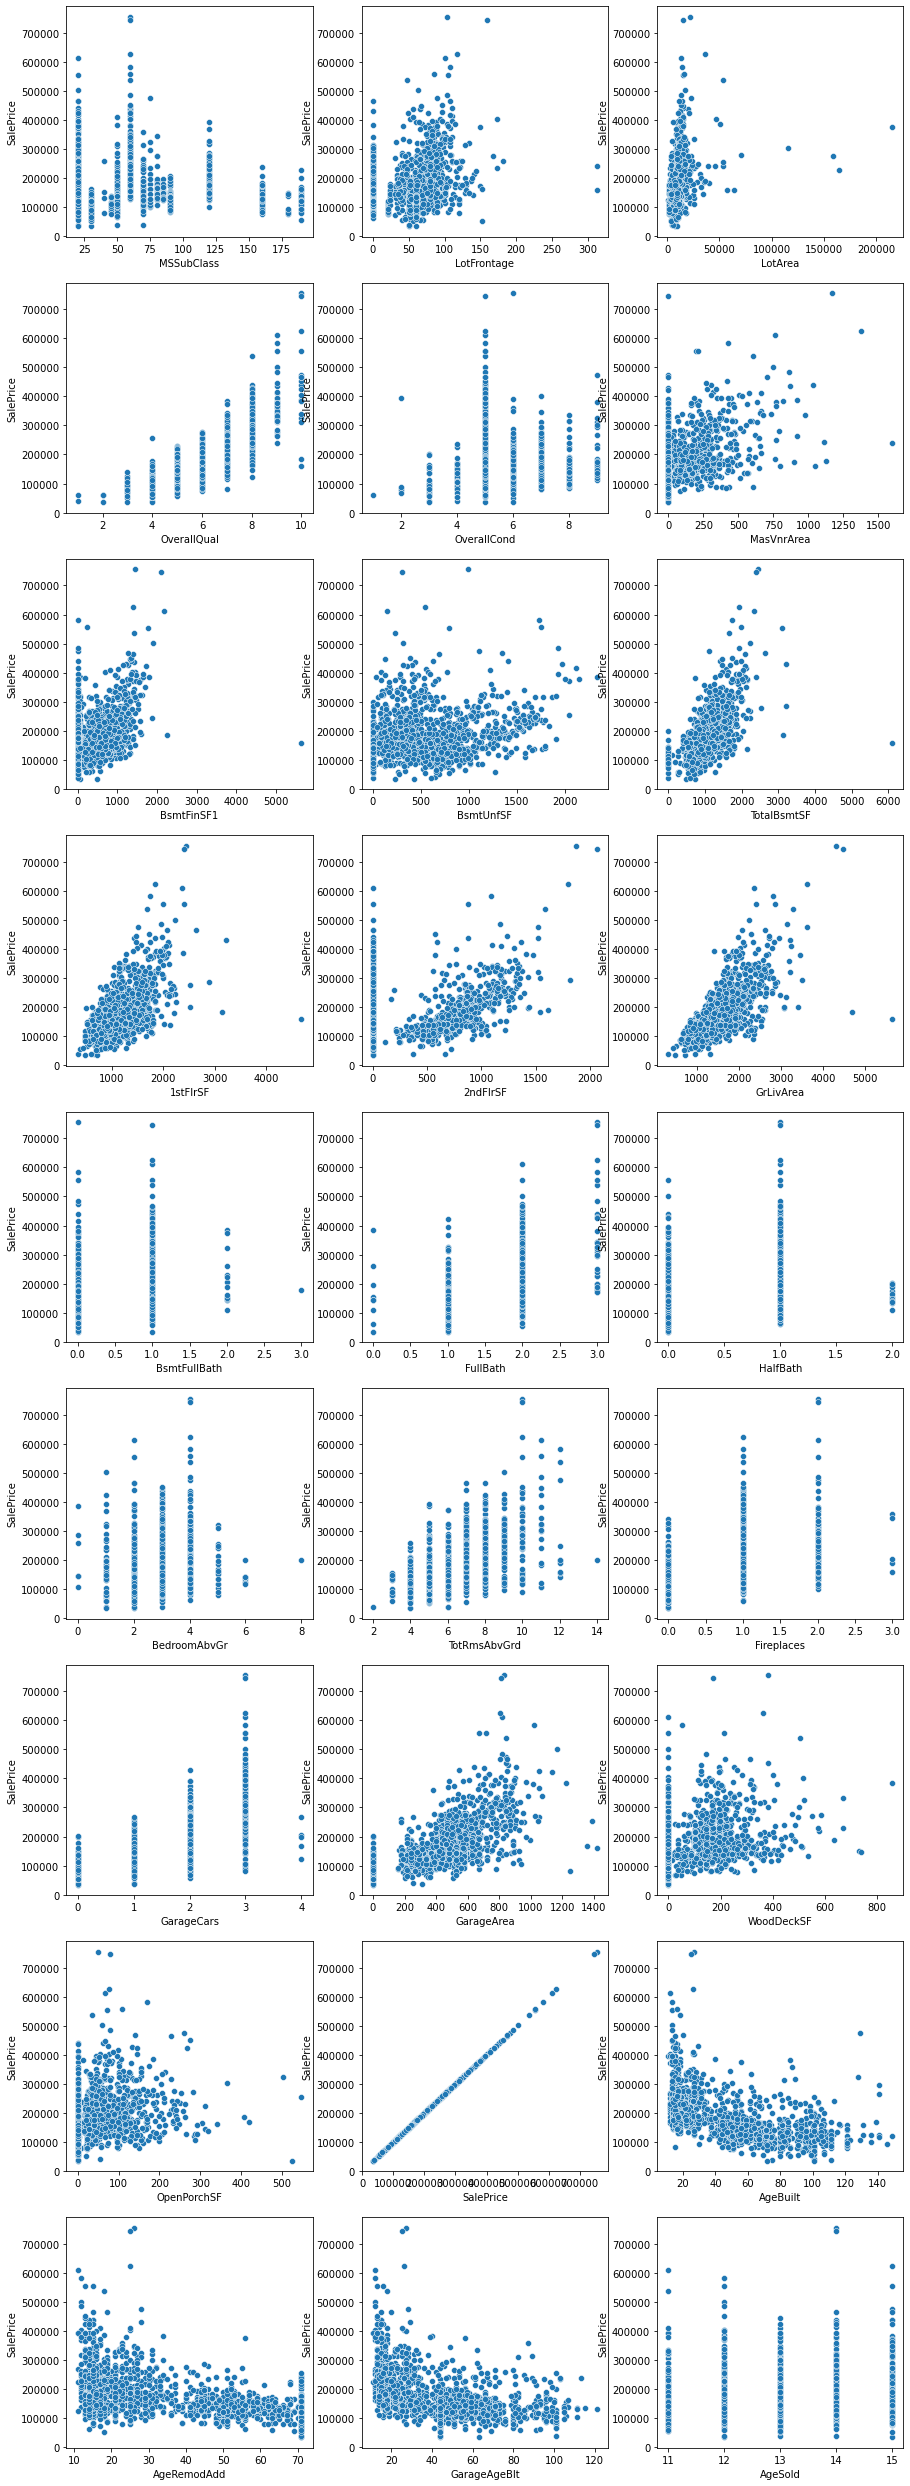

In [38]:
## Scatter plots between numerical attributes v/s 'SalePrice'
plt.figure(figsize=(15,50))
for feature in enumerate(Col_Num):
    plt.subplot(len(Col_Num)//3+1, 3, feature[0]+1)
    sns.scatterplot(x=Housing[feature[1]], y=Housing.SalePrice)
    plt.xlabel(feature[1])
    plt.ylabel("SalePrice")
plt.show()

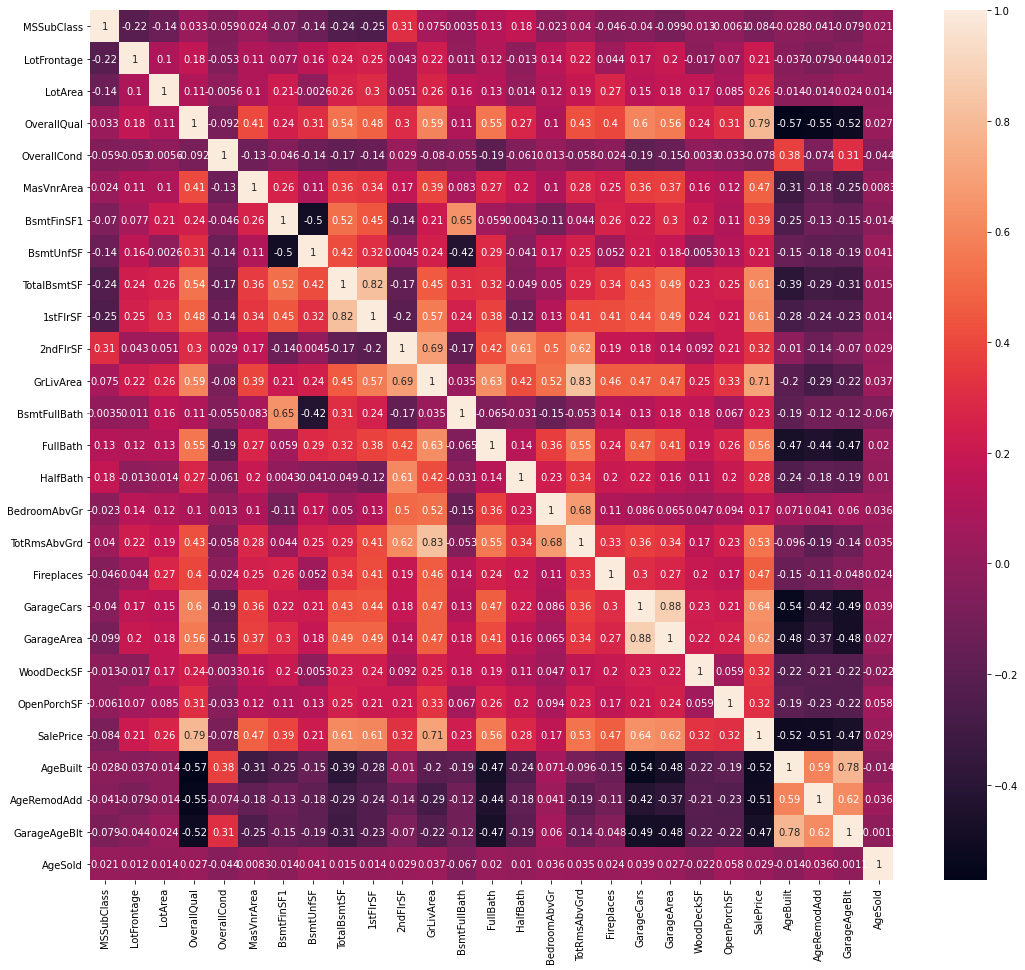

In [39]:
plt.figure(figsize=(18,16))
sns.heatmap(Housing[Col_Num].corr(),annot=True)
plt.show()

Features that are highly correlated (>80%): 

1)`TotRmsAbvGrd` & `GrLivArea`

2)`1stFlrSF` & `TotalBsmtSF`

3)`GarageArea` & `GarageCars`

<h3>
<font color=Green>Data Preparation</font>
</h3>

#### Outlier Treatment

In [40]:
Housing.describe(percentiles=[.25,.5,.75,.90,.95,.99])

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    57.623288   10516.828082     6.099315     5.575342   
std      42.300571    34.664304    9981.264932     1.382997     1.112799   
min      20.000000     0.000000    1300.000000     1.000000     1.000000   
25%      20.000000    42.000000    7553.500000     5.000000     5.000000   
50%      50.000000    63.000000    9478.500000     6.000000     5.000000   
75%      70.000000    79.000000   11601.500000     7.000000     6.000000   
90%     120.000000    92.000000   14381.700000     8.000000     7.000000   
95%     160.000000   104.000000   17401.150000     8.000000     8.000000   
99%     190.000000   137.410000   37567.640000    10.000000     9.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

        MasVnrArea   BsmtFinSF1    BsmtUnfSF  TotalBsmtSF     1stFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean    103.117123   443.639726   567.240411  1057.429452  1162.626712   
std     180.731373   456.098091   441.866955   438.705324   386.587738   
min       0.000000     0.000000     0.000000     0.000000   334.000000   
25%       0.000000     0.000000   223.000000   795.750000   882.000000   
50%       0.000000   383.500000   477.500000   991.500000  1087.000000   
75%     164.250000   712.250000   808.000000  1298.250000  1391.250000   
90%     335.000000  1065.500000  1232.000000  1602.200000  1680.000000   
95%     456.000000  1274.000000  1468.000000  1753.000000  1831.250000   
99%     791.280000  1572.410000  1797.050000  2155.050000  2219.460000   
max    1600.000000  5644.000000  2336.000000  6110.000000  4692.000000   

          2ndFlrSF    GrLivArea  BsmtFullBath     FullBath     HalfBath  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean    346.992466  1515.463699      0.425342     1.565068     0.382877   
std     436.528436   525.480383      0.518911     0.550916     0.502885   
min       0.000000   334.000000      0.000000     0.000000     0.000000   
25%       0.000000  1129.500000      0.000000     1.000000     0.000000   
50%       0.000000  1464.000000      0.000000     2.000000     0.000000   
75%     728.000000  1776.750000      1.000000     2.000000     1.000000   
90%     954.200000  2158.300000      1.000000     2.000000     1.000000   
95%    1141.050000  2466.100000      1.000000     2.000000     1.000000   
99%    1418.920000  3123.480000      2.000000     3.000000     1.000000   
max    2065.000000  5642.000000      3.000000     3.000000     2.000000   

       BedroomAbvGr  TotRmsAbvGrd   Fireplaces   GarageCars   GarageArea  \
count   1460.000000   1460.000000  1460.000000  1460.000000  1460.000000   
mean       2.866438      6.517808     0.613014     1.767123   472.980137   
std        0.815778      1.625393     0.644666     0.747315   213.804841   
min        0.000000      2.000000     0.000000     0.000000     0.000000   
25%        2.000000      5.000000     0.000000     1.000000   334.500000   
50%        3.000000      6.000000     1.000000     2.000000   480.000000   
75%        3.000000      7.000000     1.000000     2.000000   576.000000   
90%        4.000000      9.000000     1.000000     3.000000   757.100000   
95%        4.000000     10.000000     2.000000     3.000000   850.100000   
99%        5.000000     11.000000     2.000000     3.000000  1002.790000   
max        8.000000     14.000000     3.000000     4.000000  1418.000000   

        WoodDeckSF  OpenPorchSF      SalePrice     AgeBuilt  AgeRemodAdd  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274  180921.195890    49.732192    36.134247   
std     125.338794    66.256028   79442.502883    30.202904    20.645407   
min       0.000000     0.000000   34900.000000    11.000000    11.000000   
25%       0.

In [41]:
## Separating the target variable 'SalePrice' prior to the treatment.
Col_Num.remove('SalePrice')

Col_Num

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'AgeBuilt',
 'AgeRemodAdd',
 'GarageAgeBlt',
 'AgeSold']

In [42]:
## Outlier Treatment using Power Transformer

from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

Housing_num = pd.DataFrame(pt.fit_transform(Housing[Col_Num]),index=range(1,1461))
Housing_num.columns = Housing[Col_Num].columns
Housing_num.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
1    0.493460     0.295186 -0.141171     0.667499    -0.477387    1.230708   
2   -1.164269     0.660207  0.105609    -0.042192     2.011352   -0.818452   
3    0.493460     0.369785  0.413721     0.667499    -0.477387    1.193873   
4    0.698191     0.168858  0.095490     0.667499    -0.477387   -0.818452   
5    0.493460     0.754467  0.877127     1.350924    -0.477387    1.333038   

   BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  \
1    0.797537  -0.887576    -0.404029 -0.799624  1.170239   0.528531   
2    1.011471  -0.434388     0.508177  0.429151 -0.871454  -0.382755   
3    0.571325  -0.048083    -0.253787 -0.568533  1.172896   0.659112   
4    0.142272   0.183337    -0.644806 -0.429428  1.146834   0.540797   
5    0.750541   0.077485     0.254387  0.124698  1.209630   1.282894   

   BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  TotRmsAbvGrd  Fireplaces  \
1      1.175573  0.797246  1.284128      0.170752      0.946380   -1.027341   
2     -0.838866  0.797246 -0.773692      0.170752     -0.234627    0.784005   
3      1.175573  0.797246  1.284128      0.170752     -0.234627    0.784005   
4      1.175573 -1.025173 -0.773692      0.170752      0.389921    0.784005   
5      1.175573  0.797246  1.284128      1.382874      1.448615    0.784005   

   GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  AgeBuilt  AgeRemodAdd  \
1    0.273835    0.383899   -0.950337     0.841820 -1.173229    -0.880312   
2    0.273835   -0.004602    1.213714    -1.071307  0.090276     0.678691   
3    0.273835    0.641990   -0.950337     0.668453 -1.041283    -0.784480   
4    1.759713    0.786092   -0.950337     0.584540  1.526708     0.879959   
5    1.759713    1.583257    1.079695     0.991895 -0.979038    -0.608235   

   GarageAgeBlt   AgeSold  
1     -1.125533 -0.156815  
2      0.330301  0.604462  
3     -0.970775 -0.156815  
4     -0.760447  1.385497  
5     -0.898004 -0.156815

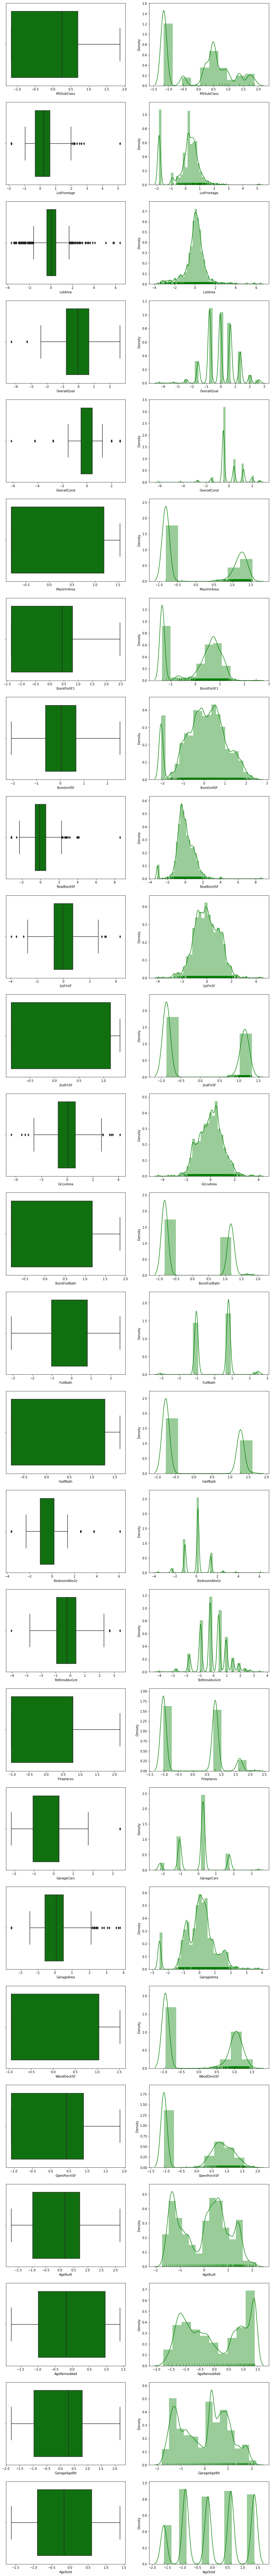

In [43]:
plt.figure(figsize=(15, 150))
for k in enumerate(Col_Num):
    plt.subplot(len(Col_Num), 2, 2*k[0]+1)
    sns.boxplot(Housing_num[k[1]],color='green')
    plt.subplot(len(Col_Num), 2, 2*k[0]+2)
    sns.distplot(Housing_num[k[1]],color='green',rug=True, kde_kws={'bw':0.1})
plt.show()

In [44]:
## Create the new dataframe by concatenating all the relevant variables and the target variable.

HOUSING_FINAL = pd.concat([Housing[Col_Cat],Housing_num,Housing['SalePrice']],axis=1)

HOUSING_FINAL

MSZoning LotShape LotConfig Neighborhood BldgType HouseStyle RoofStyle  \
1          RL      Reg    Inside      CollgCr     1Fam     2Story     Gable   
2          RL      Reg       FR2      Veenker     1Fam     1Story     Gable   
3          RL      IR1    Inside      CollgCr     1Fam     2Story     Gable   
4          RL      IR1    Corner      Crawfor     1Fam     2Story     Gable   
5          RL      IR1       FR2      NoRidge     1Fam     2Story     Gable   
...       ...      ...       ...          ...      ...        ...       ...   
1456       RL      Reg    Inside      Gilbert     1Fam     2Story     Gable   
1457       RL      Reg    Inside       NWAmes     1Fam     1Story     Gable   
1458       RL      Reg    Inside      Crawfor     1Fam     2Story     Gable   
1459       RL      Reg    Inside        NAmes     1Fam     1Story       Hip   
1460       RL      Reg    Inside      Edwards     1Fam     1Story     Gable   

     Exterior1st Exterior2nd MasVnrType ExterQual Foundation BsmtQual  \
1        VinylSd     VinylSd    BrkFace        Gd      PConc       Gd   
2        MetalSd     MetalSd       None        TA     CBlock       Gd   
3        VinylSd     VinylSd    BrkFace        Gd      PConc       Gd   
4        Wd Sdng     Wd Shng       None        TA     BrkTil       TA   
5        VinylSd     VinylSd    BrkFace        Gd      PConc       Gd   
...          ...         ...        ...       ...        ...      ...   
1456     VinylSd     VinylSd       None        TA      PConc       Gd   
1457     Plywood     Plywood      Stone        TA     CBlock       Gd   
1458     CemntBd     CmentBd       None        Ex      Stone       TA   
1459     MetalSd     MetalSd       None        TA     CBlock       TA   
1460     HdBoard     HdBoard       None        Gd     CBlock       TA   

     BsmtExposure BsmtFinType1 HeatingQC KitchenQual FireplaceQu GarageType  \
1              No          GLQ        Ex          Gd        None     Attchd   
2              Gd          ALQ        Ex          TA          TA     Attchd   
3              Mn          GLQ        Ex          Gd          TA     Attchd   
4              No          ALQ        Gd          Gd          Gd     Detchd   
5              Av          GLQ        Ex          Gd          TA     Attchd   
...           ...          ...       ...         ...         ...        ...   
1456           No          Unf        Ex          TA          TA     Attchd   
1457           No          ALQ        TA          TA          TA     Attchd   
1458           No          GLQ        Ex          Gd          Gd     Attchd   
1459           Mn          GLQ        Gd          Gd        None     Attchd   
1460           No          BLQ        Gd          TA        None     Attchd   

     GarageFinish SaleCondition  MSSubClass  LotFrontage   LotArea  \
1             RFn        Normal    0.493460     0.295186 -0.141171   
2             RFn        Normal   -1.164269     0.660207  0.105609   
3             RFn        Normal    0.493460     0.369785  0.413721   
4             Unf       Abnorml    0.698191     0.168858  0.095490   
5             RFn        Normal    0.493460     0.754467  0.877127   
...           ...           ...         ...          ...       ...   
1456          RFn        Normal    0.493460     0.219701 -0.266808   
1457          Unf        Normal   -1.164269     0.777850  0.722071   
1458          RFn        Normal    0.698191     0.320149 -0.010330   
1459          Unf        Normal   -1.164269     0.369785  0.129088   
1460          Fin        Normal   -1.164269     0.540660  0.172505   

      OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  BsmtUnfSF  \
1        0.667499    -0.477387    1.230708    0.797537  -0.887576   
2       -0.042192     2.011352   -0.818452    1.011471  -0.434388   
3        0.667499    -0.477387    1.193873    0.571325  -0.048083   
4        0.667499    -0.477387   -0.818452    0.142272   0.183337   
5        1.350924    -0.477387    1.333038  

The above discussed categorical variables have some ordinal variables. Ordinal variables need to be encoded prior to modelling.

In [45]:
HOUSING_FINAL.head()

MSZoning LotShape LotConfig Neighborhood BldgType HouseStyle RoofStyle  \
1       RL      Reg    Inside      CollgCr     1Fam     2Story     Gable   
2       RL      Reg       FR2      Veenker     1Fam     1Story     Gable   
3       RL      IR1    Inside      CollgCr     1Fam     2Story     Gable   
4       RL      IR1    Corner      Crawfor     1Fam     2Story     Gable   
5       RL      IR1       FR2      NoRidge     1Fam     2Story     Gable   

  Exterior1st Exterior2nd MasVnrType ExterQual Foundation BsmtQual  \
1     VinylSd     VinylSd    BrkFace        Gd      PConc       Gd   
2     MetalSd     MetalSd       None        TA     CBlock       Gd   
3     VinylSd     VinylSd    BrkFace        Gd      PConc       Gd   
4     Wd Sdng     Wd Shng       None        TA     BrkTil       TA   
5     VinylSd     VinylSd    BrkFace        Gd      PConc       Gd   

  BsmtExposure BsmtFinType1 HeatingQC KitchenQual FireplaceQu GarageType  \
1           No          GLQ        Ex          Gd        None     Attchd   
2           Gd          ALQ        Ex          TA          TA     Attchd   
3           Mn          GLQ        Ex          Gd          TA     Attchd   
4           No          ALQ        Gd          Gd          Gd     Detchd   
5           Av          GLQ        Ex          Gd          TA     Attchd   

  GarageFinish SaleCondition  MSSubClass  LotFrontage   LotArea  OverallQual  \
1          RFn        Normal    0.493460     0.295186 -0.141171     0.667499   
2          RFn        Normal   -1.164269     0.660207  0.105609    -0.042192   
3          RFn        Normal    0.493460     0.369785  0.413721     0.667499   
4          Unf       Abnorml    0.698191     0.168858  0.095490     0.667499   
5          RFn        Normal    0.493460     0.754467  0.877127     1.350924   

   OverallCond  MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
1    -0.477387    1.230708    0.797537  -0.887576    -0.404029 -0.799624   
2     2.011352   -0.818452    1.011471  -0.434388     0.508177  0.429151   
3    -0.477387    1.193873    0.571325  -0.048083    -0.253787 -0.568533   
4    -0.477387   -0.818452    0.142272   0.183337    -0.644806 -0.429428   
5    -0.477387    1.333038    0.750541   0.077485     0.254387  0.124698   

   2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  \
1  1.170239   0.528531      1.175573  0.797246  1.284128      0.170752   
2 -0.871454  -0.382755     -0.838866  0.797246 -0.773692      0.170752   
3  1.172896   0.659112      1.175573  0.797246  1.284128      0.170752   
4  1.146834   0.540797      1.175573 -1.025173 -0.773692      0.170752   
5  1.209630   1.282894      1.175573  0.797246  1.284128      1.382874   

   TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
1      0.946380   -1.027341    0.273835    0.383899   -0.950337     0.841820   
2     -0.234627    0.784005    0.273835   -0.004602    1.213714    -1.071307   
3     -0.234627    0.784005    0.273835    0.641990   -0.950337     0.668453   
4      0.389921    0.784005    1.759713    0.786092   -0.950337     0.584540   
5      1.448615    0.784005    1.759713    1.583257    1.079695     0.991895   

   AgeBuilt  AgeRemodAdd  GarageAgeBlt   AgeSold  SalePrice  
1 -1.173229    -0.880312     -1.125533 -0.156815     208500  
2  0.090276     0.678691      0.330301  0.604462     181500  
3 -1.041283    -0.784480     -0.970775 -0.156815     223500  
4  1.526708     0.879959     -0.760447  1.385497     140000  
5 -0.979038    -0.608235     -0.898004 -0.156815     250000

In [46]:
## Encoding Ordinal variables
HOUSING_FINAL['BsmtExposure'] = HOUSING_FINAL['BsmtExposure'].map({'Gd':4,'Av':3,'Mn':2,'No':1,'None':-1})

HOUSING_FINAL['BsmtFinType1'] = HOUSING_FINAL['BsmtFinType1'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'None':-1})

HOUSING_FINAL['BsmtQual'] = HOUSING_FINAL['BsmtQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':-1})

HOUSING_FINAL['ExterQual'] = HOUSING_FINAL['ExterQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})

HOUSING_FINAL['FireplaceQu'] = HOUSING_FINAL['FireplaceQu'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':-1})

HOUSING_FINAL['GarageFinish'] = HOUSING_FINAL['GarageFinish'].map({'Fin':3,'RFn':2,'Unf':1,'None':-1})

HOUSING_FINAL['LotShape'] = HOUSING_FINAL['LotShape'].map({'Reg':3,'IR1':2,'IR2':1,'IR3':0})

HOUSING_FINAL['HeatingQC'] = HOUSING_FINAL['HeatingQC'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})

HOUSING_FINAL['KitchenQual'] = HOUSING_FINAL['KitchenQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})

HOUSING_FINAL['BldgType'] = HOUSING_FINAL['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 
                                                                  'None': 0 })
HOUSING_FINAL['HouseStyle'] = HOUSING_FINAL['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
                                                                  '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })

HOUSING_FINAL['LotConfig'] = HOUSING_FINAL['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 
                                                            'None': 0  })
HOUSING_FINAL['MasVnrType'] = HOUSING_FINAL['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })

HOUSING_FINAL['SaleCondition'] = HOUSING_FINAL['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 
                                                                  'Alloca': 0, 'AdjLand': 0, 'None': 0})

In [47]:
HOUSING_FINAL.head(10)

MSZoning  LotShape  LotConfig Neighborhood  BldgType  HouseStyle RoofStyle  \
1        RL         3          5      CollgCr         1           4     Gable   
2        RL         3          2      Veenker         1           1     Gable   
3        RL         2          5      CollgCr         1           4     Gable   
4        RL         2          4      Crawfor         1           4     Gable   
5        RL         2          2      NoRidge         1           4     Gable   
6        RL         2          5      Mitchel         1           3     Gable   
7        RL         3          5      Somerst         1           1     Gable   
8        RL         2          4       NWAmes         1           4     Gable   
9        RM         3          5      OldTown         1           3     Gable   
10       RL         3          4      BrkSide         2           2     Gable   

   Exterior1st Exterior2nd  MasVnrType  ExterQual Foundation  BsmtQual  \
1      VinylSd     VinylSd           1          4      PConc         4   
2      MetalSd     MetalSd           0          3     CBlock         4   
3      VinylSd     VinylSd           1          4      PConc         4   
4      Wd Sdng     Wd Shng           0          3     BrkTil         3   
5      VinylSd     VinylSd           1          4      PConc         4   
6      VinylSd     VinylSd           0          3       Wood         4   
7      VinylSd     VinylSd           1          4      PConc         5   
8      HdBoard     HdBoard           1          3     CBlock         4   
9      BrkFace     Wd Shng           0          3     BrkTil         3   
10     MetalSd     MetalSd           0          3     BrkTil         3   

    BsmtExposure  BsmtFinType1  HeatingQC  KitchenQual  FireplaceQu  \
1              1             6          5            4           -1   
2              4             5          5            3            3   
3              2             6          5            4            3   
4              1             5          4            4            4   
5              3             6          5            4            3   
6              1             6          5            3           -1   
7              3             6          5            4            4   
8              2             5          5            3            3   
9              1             1          4            3            3   
10             1             6          5            3            3   

   GarageType  GarageFinish  SaleCondition  MSSubClass  LotFrontage   LotArea  \
1      Attchd             2              1    0.493460     0.295186 -0.141171   
2      Attchd             2              1   -1.164269     0.660207  0.105609   
3      Attchd             2              1    0.493460     0.369785  0.413721   
4      Detchd             1              0    0.698191     0.168858  0.095490   
5      Attchd             2              1    0.493460     0.754467  0.877127   
6      Attchd             1              1    0.242647     0.777850  0.857081   
7      Attchd             2              1   -1.164269     0.540660  0.200999   
8      Attchd             2              1    0.493460    -1.835103  0.257549   
9      Detchd             1              0    0.242647    -0.065605 -0.760780   
10     Attchd             2              1    1.871536    -0.092283 -0.391576   

    OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
1      0.667499    -0.477387    1.230708    0.797537  -0.887576    -0.404029   
2     -0.042192     2.011352   -0.818452    1.011471  -0.434388     0.508177   
3      0.667499    -0.477387    1.193873    0.571325  -0.048083    -0.253787   
4      0.667499    -0.477387   -0.818452    0.142272   0.183337    -0.644806   
5      1.350924    -0.477387    1.333038    0.750541   0.077485     0.254387   
6     -0.783171    -0.477387   -0.818452    0.820495  -1.313275    -0.547558   
7      1.350924    -0.477387    1.220749    1.249689  -0.34156

In [48]:
# creating dummy variables for categorical variables

cat = HOUSING_FINAL.describe(include='O').columns.to_list()
cat

['MSZoning',
 'Neighborhood',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'Foundation',
 'GarageType']

In [49]:
dummy = pd.get_dummies(HOUSING_FINAL[cat], drop_first=True)
dummy.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Neighborhood_Blueste  \
1            0            0            1            0                     0   
2            0            0            1            0                     0   
3            0            0            1            0                     0   
4            0            0            1            0                     0   
5            0            0            1            0                     0   

   Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  \
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     0                     0   
5                    0                     0                     0   

   Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  \
1                     1                     0                     0   
2                     0                     0                     0   
3                     1                     0                     0   
4                     0                     1                     0   
5                     0                     0                     0   

   Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  \
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   
5                     0                    0                     0   

   Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  \
1                     0                   0                     0   
2                     0                   0                     0   
3                     0                   0                     0   
4                     0                   0                     0   
5                     0                   0                     0   

   Neighborhood_NWAmes  Neighborhood_NoRidge  Neighborhood_NridgHt  \
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     0                     0   
5                    0                     1                     0   

   Neighborhood_OldTown  Neighborhood_SWISU  Neighborhood_Sawyer  \
1                     0                   0                    0   
2                     0                   0                    0   
3                     0                   0                    0   
4                     0                   0                    0   
5                     0                   0                    0   

   Neighborhood_SawyerW  Neighborhood_Somerst  Neighborhood_StoneBr  \
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   
5                     0                     0                     0   

   Neighborhood_Timber  Neighborhood_Veenker  RoofStyle_Gable  \
1                    0                     0                1   
2                    0                     1                1   
3                    0                     0                1   
4                    0                     0                1   
5                    0                     0                1   

   RoofStyle_Gambrel  RoofStyle_Hip  RoofStyle_Mansard  RoofStyle_Shed  \
1                  0              0                  0               0   
2                  0              0             

In [50]:
# Replace the final dataframe with dummy varibales (drop the original categorical variables)
HOUSING_FINAL = pd.concat([HOUSING_FINAL, dummy], axis=1)

HOUSING_FINAL.drop(cat, axis=1,inplace=True)

<h3>
<font color=Green>Model Initiation and Optimization</font>
</h3>

#### Splitting the final dataframe into X and Y

In [51]:
# splitting dataset into X and Y

# response (target) variable in Y
Y = HOUSING_FINAL.pop('SalePrice') 

# predictors in variable X
X = HOUSING_FINAL.loc[:]

In [52]:
X.head()

LotShape  LotConfig  BldgType  HouseStyle  MasVnrType  ExterQual  BsmtQual  \
1         3          5         1           4           1          4         4   
2         3          2         1           1           0          3         4   
3         2          5         1           4           1          4         4   
4         2          4         1           4           0          3         3   
5         2          2         1           4           1          4         4   

   BsmtExposure  BsmtFinType1  HeatingQC  KitchenQual  FireplaceQu  \
1             1             6          5            4           -1   
2             4             5          5            3            3   
3             2             6          5            4            3   
4             1             5          4            4            4   
5             3             6          5            4            3   

   GarageFinish  SaleCondition  MSSubClass  LotFrontage   LotArea  \
1             2              1    0.493460     0.295186 -0.141171   
2             2              1   -1.164269     0.660207  0.105609   
3             2              1    0.493460     0.369785  0.413721   
4             1              0    0.698191     0.168858  0.095490   
5             2              1    0.493460     0.754467  0.877127   

   OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
1     0.667499    -0.477387    1.230708    0.797537  -0.887576    -0.404029   
2    -0.042192     2.011352   -0.818452    1.011471  -0.434388     0.508177   
3     0.667499    -0.477387    1.193873    0.571325  -0.048083    -0.253787   
4     0.667499    -0.477387   -0.818452    0.142272   0.183337    -0.644806   
5     1.350924    -0.477387    1.333038    0.750541   0.077485     0.254387   

   1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  \
1 -0.799624  1.170239   0.528531      1.175573  0.797246  1.284128   
2  0.429151 -0.871454  -0.382755     -0.838866  0.797246 -0.773692   
3 -0.568533  1.172896   0.659112      1.175573  0.797246  1.284128   
4 -0.429428  1.146834   0.540797      1.175573 -1.025173 -0.773692   
5  0.124698  1.209630   1.282894      1.175573  0.797246  1.284128   

   BedroomAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  \
1      0.170752      0.946380   -1.027341    0.273835    0.383899   -0.950337   
2      0.170752     -0.234627    0.784005    0.273835   -0.004602    1.213714   
3      0.170752     -0.234627    0.784005    0.273835    0.641990   -0.950337   
4      0.170752      0.389921    0.784005    1.759713    0.786092   -0.950337   
5      1.382874      1.448615    0.784005    1.759713    1.583257    1.079695   

   OpenPorchSF  AgeBuilt  AgeRemodAdd  GarageAgeBlt   AgeSold  MSZoning_FV  \
1     0.841820 -1.173229    -0.880312     -1.125533 -0.156815            0   
2    -1.071307  0.090276     0.678691      0.330301  0.604462            0   
3     0.668453 -1.041283    -0.784480     -0.970775 -0.156815            0   
4     0.584540  1.526708     0.879959     -0.760447  1.385497            0   
5     0.991895 -0.979038    -0.608235     -0.898004 -0.156815            0   

   MSZoning_RH  MSZoning_RL  MSZoning_RM  Neighborhood_Blueste  \
1            0            1            0                     0   
2            0            1            0                     0   
3            0            1            0                     0   
4            0            1            0                     0   
5            0            1            0                     0   

   Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  \
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     0                     0   
5                    0                     0                     0   

   Neighbo

In [53]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Columns: 113 entries, LotShape to GarageType_None
dtypes: float64(26), int64(14), uint8(73)
memory usage: 611.7 KB


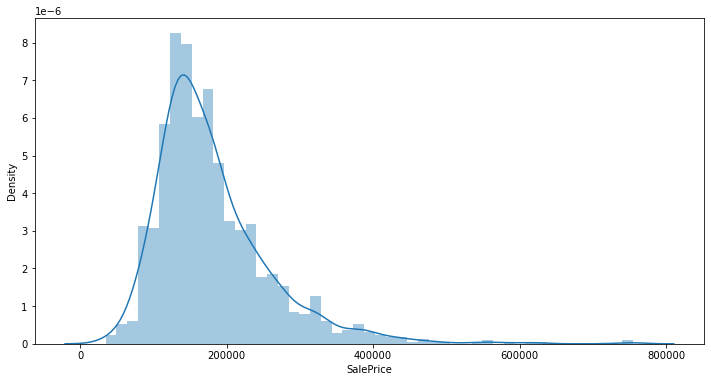

In [54]:
## Response Variable
plt.figure(figsize=(12,6))
sns.distplot(Y)
plt.show()

The response (target) variable is right skewed and hence needs data transformation. Lets try with logarithmic data transformation

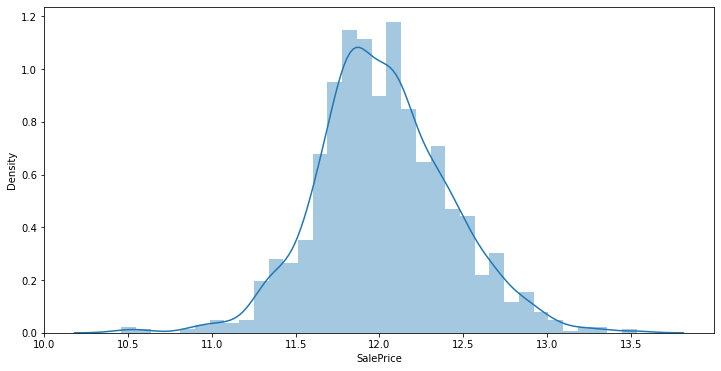

In [55]:
plt.figure(figsize=(12,6))
sns.distplot(np.log(Y))
plt.show()

Logarithmic data transformation seems to have solved the issue of skewness and has rendered into a normal distribution plot.

In [56]:
## Data Transformation for response variable SalePrice

Y =  np.log(Y)

In [57]:
Col_Num = (X.describe()).columns.to_list()

print("No of Numerical Coloums is {0}".format(len(Col_Num)))

No of Numerical Coloums is 113


In [58]:
X.head()

LotShape  LotConfig  BldgType  HouseStyle  MasVnrType  ExterQual  BsmtQual  \
1         3          5         1           4           1          4         4   
2         3          2         1           1           0          3         4   
3         2          5         1           4           1          4         4   
4         2          4         1           4           0          3         3   
5         2          2         1           4           1          4         4   

   BsmtExposure  BsmtFinType1  HeatingQC  KitchenQual  FireplaceQu  \
1             1             6          5            4           -1   
2             4             5          5            3            3   
3             2             6          5            4            3   
4             1             5          4            4            4   
5             3             6          5            4            3   

   GarageFinish  SaleCondition  MSSubClass  LotFrontage   LotArea  \
1             2              1    0.493460     0.295186 -0.141171   
2             2              1   -1.164269     0.660207  0.105609   
3             2              1    0.493460     0.369785  0.413721   
4             1              0    0.698191     0.168858  0.095490   
5             2              1    0.493460     0.754467  0.877127   

   OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
1     0.667499    -0.477387    1.230708    0.797537  -0.887576    -0.404029   
2    -0.042192     2.011352   -0.818452    1.011471  -0.434388     0.508177   
3     0.667499    -0.477387    1.193873    0.571325  -0.048083    -0.253787   
4     0.667499    -0.477387   -0.818452    0.142272   0.183337    -0.644806   
5     1.350924    -0.477387    1.333038    0.750541   0.077485     0.254387   

   1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  \
1 -0.799624  1.170239   0.528531      1.175573  0.797246  1.284128   
2  0.429151 -0.871454  -0.382755     -0.838866  0.797246 -0.773692   
3 -0.568533  1.172896   0.659112      1.175573  0.797246  1.284128   
4 -0.429428  1.146834   0.540797      1.175573 -1.025173 -0.773692   
5  0.124698  1.209630   1.282894      1.175573  0.797246  1.284128   

   BedroomAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  \
1      0.170752      0.946380   -1.027341    0.273835    0.383899   -0.950337   
2      0.170752     -0.234627    0.784005    0.273835   -0.004602    1.213714   
3      0.170752     -0.234627    0.784005    0.273835    0.641990   -0.950337   
4      0.170752      0.389921    0.784005    1.759713    0.786092   -0.950337   
5      1.382874      1.448615    0.784005    1.759713    1.583257    1.079695   

   OpenPorchSF  AgeBuilt  AgeRemodAdd  GarageAgeBlt   AgeSold  MSZoning_FV  \
1     0.841820 -1.173229    -0.880312     -1.125533 -0.156815            0   
2    -1.071307  0.090276     0.678691      0.330301  0.604462            0   
3     0.668453 -1.041283    -0.784480     -0.970775 -0.156815            0   
4     0.584540  1.526708     0.879959     -0.760447  1.385497            0   
5     0.991895 -0.979038    -0.608235     -0.898004 -0.156815            0   

   MSZoning_RH  MSZoning_RL  MSZoning_RM  Neighborhood_Blueste  \
1            0            1            0                     0   
2            0            1            0                     0   
3            0            1            0                     0   
4            0            1            0                     0   
5            0            1            0                     0   

   Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  \
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     0                     0   
5                    0                     0                     0   

   Neighbo

#### Splitting into train and test

In [59]:
# splitting the dataset into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=42)

In [60]:
X_train.shape

(1021, 113)

#### Scaling the data

In [61]:
scaler = MinMaxScaler()
X_train[Col_Num] = scaler.fit_transform(X_train[Col_Num])
X_test[Col_Num] = scaler.transform(X_test[Col_Num])

In [62]:
X_train.head()

LotShape  LotConfig  BldgType  HouseStyle  MasVnrType  ExterQual  \
136   1.000000       1.00      0.00    0.000000         1.0   0.333333   
1453  1.000000       1.00      0.75    1.000000         1.0   0.333333   
763   1.000000       1.00      0.00    0.428571         0.0   0.333333   
933   0.666667       0.75      0.00    0.000000         1.0   1.000000   
436   0.333333       0.50      0.00    0.428571         0.0   0.666667   

      BsmtQual  BsmtExposure  BsmtFinType1  HeatingQC  KitchenQual  \
136   0.666667           0.4      0.285714       0.75     0.333333   
1453  0.833333           1.0      1.000000       0.75     0.333333   
763   0.833333           0.6      1.000000       1.00     0.666667   
933   1.000000           0.4      0.285714       1.00     1.000000   
436   0.833333           0.8      1.000000       1.00     0.666667   

      FireplaceQu  GarageFinish  SaleCondition  MSSubClass  LotFrontage  \
136      0.833333          0.50            1.0    0.000000     0.357789   
1453     0.000000          1.00            1.0    0.981174     0.189843   
763      0.000000          0.50            1.0    0.546059     0.330222   
933      0.833333          1.00            1.0    0.000000     0.371304   
436      0.666667          0.75            1.0    0.546059     0.222540   

       LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  BsmtUnfSF  \
136   0.388016     0.713351     0.744179    0.904109    0.000000   0.753509   
1453  0.190772     0.503928     0.640175    0.793987    0.520037   0.000000   
763   0.352394     0.713351     0.640175    0.000000    0.175134   0.567842   
933   0.410255     0.907422     0.640175    0.907581    0.000000   0.905966   
436   0.392902     0.713351     0.744179    0.000000    0.467583   0.171283   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  \
136      0.318144  0.636338  0.000000   0.569677      0.000000  0.697628   
1453     0.166712  0.467065  0.000000   0.410310      0.744794  0.370222   
763      0.212140  0.335761  0.920111   0.540043      0.000000  0.697628   
933      0.421528  0.682067  0.000000   0.613802      0.000000  0.697628   
436      0.221054  0.366791  0.925612   0.565226      0.744794  0.697628   

      HalfBath  BedroomAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  \
136   0.000000      0.391152      0.594023     0.56685    0.438506   
1453  0.000000      0.264331      0.414934     0.00000    0.438506   
763   0.861729      0.391152      0.594023     0.00000    0.438506   
933   0.000000      0.391152      0.668544     0.56685    0.707025   
436   0.861729      0.391152      0.510383     0.56685    0.438506   

      GarageArea  WoodDeckSF  OpenPorchSF  AgeBuilt  AgeRemodAdd  \
136     0.448961    0.735906     0.000000  0.517874     0.836590   
1453    0.445507    0.000000     0.524817  0.109490     0.214613   
763     0.506119    0.806292     0.598337  0.024483     0.050254   
933     0.620110    0.000000     0.828561  0.089874     0.178010   
436     0.462716    0.797745     0.646116  0.253923     0.462569   

      GarageAgeBlt   AgeSold  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
136       0.589082  0.486247          0.0          0.0          1.0   
1453      0.127821  1.000000          0.0          0.0          0.0   
763       0.028754  0.000000          1.0          0.0          0.0   
933       0.105064  0.739832          0.0          0.0          1.0   
436       0.293582  0.239529          0.0          0.0          1.0   

      MSZoning_RM  Neighborhood_Blueste  Neighborhood_BrDale  \
136           0.0                   0.0                  0.0   
1453          1.0                   0.0                  0.0   
763           0.0                   0.0                  0.0   
933           0.0                   0.0                  0.0   
436           0.0                   0.0                  0.0   

      Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
136                    0.0               

#### Linear Regression

In [63]:
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [64]:
### Feature Selection using RFE
lm = LinearRegression()

rfe = RFE(lm,50)
rfe.fit(X_train,Y_train)

RFE(estimator=LinearRegression(), n_features_to_select=50)

In [65]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('LotShape', False, 33),
 ('LotConfig', False, 50),
 ('BldgType', True, 1),
 ('HouseStyle', False, 45),
 ('MasVnrType', False, 18),
 ('ExterQual', False, 44),
 ('BsmtQual', True, 1),
 ('BsmtExposure', True, 1),
 ('BsmtFinType1', False, 43),
 ('HeatingQC', True, 1),
 ('KitchenQual', True, 1),
 ('FireplaceQu', False, 56),
 ('GarageFinish', False, 47),
 ('SaleCondition', False, 25),
 ('MSSubClass', True, 1),
 ('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 17),
 ('BsmtFinSF1', True, 1),
 ('BsmtUnfSF', False, 57),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', False, 49),
 ('2ndFlrSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('FullBath', False, 15),
 ('HalfBath', False, 16),
 ('BedroomAbvGr', False, 21),
 ('TotRmsAbvGrd', False, 64),
 ('Fireplaces', True, 1),
 ('GarageCars', True, 1),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 53),
 ('OpenPorchSF', False, 55),
 ('AgeBuilt', True, 1),
 ('A

In [66]:
# Final variable selected using Recurssive Feature Elimination for modelling
Col_RFE = X_train.columns[rfe.support_]
Col_RFE

Index(['BldgType', 'BsmtQual', 'BsmtExposure', 'HeatingQC', 'KitchenQual',
       'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'BsmtFinSF1', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'Fireplaces', 'GarageCars', 'GarageArea', 'AgeBuilt', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_IDOTRR', 'Neighborhood_NAmes',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_StoneBr', 'Exterior1st_AsphShn',
       'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_Stone',
       'Exterior1st_Wd Sdng', 'Exterior2nd_AsphShn', 'Exterior2nd_ImStucc',
       'Exterior2nd_Other', 'Exterior2nd_Stone', 'Exterior2nd_Wd Sdng',
       'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood',
       'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn',
       'GarageType_Detchd', 

In [67]:
len(Col_RFE)

50

In [68]:
X_train = X_train[Col_RFE]
X_test = X_test[Col_RFE]

In [69]:
lm = LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

In [70]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

10.089713228932023
[-0.04253017  0.15791003  0.11144236  0.06834715  0.07696262 -0.06209516
 -0.04613682  0.37409535  0.4904441   0.44057495  0.10443425 -0.20841728
 -0.0577756   1.35460117  0.04232584  0.06905895  0.27462091 -0.05450114
 -0.28964773  0.30664149  0.1985852   0.21636964  0.18669903  0.10226097
 -0.06122461 -0.04319028 -0.03659429 -0.03776192  0.12624714  0.12700108
 -0.05492807  0.19949373 -0.14460119 -0.22918666  0.10764889  0.08139667
 -0.04941241  0.09494872  0.09028285 -0.11595309 -0.11566219  0.04885226
  0.04027375  0.03732467 -0.11776362  0.10550458  0.09151175  0.08368847
  0.09975292  0.06368843]


In [71]:
Y_pred_train = lm.predict(X_train)
Y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(Y_train, Y_pred_train)
print('R2 for Train Data is',r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(Y_test, Y_pred_test)
print('R2 for Test Data is',r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(Y_train - Y_pred_train))
print('RSS for Train Data is',rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(Y_test - Y_pred_test))
print('RSS for Test Data is',rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(Y_train, Y_pred_train)
print('MSE for Train Data is',mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(Y_test, Y_pred_test)
print('MSE for Test Data is',mse_test_lr)
metric.append(mse_test_lr**0.5)

R2 for Train Data is 0.9047720896687036
R2 for Test Data is 0.912179978408017
RSS for Train Data is 15.085465831471243
RSS for Test Data is 6.525468484265861
MSE for Train Data is 0.014775186906436085
MSE for Test Data is 0.014898329872753108


This was the linear regression model without regularization.

Now let's apply the regularization techniques and evaluate further.

#### Ridge Regression

Let us first start with finding the optimal alpha by using GridSearchCV

In [72]:
# list of alphas to tune - if value too high it will lead to underfitting. If it is too low,it will not handle the overfitting

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = KFold(n_splits=10,shuffle=True,random_state=42)

model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, Y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    1.4s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [73]:
model_cv_results_ridge = pd.DataFrame(model_cv.cv_results_)
model_cv_results_ridge['param_alpha'] = model_cv_results_ridge['param_alpha'].astype('float32')
model_cv_results_ridge.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0       0.002480      0.000488         0.001396        0.000489       0.0001   
1       0.002592      0.000490         0.001396        0.000485       0.0010   
2       0.001994      0.000001         0.001396        0.000489       0.0100   
3       0.002194      0.000598         0.001396        0.000489       0.0500   
4       0.002593      0.000662         0.001696        0.000639       0.1000   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.087672          -0.084446          -0.079091   
1   {'alpha': 0.001}          -0.087670          -0.084438          -0.079087   
2    {'alpha': 0.01}          -0.087652          -0.084366          -0.079046   
3    {'alpha': 0.05}          -0.087592          -0.084065          -0.078896   
4     {'alpha': 0.1}          -0.087532          -0.083736          -0.078815   

   split3_test_score  split4_test_score  split5_test_score  split6_test_score  \
0          -0.083444          -0.105835          -0.079633          -0.085573   
1          -0.083437          -0.105823          -0.079629          -0.085573   
2          -0.083370          -0.105704          -0.079586          -0.085574   
3          -0.083227          -0.105201          -0.079407          -0.085568   
4          -0.083098          -0.104623          -0.079207          -0.085556   

   split7_test_score  split8_test_score  split9_test_score  mean_test_score  \
0          -0.097228          -0.094366          -0.086900        -0.088419   
1          -0.097216          -0.094367          -0.086898        -0.088414   
2          -0.097100          -0.094386          -0.086870        -0.088365   
3          -0.096612          -0.094467          -0.086758        -0.088179   
4          -0.096057          -0.094568          -0.086670        -0.087986   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.007950               14           -0.083251           -0.083908   
1        0.007948               13           -0.083249           -0.083905   
2        0.007928               12           -0.083233           -0.083878   
3        0.007837               11           -0.083170           -0.083763   
4        0.007722               10           -0.083112           -0.083649   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.084068           -0.083338           -0.080969   
1           -0.084067           -0.083336           -0.080966   
2           -0.084049           -0.083315           -0.080945   
3           -0.083976           -0.083239           -0.080884   
4           -0.083904           -0.083162           -0.080837   

   split5_train_score  split6_train_score  split7_train_score  \
0           -0.081054           -0.083122           -0.081382   
1           -0.081054           -0.083120           -0.081379   
2           -0.081052           -0.083097           -0.081355   
3           -0.081051           -0.083015           -0.081254   
4           -0.081054           -0.082937           -0.081155   

   split8_train_score  split9_train_score  mean_train_score  std_train_score  
0           -0.082687           -0.082790         -0.082657         0.001080  
1           -0.082685           -0.082788         -0.082655         0.001079  
2           -0.082669           -0.082772         -0.082636         0.001077  
3           -0.082610           -0.082705         -0.082567         0.001063  
4           -0.082562           -0.082637         -0.082501         0.001048

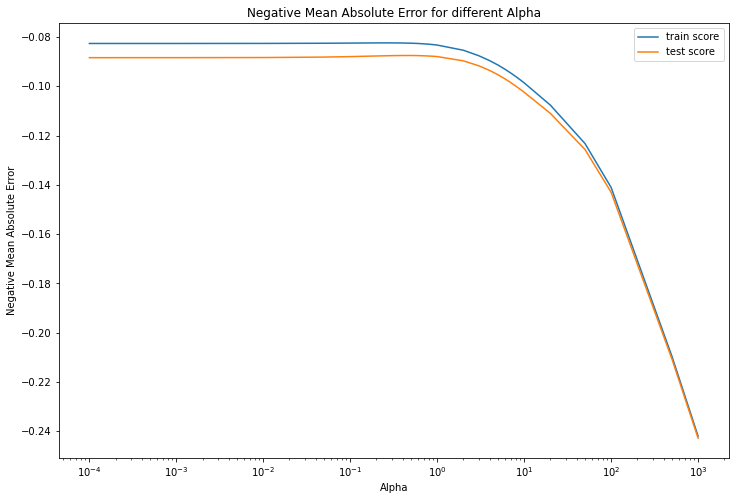

In [74]:
plt.figure(figsize=(12,8))
plt.plot(model_cv_results_ridge['param_alpha'],model_cv_results_ridge['mean_train_score'])
plt.plot(model_cv_results_ridge['param_alpha'],model_cv_results_ridge['mean_test_score'])
plt.ylabel('Negative Mean Absolute Error')
plt.xlabel('Alpha')
plt.xscale('log')
plt.legend(['train score', 'test score'])
plt.title('Negative Mean Absolute Error for different Alpha')
plt.show()

In [75]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.5}


In [76]:
#Fitting Ridge model for alpha = 0.5 and printing coefficients which have been penalised
alpha = 0.5
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, Y_train)
print(ridge.coef_)

[-0.04419656  0.13462025  0.10882294  0.07380764  0.09149    -0.0571069
 -0.04086329  0.36499471  0.49850677  0.42023428  0.09782958 -0.02679872
 -0.02207355  1.13759403  0.04310522  0.07770053  0.26901873 -0.01621683
 -0.27400482  0.22093184  0.1162415   0.13633024  0.10400114  0.10665099
 -0.06253626 -0.05670234 -0.03709106 -0.03083958  0.12761217  0.12262717
 -0.05554281  0.19127387 -0.02149335 -0.18406898  0.11011141  0.04158964
 -0.04630677  0.05154117  0.0803301  -0.06892127 -0.08127247  0.04720936
  0.05990682  0.04294857 -0.09247755  0.0955639   0.08708364  0.08024597
  0.08374625  0.05506858]


In [77]:
# Calculating cost metrics
Y_pred_train = ridge.predict(X_train)
Y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(Y_train, Y_pred_train)
print('R2 for Train Data is',r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(Y_test, Y_pred_test)
print('R2 for Test Data is',r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(Y_train - Y_pred_train))
print('RSS for Train Data is',rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(Y_test - Y_pred_test))
print('RSS for Test Data is',rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(Y_train, Y_pred_train)
print('MSE for Train Data is',mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(Y_test, Y_pred_test)
print('MSE for Test Data is',mse_test_lr)
metric2.append(mse_test_lr**0.5)

R2 for Train Data is 0.903687534228621
R2 for Test Data is 0.909793556891009
RSS for Train Data is 15.257274957354422
RSS for Test Data is 6.7027915834534255
MSE for Train Data is 0.014943462250102275
MSE for Test Data is 0.015303177131172204


In [78]:
ridge.coef_

array([-0.04419656,  0.13462025,  0.10882294,  0.07380764,  0.09149   ,
       -0.0571069 , -0.04086329,  0.36499471,  0.49850677,  0.42023428,
        0.09782958, -0.02679872, -0.02207355,  1.13759403,  0.04310522,
        0.07770053,  0.26901873, -0.01621683, -0.27400482,  0.22093184,
        0.1162415 ,  0.13633024,  0.10400114,  0.10665099, -0.06253626,
       -0.05670234, -0.03709106, -0.03083958,  0.12761217,  0.12262717,
       -0.05554281,  0.19127387, -0.02149335, -0.18406898,  0.11011141,
        0.04158964, -0.04630677,  0.05154117,  0.0803301 , -0.06892127,
       -0.08127247,  0.04720936,  0.05990682,  0.04294857, -0.09247755,
        0.0955639 ,  0.08708364,  0.08024597,  0.08374625,  0.05506858])

#### The top 10 features based on Ridge regression

In [79]:
Top10_Ridge  = {'Features':X_train.columns,'Coefficient':ridge.coef_}

ridge_coef = pd.DataFrame(Top10_Ridge)

ridge_coef.sort_values(by='Coefficient',ascending=False).head(10)

Features  Coefficient
13             GrLivArea     1.137594
8            OverallQual     0.498507
9            OverallCond     0.420234
7                LotArea     0.364995
16            GarageCars     0.269019
19           MSZoning_FV     0.220932
31  Neighborhood_StoneBr     0.191274
21           MSZoning_RL     0.136330
1               BsmtQual     0.134620
28  Neighborhood_NoRidge     0.127612

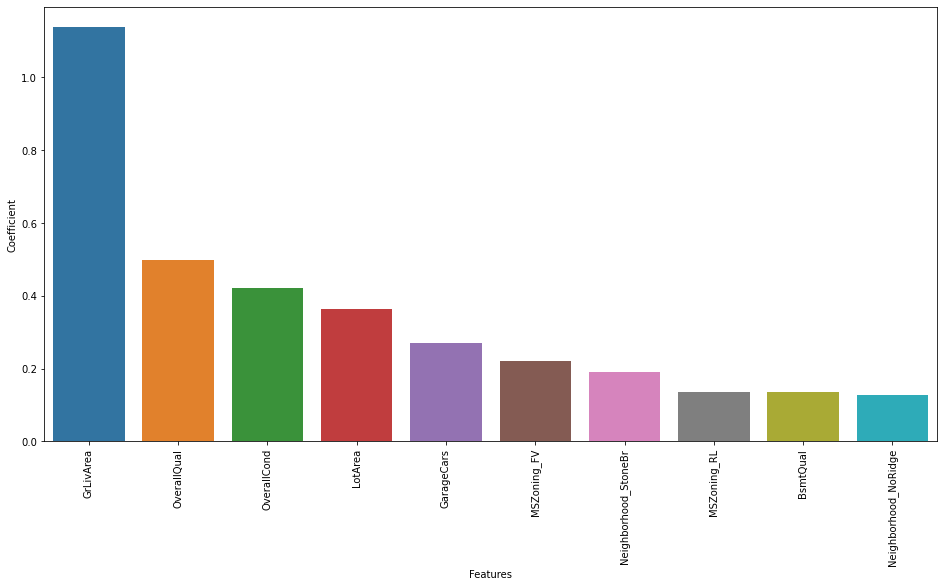

In [80]:
plt.figure(figsize=(16,8))
sns.barplot(x=ridge_coef.sort_values(by='Coefficient',ascending=False).head(10)['Features'],
            y=ridge_coef.sort_values(by='Coefficient',ascending=False).head(10)['Coefficient'])
plt.xticks(rotation=90)
plt.show()

#### Lasso Regression

In [81]:
lasso = Lasso()

# cross validation
folds = KFold(n_splits=10,shuffle=True,random_state=42)

model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, Y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    1.4s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [82]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [83]:
#Fitting lasso model for alpha = 0.0001 and printing coefficients which have been penalised

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, Y_train) 

Lasso(alpha=0.0001)

In [84]:
lasso.coef_

array([-0.04540319,  0.13124516,  0.10877845,  0.06654427,  0.08285367,
       -0.05649364, -0.04237526,  0.35125319,  0.49838052,  0.44362119,
        0.09856755, -0.10407807, -0.0444529 ,  1.28398813,  0.04306865,
        0.07161445,  0.2456731 , -0.01813082, -0.29274513,  0.19505457,
        0.0800644 ,  0.11049881,  0.08054004,  0.10046552, -0.05922227,
       -0.05645834, -0.03594368, -0.03394809,  0.12316258,  0.12228597,
       -0.05592428,  0.18596703, -0.        , -0.17388453,  0.10590037,
        0.        , -0.04116708,  0.        ,  0.06599958, -0.        ,
       -0.04276531,  0.04202277,  0.03369837,  0.01909142, -0.07576064,
        0.06353712,  0.04292103,  0.04525438,  0.05513651,  0.01847265])

In [85]:
# Calculation of cost metrics

Y_pred_train = lasso.predict(X_train)
Y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(Y_train, Y_pred_train)
print('R2 for Train Data is',r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(Y_test, Y_pred_test)
print('R2 for Test Data is',r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(Y_train - Y_pred_train))
print('RSS for Train Data is',rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(Y_test - Y_pred_test))
print('RSS for Test Data is',rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(Y_train, Y_pred_train)
print('MSE for Train Data is',mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(Y_test, Y_pred_test)
print('MSE for Test Data is',mse_test_lr)
metric3.append(mse_test_lr**0.5)

R2 for Train Data is 0.9038435033826173
R2 for Test Data is 0.910477400860845
RSS for Train Data is 15.232567207964685
RSS for Test Data is 6.651978543415099
MSE for Train Data is 0.014919262691444354
MSE for Test Data is 0.015187165624235386


In [86]:
model_cv_results_lasso = pd.DataFrame(model_cv.cv_results_)
model_cv_results_lasso['param_alpha'] = model_cv_results_lasso['param_alpha'].astype('float32')
model_cv_results_lasso.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0       0.006881      0.000828         0.001496        0.000499       0.0001   
1       0.002594      0.000489         0.001396        0.000486       0.0010   
2       0.002493      0.000670         0.001507        0.000511       0.0100   
3       0.002792      0.000398         0.001695        0.000457       0.0500   
4       0.002297      0.000461         0.001496        0.000498       0.1000   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.086033          -0.082741          -0.079976   
1   {'alpha': 0.001}          -0.089735          -0.084430          -0.080168   
2    {'alpha': 0.01}          -0.132013          -0.137602          -0.115505   
3    {'alpha': 0.05}          -0.264333          -0.278755          -0.240794   
4     {'alpha': 0.1}          -0.302465          -0.315910          -0.280643   

   split3_test_score  split4_test_score  split5_test_score  split6_test_score  \
0          -0.083685          -0.103901          -0.079422          -0.085884   
1          -0.086011          -0.096877          -0.081828          -0.086532   
2          -0.131516          -0.125829          -0.112446          -0.116886   
3          -0.269676          -0.281641          -0.257330          -0.211406   
4          -0.317761          -0.324741          -0.291635          -0.254581   

   split7_test_score  split8_test_score  split9_test_score  mean_test_score  \
0          -0.094842          -0.094519          -0.086524        -0.087753   
1          -0.094064          -0.093566          -0.092665        -0.088588   
2          -0.124529          -0.146708          -0.149983        -0.129302   
3          -0.240240          -0.322725          -0.308316        -0.267522   
4          -0.279927          -0.354787          -0.346108        -0.306856   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.007323                1           -0.083182           -0.083802   
1        0.005350                2           -0.085344           -0.085917   
2        0.012146                3           -0.127737           -0.127393   
3        0.031247                4           -0.264362           -0.265356   
4        0.029589                5           -0.306938           -0.305575   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.083855           -0.083020           -0.081037   
1           -0.085881           -0.085674           -0.084256   
2           -0.127859           -0.127460           -0.127259   
3           -0.267705           -0.267186           -0.266868   
4           -0.309524           -0.305493           -0.304795   

   split5_train_score  split6_train_score  split7_train_score  \
0           -0.081629           -0.082808           -0.081256   
1           -0.084719           -0.085440           -0.084176   
2           -0.126072           -0.126515           -0.125506   
3           -0.265185           -0.266549           -0.266612   
4           -0.308039           -0.312376           -0.309459   

   split8_train_score  split9_train_score  mean_train_score  std_train_score  
0           -0.082680           -0.082581         -0.082585         0.000937  
1           -0.085466           -0.085366         -0.085224         0.000595  
2           -0.128950           -0.126207         -0.127096         0.000969  
3           -0.266054           -0.265490         -0.266137         0.000979  
4           -0.300942           -0.301964         -0.306510         0.003335

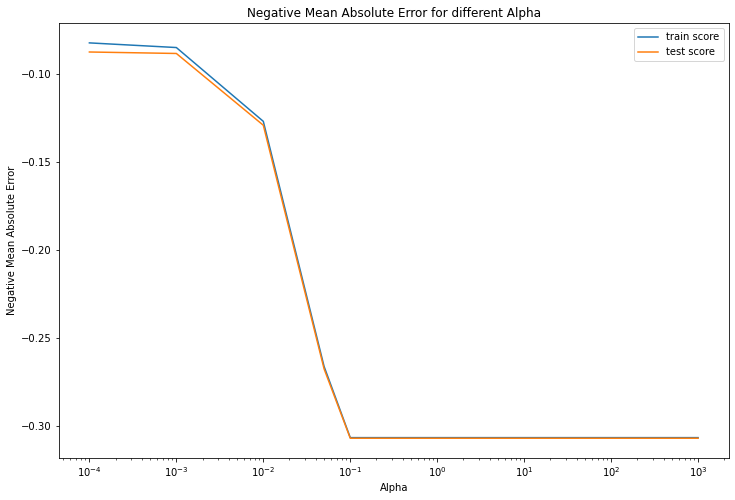

In [87]:
plt.figure(figsize=(12,8))
plt.plot(model_cv_results_lasso['param_alpha'],model_cv_results_lasso['mean_train_score'])
plt.plot(model_cv_results_lasso['param_alpha'],model_cv_results_lasso['mean_test_score'])
plt.ylabel('Negative Mean Absolute Error')
plt.xlabel('Alpha')
plt.xscale('log')
plt.legend(['train score', 'test score'])
plt.title('Negative Mean Absolute Error for different Alpha')
plt.show()

#### Top 10 features-Lasso Regression

In [88]:
Top10_Lasso = {'Features':X_train.columns,'Coefficient':lasso.coef_}

lasso_coef = pd.DataFrame(Top10_Lasso)

lasso_coef.sort_values(by='Coefficient',ascending=False).head(10)

Features  Coefficient
13             GrLivArea     1.283988
8            OverallQual     0.498381
9            OverallCond     0.443621
7                LotArea     0.351253
16            GarageCars     0.245673
19           MSZoning_FV     0.195055
31  Neighborhood_StoneBr     0.185967
1               BsmtQual     0.131245
28  Neighborhood_NoRidge     0.123163
29  Neighborhood_NridgHt     0.122286

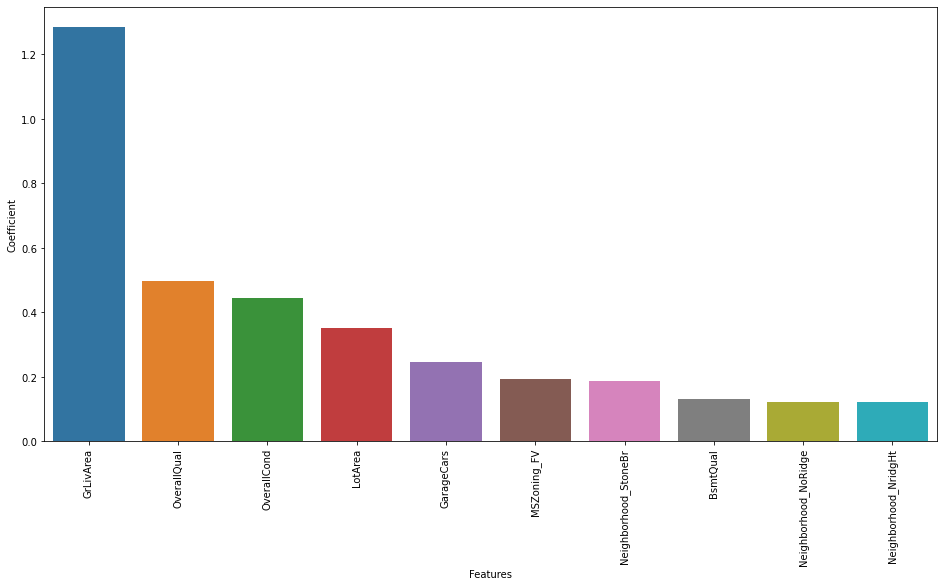

In [89]:
plt.figure(figsize=(16,8))
sns.barplot(x=lasso_coef.sort_values(by='Coefficient',ascending=False).head(10)['Features'],
            y=lasso_coef.sort_values(by='Coefficient',ascending=False).head(10)['Coefficient'])
plt.xticks(rotation=90)
plt.show()

In [90]:
# Creating a table which contain all the metrics

linear_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear': metric
        }

linear_metric = pd.DataFrame(linear_table ,columns = ['Metric', 'Linear'] )

ridge_metric = pd.Series(metric2, name = 'Ridge')
lasso_metric = pd.Series(metric3, name = 'Lasso')

final_metric = pd.concat([linear_metric, ridge_metric, lasso_metric], axis = 1)

final_metric

Metric     Linear      Ridge      Lasso
0  R2 Score (Train)   0.904772   0.903688   0.903844
1   R2 Score (Test)   0.912180   0.909794   0.910477
2       RSS (Train)  15.085466  15.257275  15.232567
3        RSS (Test)   6.525468   6.702792   6.651979
4       MSE (Train)   0.121553   0.122243   0.122144
5        MSE (Test)   0.122059   0.123706   0.123236

#### Regularization Effect on the Coefficients

In [91]:
BETAS = pd.DataFrame(index=X_train.columns)
BETAS.rows = X_train.columns
BETAS['Linear'] = lm.coef_
BETAS['Ridge'] = ridge.coef_
BETAS['Lasso'] = lasso.coef_
BETAS.head(50)

Linear     Ridge     Lasso
BldgType             -0.042530 -0.044197 -0.045403
BsmtQual              0.157910  0.134620  0.131245
BsmtExposure          0.111442  0.108823  0.108778
HeatingQC             0.068347  0.073808  0.066544
KitchenQual           0.076963  0.091490  0.082854
MSSubClass           -0.062095 -0.057107 -0.056494
LotFrontage          -0.046137 -0.040863 -0.042375
LotArea               0.374095  0.364995  0.351253
OverallQual           0.490444  0.498507  0.498381
OverallCond           0.440575  0.420234  0.443621
BsmtFinSF1            0.104434  0.097830  0.098568
TotalBsmtSF          -0.208417 -0.026799 -0.104078
2ndFlrSF             -0.057776 -0.022074 -0.044453
GrLivArea             1.354601  1.137594  1.283988
BsmtFullBath          0.042326  0.043105  0.043069
Fireplaces            0.069059  0.077701  0.071614
GarageCars            0.274621  0.269019  0.245673
GarageArea           -0.054501 -0.016217 -0.018131
AgeBuilt             -0.289648 -0.274005 -0.292745
MSZoning_FV           0.306641  0.220932  0.195055
MSZoning_RH           0.198585  0.116241  0.080064
MSZoning_RL           0.216370  0.136330  0.110499
MSZoning_RM           0.186699  0.104001  0.080540
Neighborhood_Crawfor  0.102261  0.106651  0.100466
Neighborhood_Edwards -0.061225 -0.062536 -0.059222
Neighborhood_IDOTRR  -0.043190 -0.056702 -0.056458
Neighborhood_NAmes   -0.036594 -0.037091 -0.035944
Neighborhood_NWAmes  -0.037762 -0.030840 -0.033948
Neighborhood_NoRidge  0.126247  0.127612  0.123163
Neighborhood_NridgHt  0.127001  0.122627  0.122286
Neighborhood_OldTown -0.054928 -0.055543 -0.055924
Neighborhood_StoneBr  0.199494  0.191274  0.185967
Exterior1st_AsphShn  -0.144601 -0.021493 -0.000000
Exterior1st_BrkComm  -0.229187 -0.184069 -0.173885
Exterior1st_BrkFace   0.107649  0.110111  0.105900
Exterior1st_Stone     0.081397  0.041590  0.000000
Exterior1st_Wd Sdng  -0.049412 -0.046307 -0.041167
Exterior2nd_AsphShn   0.094949  0.051541  0.000000
Exterior2nd_ImStucc   0.090283  0.080330  0.066000
Exterior2nd_Other    -0.115953 -0.068921 -0.000000
Exterior2nd_Stone    -0.115662 -0.081272 -0.042765
Exterior2nd_Wd Sdng   0.048852  0.047209  0.042023
Foundation_Slab       0.040274  0.059907  0.033698
Foundation_Stone      0.037325  0.042949  0.019091
Foundation_Wood      -0.117764 -0.092478 -0.075761
GarageType_Attchd     0.105505  0.095564  0.063537
GarageType_Basment    0.091512  0.087084  0.042921
GarageType_BuiltIn    0.083688  0.080246  0.045254
GarageType_Detchd     0.099753  0.083746  0.055137
GarageType_None       0.063688  0.055069  0.018473

<h3>
<font color=Green>Model Evaluation and Final Interpretation</font>
</h3>

In [92]:
ridge_coef.sort_values(by='Coefficient',ascending=False).head(5)

Features  Coefficient
13    GrLivArea     1.137594
8   OverallQual     0.498507
9   OverallCond     0.420234
7       LotArea     0.364995
16   GarageCars     0.269019

In [93]:
lasso_coef.sort_values(by='Coefficient',ascending=False).head(5)

Features  Coefficient
13    GrLivArea     1.283988
8   OverallQual     0.498381
9   OverallCond     0.443621
7       LotArea     0.351253
16   GarageCars     0.245673

#### Final Inference

1) Price increases with GrLivArea (Above Grade Living area).

2) Price shows an increasing trend with OverallQual, which is basically the assigned rating of the property absed on the overall material and finishing of the house. 

3) Larger the LotArea (Lot size), higher the price.

4) Price is directly proprotional to the 'OverallCond' feature, which basically rates the overall condition of the house.

5) Price exhibits a positive correlation with GarageCars (Size of the garage in car capacity).

#### Some additional insights on model evaluation

Changes in the model after the "alpha" in ridge and lasso is doubled

In [94]:
## Ridge Regression Model with optimal  value of alpha ~0.5

alpha = 0.5
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, Y_train)
print(ridge.coef_)

# Lets calculate some metrics such as R2 score
Y_pred_train = ridge.predict(X_train)
Y_pred_test = ridge.predict(X_test)

r2_train_linear = r2_score(Y_train, Y_pred_train)
print('Train Data R2:',round(r2_train_linear,3))
r2_test_linear = r2_score(Y_test, Y_pred_test)
print('Test Data R2:',round(r2_test_linear,3))

n, p = X_train.shape
adjusted_r2 = 1 - (1-r2_train_linear)*(n-1)/(n-p-1)
print("Adjusted R2:", round(r2_train_linear, 3))

[-0.04419656  0.13462025  0.10882294  0.07380764  0.09149    -0.0571069
 -0.04086329  0.36499471  0.49850677  0.42023428  0.09782958 -0.02679872
 -0.02207355  1.13759403  0.04310522  0.07770053  0.26901873 -0.01621683
 -0.27400482  0.22093184  0.1162415   0.13633024  0.10400114  0.10665099
 -0.06253626 -0.05670234 -0.03709106 -0.03083958  0.12761217  0.12262717
 -0.05554281  0.19127387 -0.02149335 -0.18406898  0.11011141  0.04158964
 -0.04630677  0.05154117  0.0803301  -0.06892127 -0.08127247  0.04720936
  0.05990682  0.04294857 -0.09247755  0.0955639   0.08708364  0.08024597
  0.08374625  0.05506858]
Train Data R2: 0.904
Test Data R2: 0.91
Adjusted R2: 0.904


In [95]:
## Ridge Regression Model with optimal  value of alpha ~1 (doubled)

alpha = 1
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, Y_train)
print(ridge.coef_)

# Lets calculate some metrics such as R2 score
Y_pred_train = ridge.predict(X_train)
Y_pred_test = ridge.predict(X_test)

r2_train_linear = r2_score(Y_train, Y_pred_train)
print('Train Data R2:',round(r2_train_linear,3))
r2_test_linear = r2_score(Y_test, Y_pred_test)
print('Test Data R2:',round(r2_test_linear,3))

n, p = X_train.shape
adjusted_r2 = 1 - (1-r2_train_linear)*(n-1)/(n-p-1)
print("Adjusted R2:", round(r2_train_linear, 3))

[-0.04485698  0.12447388  0.10815247  0.07834933  0.10349391 -0.05484403
 -0.03531282  0.35304683  0.4992798   0.3983248   0.09442431  0.05578654
 -0.00153399  1.00620918  0.0435704   0.08487003  0.26287224  0.01361368
 -0.26144161  0.181582    0.08022484  0.1016089   0.06613361  0.10910064
 -0.06303585 -0.06233698 -0.03779095 -0.02600404  0.1287183   0.11984585
 -0.05482412  0.18518049  0.00614063 -0.154779    0.1121233   0.02625616
 -0.04460216  0.04515824  0.07323904 -0.04669271 -0.06376828  0.04616798
  0.06579673  0.04485642 -0.07545205  0.08656281  0.07852271  0.07414574
  0.07038729  0.04727149]
Train Data R2: 0.902
Test Data R2: 0.907
Adjusted R2: 0.902


In [96]:
Top10_Ridge  = {'Features':X_train.columns,'Coefficient':ridge.coef_}

ridge_coef = pd.DataFrame(Top10_Ridge)

ridge_coef.sort_values(by='Coefficient',ascending=False).head(10)

Features  Coefficient
13             GrLivArea     1.006209
8            OverallQual     0.499280
9            OverallCond     0.398325
7                LotArea     0.353047
16            GarageCars     0.262872
31  Neighborhood_StoneBr     0.185180
19           MSZoning_FV     0.181582
28  Neighborhood_NoRidge     0.128718
1               BsmtQual     0.124474
29  Neighborhood_NridgHt     0.119846

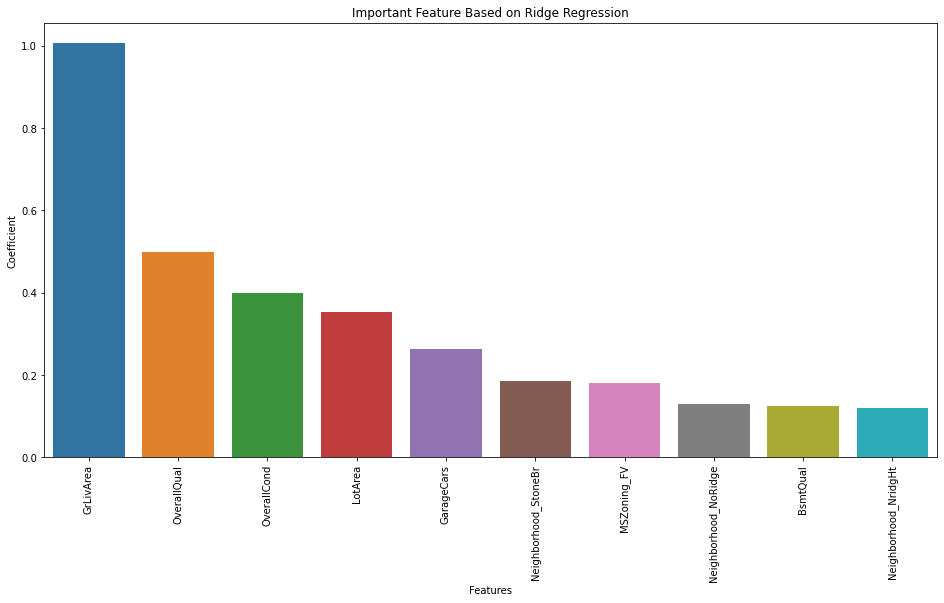

In [97]:
plt.figure(figsize=(16,8))
sns.barplot(x=ridge_coef.sort_values(by='Coefficient',ascending=False).head(10)['Features'],
            y=ridge_coef.sort_values(by='Coefficient',ascending=False).head(10)['Coefficient'])
plt.xticks(rotation=90)
plt.title('Important Feature Based on Ridge Regression')
plt.show()

In [98]:
## Lasso Regression Model with optimal  value of alpha ~0.0001

alpha = 0.0001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, Y_train)
print(lasso.coef_)

# Lets calculate some metrics such as R2 score
Y_pred_train = lasso.predict(X_train)
Y_pred_test = lasso.predict(X_test)

r2_train_linear = r2_score(Y_train, Y_pred_train)
print('Train Data R2:',round(r2_train_linear,3))
r2_test_linear = r2_score(Y_test, Y_pred_test)
print('Test Data R2:',round(r2_test_linear,3))

n, p = X_train.shape
adjusted_r2 = 1 - (1-r2_train_linear)*(n-1)/(n-p-1)
print("Adjusted R2:", round(r2_train_linear, 3))

[-0.04540319  0.13124516  0.10877845  0.06654427  0.08285367 -0.05649364
 -0.04237526  0.35125319  0.49838052  0.44362119  0.09856755 -0.10407807
 -0.0444529   1.28398813  0.04306865  0.07161445  0.2456731  -0.01813082
 -0.29274513  0.19505457  0.0800644   0.11049881  0.08054004  0.10046552
 -0.05922227 -0.05645834 -0.03594368 -0.03394809  0.12316258  0.12228597
 -0.05592428  0.18596703 -0.         -0.17388453  0.10590037  0.
 -0.04116708  0.          0.06599958 -0.         -0.04276531  0.04202277
  0.03369837  0.01909142 -0.07576064  0.06353712  0.04292103  0.04525438
  0.05513651  0.01847265]
Train Data R2: 0.904
Test Data R2: 0.91
Adjusted R2: 0.904


In [99]:
## Lasso Regression Model with optimal  value of alpha ~0.0002 (Doubled)

alpha = 0.0002
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, Y_train)
print(lasso.coef_)

# Lets calculate some metrics such as R2 score
Y_pred_train = lasso.predict(X_train)
Y_pred_test = lasso.predict(X_test)

r2_train_linear = r2_score(Y_train, Y_pred_train)
print('Train Data R2:',round(r2_train_linear,3))
r2_test_linear = r2_score(Y_test, Y_pred_test)
print('Test Data R2:',round(r2_test_linear,3))

n, p = X_train.shape
adjusted_r2 = 1 - (1-r2_train_linear)*(n-1)/(n-p-1)
print("Adjusted R2:", round(r2_train_linear, 3))

[-4.73163778e-02  9.97589005e-02  1.06338750e-01  6.50335756e-02
  8.66893099e-02 -5.15402642e-02 -3.84599204e-02  3.29235852e-01
  5.03593152e-01  4.45182183e-01  9.28486147e-02 -0.00000000e+00
 -3.13631449e-02  1.21928208e+00  4.47774654e-02  7.45544292e-02
  2.37548611e-01 -0.00000000e+00 -2.97168160e-01  1.12393340e-01
  0.00000000e+00  3.30423826e-02  8.49200084e-04  9.81597518e-02
 -5.78345287e-02 -6.30638384e-02 -3.52859107e-02 -3.02915762e-02
  1.18643436e-01  1.17669235e-01 -5.48761106e-02  1.78171224e-01
 -0.00000000e+00 -1.18122087e-01  1.05541111e-01 -0.00000000e+00
 -3.31426353e-02  0.00000000e+00  4.20004950e-02 -0.00000000e+00
 -0.00000000e+00  3.53341417e-02  2.41788330e-02  6.59555954e-04
 -3.38797890e-02  4.23154447e-02  1.63557125e-02  2.54936255e-02
  3.20349316e-02 -0.00000000e+00]
Train Data R2: 0.902
Test Data R2: 0.908
Adjusted R2: 0.902


In [100]:
Top10_Lasso  = {'Features':X_train.columns,'Coefficient':lasso.coef_}

lasso_coef = pd.DataFrame(Top10_Lasso)

lasso_coef.sort_values(by='Coefficient',ascending=False).head(10)

Features  Coefficient
13             GrLivArea     1.219282
8            OverallQual     0.503593
9            OverallCond     0.445182
7                LotArea     0.329236
16            GarageCars     0.237549
31  Neighborhood_StoneBr     0.178171
28  Neighborhood_NoRidge     0.118643
29  Neighborhood_NridgHt     0.117669
19           MSZoning_FV     0.112393
2           BsmtExposure     0.106339

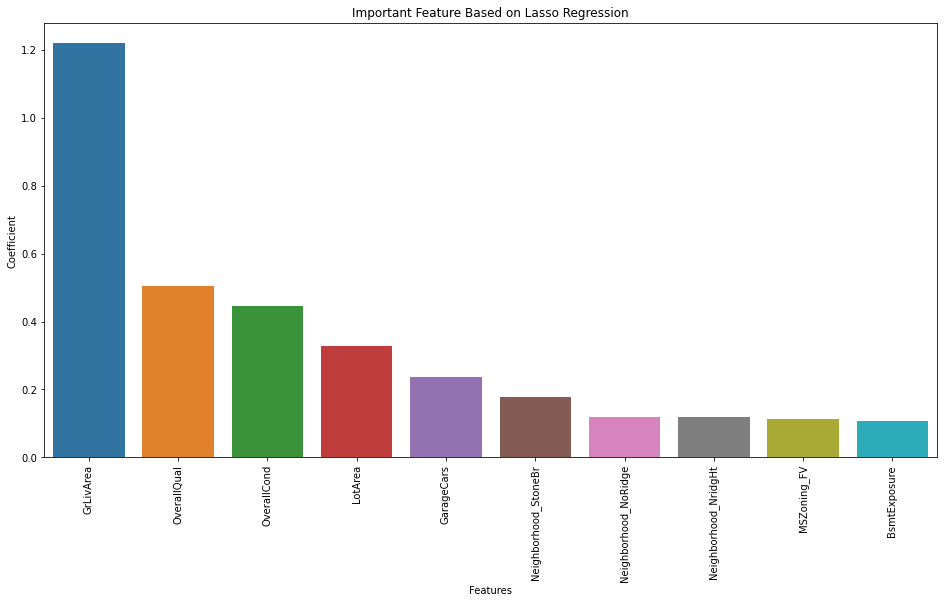

In [101]:
plt.figure(figsize=(16,8))
sns.barplot(x=lasso_coef.sort_values(by='Coefficient',ascending=False).head(10)['Features'],
            y=lasso_coef.sort_values(by='Coefficient',ascending=False).head(10)['Coefficient'])
plt.xticks(rotation=90)
plt.title('Important Feature Based on Lasso Regression')
plt.show()

Evaluating the Lasso regression model changes, when the most important 5 features (as shown above) have been excluded.

In [102]:
Top5_Lasso = lasso_coef.sort_values(by='Coefficient',ascending=False).head(5).Features
Top5_Lasso = Top5_Lasso.to_list()
Top5_Lasso

['GrLivArea', 'OverallQual', 'OverallCond', 'LotArea', 'GarageCars']

In [103]:
## Excluding the most imp 5 features 
X_train_up = X_train.drop(Top5_Lasso, axis=1)
X_test_up = X_test.drop(Top5_Lasso, axis=1)

In [104]:
## Optimum alpha value-lasso regression
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

folds = KFold(n_splits=10,shuffle=True,random_state=42)

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_up, Y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    1.7s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [105]:
model_cv.best_params_

{'alpha': 0.0001}

In [106]:
alpha = 0.0001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train_up, Y_train)

# Lets calculate some metrics such as R2 score

Y_pred_train = lasso.predict(X_train_up)
Y_pred_test = lasso.predict(X_test_up)

r2_train_linear = r2_score(Y_train, Y_pred_train)
print('R2 for Train Data is',r2_train_linear)
r2_test_linear = r2_score(Y_test, Y_pred_test)
print('R2 for Test Data is',r2_test_linear)

R2 for Train Data is 0.82860761254215
R2 for Test Data is 0.8485720577247837


In [107]:
#the top 5 coeffecient after dropping the previous top 5 coeffecient 
Lasso_top5_new  = {'Features':X_train_up.columns,'Coefficient':lasso.coef_}

lasso_coef_new = pd.DataFrame(Lasso_top5_new)

lasso_coef_new.sort_values(by='Coefficient',ascending=False).head(5)

Features  Coefficient
8           TotalBsmtSF     1.048010
12           GarageArea     0.463287
27  Exterior1st_AsphShn     0.375060
4           KitchenQual     0.266902
14          MSZoning_FV     0.263987

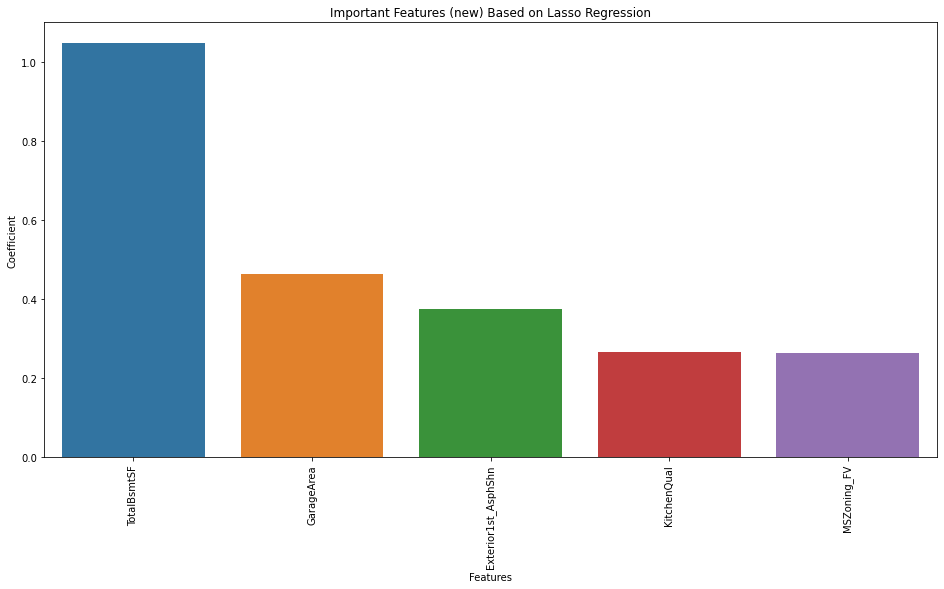

In [108]:
## Plotting the above mentioned 5 features (new).
plt.figure(figsize=(16,8))
sns.barplot(x=lasso_coef_new.sort_values(by='Coefficient',ascending=False).head(5)['Features'],
            y=lasso_coef_new.sort_values(by='Coefficient',ascending=False).head(5)['Coefficient'])
plt.xticks(rotation=90)
plt.title('Important Features (new) Based on Lasso Regression')
plt.show()

#### Comments

- Doubling the alpha for both Ridge and Lasso model caused reduction in the magnitude of the coefficients.Increasing alpha would mean increase in regularization. This means, increase in alpha value increases the bias and reduces the variance. It is seen that there is a very trivial drop in R2 value after doubling.

- The new set of top 5 features after excluding the original top 5 features from Lasso regression model, are 'TotalBsmtSF', 'GarageArea', 'Exterior1st_AsphShn', 'KitchenQual' and 'MSZoning_FV'.